# DataMining

## Spotify and Youtube data

## Get and Explore the Data

In [1]:
current_path ='/kaggle/input/spotify-and-youtube/Spotify_Youtube.csv'

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.cluster import KMeans
!pip install kneed
warnings.filterwarnings('ignore')

df=pd.read_csv(current_path)


In [3]:
df.head()

Unnamed: 0    Artist                                        Url_spotify  \
0           0  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
1           1  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
2           2  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
3           3  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
4           4  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   

                                           Track  \
0                                 Feel Good Inc.   
1                                Rhinestone Eyes   
2  New Gold (feat. Tame Impala and Bootie Brown)   
3                             On Melancholy Hill   
4                                 Clint Eastwood   

                                           Album Album_type  \
0                                     Demon Days      album   
1                                  Plastic Beach      album   
2  New Gold (feat. Tame Impala and Bootie Brown)     single   
3                                  Plastic Beach      album   
4                                       Gorillaz      album   

                                    Uri  Danceability  Energy   Key  ...  \
0  spotify:track:0d28khcov6AiegSCpG5TuT         0.818   0.705   6.0  ...   
1  spotify:track:1foMv2HQwfQ2vntFf9HFeG         0.676   0.703   8.0  ...   
2  spotify:track:64dLd6rVqDLtkXFYrEUHIU         0.695   0.923   1.0  ...   
3  spotify:track:0q6LuUqGLUiCPP1cbdwFs3         0.689   0.739   2.0  ...   
4  spotify:track:7yMiX7n9SBvadzox8T5jzT         0.663   0.694  10.0  ...   

                                   Url_youtube  \
0  https://www.youtube.com/watch?v=HyHNuVaZJ-k   
1  https://www.youtube.com/watch?v=yYDmaexVHic   
2  https://www.youtube.com/watch?v=qJa-VFwPpYA   
3  https://www.youtube.com/watch?v=04mfKJWDSzI   
4  https://www.youtube.com/watch?v=1V_xRb0x9aw   

                                               Title   Channel        Views  \
0         Gorillaz - Feel Good Inc. (Official Video)  Gorillaz  693555221.0   
1  Gorillaz - Rhinestone Eyes [Storyboard Film] (...  Gorillaz   72011645.0   
2  Gorillaz - New Gold ft. Tame Impala & Bootie B...  Gorillaz    8435055.0   
3     Gorillaz - On Melancholy Hill (Official Video)  Gorillaz  211754952.0   
4         Gorillaz - Clint Eastwood (Official Video)  Gorillaz  618480958.0   

       Likes  Comments                                        Description  \
0  6220896.0  169907.0  Official HD Video for Gorillaz' fantastic trac...   
1  1079128.0   31003.0  The official video for Gorillaz - Rhinestone E...   
2   282142.0    7399.0  Gorillaz - New Gold ft. Tame Impala & Bootie B...   
3  1788577.0   55229.0  Follow Gorillaz online:\nhttp://gorillaz.com \...   
4  6197318.0  155930.0  The official music video for Gorillaz - Clint ...   

   Licensed official_video        Stream  
0      True           True  1.040235e+09  
1      True           True  3.100837e+08  
2      True           True  6.306347e+07  
3      True           True  4.346636e+08  
4      True           True  6.172597e+08  

[5 rows x 28 columns]

Description of the meaning of each attribute:

## Track:
Feature that identifes the name of the song with a String

In [4]:
df["Track"].unique()

array(['Feel Good Inc.', 'Rhinestone Eyes',
       'New Gold (feat. Tame Impala and Bootie Brown)', ...,
       'OUTSIDE HARDSTYLE SPED UP', 'ONLY GIRL HARDSTYLE',
       'MISS YOU HARDSTYLE'], dtype=object)

Check the presence of duplicates Tracks

In [5]:
df2 = df[df['Track'].duplicated()][["Track","Artist"]]
df2

Track          Artist
141                                                 Numb          Khalid
155                                      DON'T YOU WORRY         Shakira
248                                ay! (feat. Lil Wayne)       Lil Wayne
296                                       Pump It Louder          Tiësto
312                                        Numb / Encore           JAY-Z
...                                                  ...             ...
20673                                          Bebe Dame  Grupo Frontera
20675                                      911 - En Vivo  Grupo Frontera
20679                                               Vete  Grupo Frontera
20682  Dreamers [Music from the FIFA World Cup Qatar ...       Jung Kook
20683            Left and Right (Feat. Jung Kook of BTS)       Jung Kook

[2877 rows x 2 columns]

This method is not effective because there are a lot of songs with the same name but are actually different, so maybe it's better to look for duplicates rows including also the artist

In [6]:
df2 = df[df[['Track','Artist']].duplicated()][["Track","Artist","Album"]]
df2

Track              Artist                Album
773     How Will I Know     Whitney Houston      Whitney Houston
1582   Still Loving You           Scorpions  Love At First Sting
1583    No One Like You           Scorpions            Comeblack
1625            Fantasy  Earth, Wind & Fire           All 'N All
1695       It Wasn't Me              Shaggy         It Wasn't Me
...                 ...                 ...                  ...
17603          Atlantis             Seafret             Atlantis
18133   Losing Interest      Shiloh Dynasty      Losing Interest
19010        Suavemente            Soolking           Suavemente
19074            Vuelve               Beret               Prisma
20595             Dengo          João Gomes                Dengo

[82 rows x 3 columns]

For example we take the song "Still Loving You" by Scorpions

In [7]:
track= "No One Like You"
df[df["Track"].eq(track)][["Artist","Uri","Track","Album","Energy","Danceability"]]

Artist                                   Uri            Track  \
1581  Scorpions  spotify:track:26fZwf1ImE4aUJ4XaqOkUg  No One Like You   
1583  Scorpions  spotify:track:5hVepr5CHiTGtJY5bP4i5n  No One Like You   

          Album  Energy  Danceability  
1581   Blackout   0.631         0.505  
1583  Comeblack   0.928         0.601

So the duplicates are generated in the dataset because the same song is in different albums, the problem is that these songs are actually different versions in fact they have different values in the musical features.

The same thing also applies to songs that have a remastered version or similar.

In [8]:
dfRemasterd=df[df["Track"].str.contains("Remaster")][["Artist","Url_spotify","Track"]]
dfRemasterd

Artist                                        Url_spotify  \
30       Metallica  https://open.spotify.com/artist/2ye2Wgw4gimLv2...   
31       Metallica  https://open.spotify.com/artist/2ye2Wgw4gimLv2...   
32       Metallica  https://open.spotify.com/artist/2ye2Wgw4gimLv2...   
34       Metallica  https://open.spotify.com/artist/2ye2Wgw4gimLv2...   
35       Metallica  https://open.spotify.com/artist/2ye2Wgw4gimLv2...   
...            ...                                                ...   
12536   The Smiths  https://open.spotify.com/artist/3yY2gUcIsjMr8h...   
12537   The Smiths  https://open.spotify.com/artist/3yY2gUcIsjMr8h...   
12538   The Smiths  https://open.spotify.com/artist/3yY2gUcIsjMr8h...   
13422  Soundgarden  https://open.spotify.com/artist/5xUf6j4upBrXZP...   
13423  Soundgarden  https://open.spotify.com/artist/5xUf6j4upBrXZP...   

                                        Track  
30                 Enter Sandman (Remastered)  
31          Nothing Else Matters (Remastered)  
32             Master of Puppets (Remastered)  
34                The Unforgiven (Remastered)  
35                           One (Remastered)  
...                                       ...  
12536  Bigmouth Strikes Again - 2011 Remaster  
12537        I Know It's Over - 2011 Remaster  
12538                   Panic - 2011 Remaster  
13422                  Outshined - Remastered  
13423                 Rusty Cage - Remastered  

[503 rows x 3 columns]

In [9]:
dfRemix=df[df["Track"].str.contains("Remix")][["Artist","Url_spotify","Track"]]
dfRemix

Artist                                        Url_spotify  \
6        Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
29        50 Cent  https://open.spotify.com/artist/3q7HBObVc0L8jN...   
235    Snoop Dogg  https://open.spotify.com/artist/7hJcb9fa4alzcO...   
239    Snoop Dogg  https://open.spotify.com/artist/7hJcb9fa4alzcO...   
257           Sia  https://open.spotify.com/artist/5WUlDfRSoLAfcV...   
...           ...                                                ...   
20566  INTERWORLD  https://open.spotify.com/artist/5hKGLu4Ik88FzW...   
20634         IVE  https://open.spotify.com/artist/6RHTUrRF63xao5...   
20641      Arcane  https://open.spotify.com/artist/57nPqD7z62gDdq...   
20686   Jung Kook  https://open.spotify.com/artist/6HaGTQPmzraVma...   
20687   Jung Kook  https://open.spotify.com/artist/6HaGTQPmzraVma...   

                                                   Track  
6      New Gold (feat. Tame Impala and Bootie Brown) ...  
29                                   Best Friend - Remix  
235                                        Sweat - Remix  
239                Riders On The Storm - Fredwreck Remix  
257                            Unstoppable - R3HAB Remix  
...                                                  ...  
20566                         METAMORPHOSIS - KUTE Remix  
20634                         After LIKE - Holiday Remix  
20641  Playground (from the series Arcane League of L...  
20686  Left and Right (feat. Jung Kook of BTS) - Sam ...  
20687  Left and Right (feat. Jung Kook of BTS) - Gala...  

[581 rows x 3 columns]

For a design choice we decide to leave the two records separate as we will need them for the task of predicting statistics

There are other duplicates i.e. all songs that have a collaboration with other artist. In fact for every artist who participated in the song there will be an entry with that song. We can find these song looking for the keyword "feat" which indicates a collaboration.

In [10]:
df[df["Track"].str.contains("feat")][["Artist","Url_spotify","Track"]]

Artist                                        Url_spotify  \
2        Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
6        Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
7        Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
8        Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
27        50 Cent  https://open.spotify.com/artist/3q7HBObVc0L8jN...   
...           ...                                                ...   
20546  FIFA Sound  https://open.spotify.com/artist/5C01hDqpEmrmDf...   
20656      AYLIVA  https://open.spotify.com/artist/2rEVnwCPBeGkWM...   
20686   Jung Kook  https://open.spotify.com/artist/6HaGTQPmzraVma...   
20687   Jung Kook  https://open.spotify.com/artist/6HaGTQPmzraVma...   
20688   Jung Kook  https://open.spotify.com/artist/6HaGTQPmzraVma...   

                                                   Track  
2          New Gold (feat. Tame Impala and Bootie Brown)  
6      New Gold (feat. Tame Impala and Bootie Brown) ...  
7                     She's My Collar (feat. Kali Uchis)  
8                      Cracker Island (feat. Thundercat)  
27                    Is This Love ('09) (feat. 50 Cent)  
...                                                  ...  
20546  Against Us - FIFAe Theme (feat. Clarees) - Sal...  
20656                              Sie weiß (feat. Mero)  
20686  Left and Right (feat. Jung Kook of BTS) - Sam ...  
20687  Left and Right (feat. Jung Kook of BTS) - Gala...  
20688  Left and Right (feat. Jung Kook of BTS) - Inst...  

[1724 rows x 3 columns]

In [11]:
track= "New Gold (feat. Tame Impala and Bootie Brown)"
df[df["Track"].eq(track)][["Artist","Uri","Track","Album","Danceability","Energy"]]

Artist                                   Uri  \
2          Gorillaz  spotify:track:64dLd6rVqDLtkXFYrEUHIU   
12418  Bootie Brown  spotify:track:64dLd6rVqDLtkXFYrEUHIU   
13553   Tame Impala  spotify:track:64dLd6rVqDLtkXFYrEUHIU   

                                               Track  \
2      New Gold (feat. Tame Impala and Bootie Brown)   
12418  New Gold (feat. Tame Impala and Bootie Brown)   
13553  New Gold (feat. Tame Impala and Bootie Brown)   

                                               Album  Danceability  Energy  
2      New Gold (feat. Tame Impala and Bootie Brown)         0.695   0.923  
12418  New Gold (feat. Tame Impala and Bootie Brown)         0.695   0.923  
13553  New Gold (feat. Tame Impala and Bootie Brown)         0.695   0.923

## Artist:
Feature with the name of the artist

In [12]:
df["Artist"].unique()

array(['Gorillaz', 'Red Hot Chili Peppers', '50 Cent', ..., 'LE SSERAFIM',
       'ThxSoMch', 'SICK LEGEND'], dtype=object)

## Url_spotify

The Url of the artist on Spotify.

In [13]:
df["Url_spotify"].unique()

array(['https://open.spotify.com/artist/3AA28KZvwAUcZuOKwyblJQ',
       'https://open.spotify.com/artist/0L8ExT028jH3ddEcZwqJJ5',
       'https://open.spotify.com/artist/3q7HBObVc0L8jNeTe5Gofh', ...,
       'https://open.spotify.com/artist/4SpbR6yFEvexJuaBpgAU5p',
       'https://open.spotify.com/artist/4MvZhE1iuzttcoyepkpfdF',
       'https://open.spotify.com/artist/3EYY5FwDkHEYLw5V86SAtl'],
      dtype=object)

In [14]:
df["Url_spotify"].isnull().sum().sum() ##check valori null

0

## Album: 
The name of the album in which the song is contained on Spotify.

In [15]:
df["Album"].unique()

array(['Demon Days', 'Plastic Beach',
       'New Gold (feat. Tame Impala and Bootie Brown)', ...,
       'OUTSIDE HARDSTYLE SPED UP', 'ONLY GIRL HARDSTYLE',
       'MISS YOU HARDSTYLE'], dtype=object)

In [16]:
df["Album"].isnull().sum().sum() ##check valori null

0

## Album_type:

Indicates if the song is relesead on Spotify as a single or contained in an album or in a compilation.

In [17]:
df["Album_type"].isnull().sum().sum() ##check valori null

0

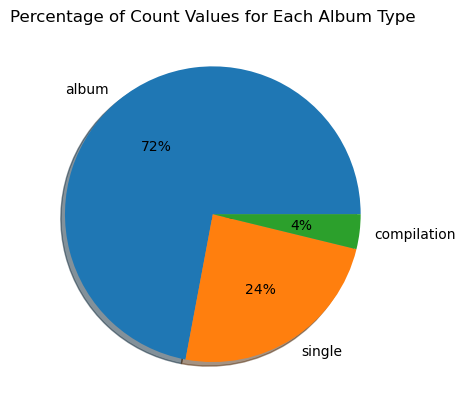

In [18]:
sum_album_type = df['Album_type'].value_counts()
#Adds color to pie chart
colors = sns.color_palette()[0:3]
#Plots pie chart
plt.pie(sum_album_type.values, labels = sum_album_type.index, colors = colors, autopct = '%.0f%%', shadow = True)
plt.title('Percentage of Count Values for Each Album Type')
#Edit font size
plt.rcParams['font.size'] = 12

In [19]:
df['Album_type'].value_counts()

album          14926
single          5004
compilation      788
Name: Album_type, dtype: int64

As we can see the majority of tracks in the dataset are released in an album

## Uri: 

The spotify link used to find the song through the API.

In [20]:
df["Uri"].isnull().sum().sum() ##check valori null

0

In [21]:
df["Uri"].unique()

array(['spotify:track:0d28khcov6AiegSCpG5TuT',
       'spotify:track:1foMv2HQwfQ2vntFf9HFeG',
       'spotify:track:64dLd6rVqDLtkXFYrEUHIU', ...,
       'spotify:track:4jk00YxPtPbhvHJE9N4ddv',
       'spotify:track:5EyErbpsugWliX006eTDex',
       'spotify:track:6lOn0jz1QpjcWeXo1oMm0k'], dtype=object)

## Danceability: 

Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. 
#### A value of 0.0 is least danceable and 1.0 is most danceable.

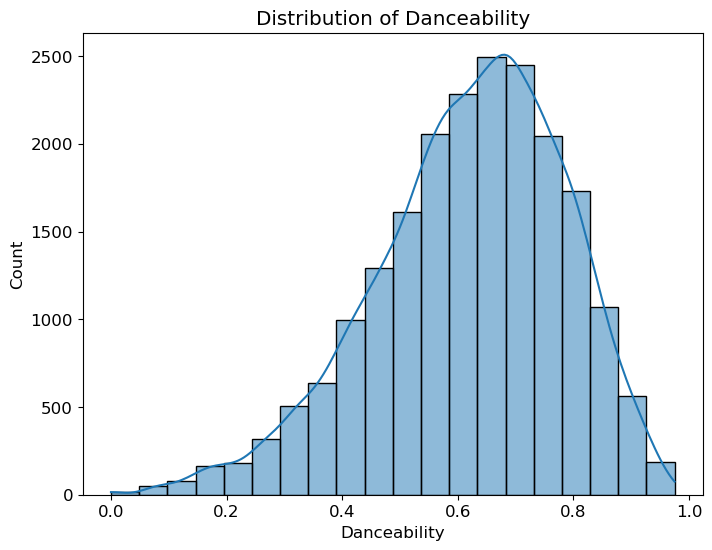

In [22]:
# Histogram of danceability
plt.figure(figsize=(8, 6))
sns.histplot(df['Danceability'], bins=20, kde=True)
plt.title('Distribution of Danceability')
plt.xlabel('Danceability')
plt.ylabel('Count')
plt.show()

The Danceability distribution is similar to a Normal distribution with mean μ = 0.7.
It shows that in average there are more danceable songs.

## Energy: 

Represents a perceptual measure of intensity and activity.  
Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
#### Is a measure from 0.0 to 1.0

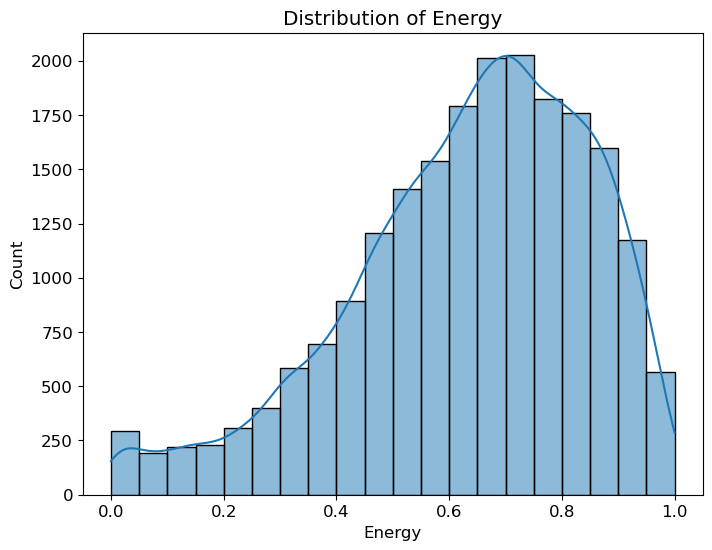

In [23]:
# Histogram of energy
plt.figure(figsize=(8, 6))
sns.histplot(df['Energy'], bins=20, kde=True)
plt.title('Distribution of Energy')
plt.xlabel('Energy')
plt.ylabel('Count')
plt.show()

Also the distribution of Energy is similar to a Normal distribution with mean μ = 0.7 so maybe there is a dependence between Danceability and Energy values.
Let's figure it out with the correlation Matrix

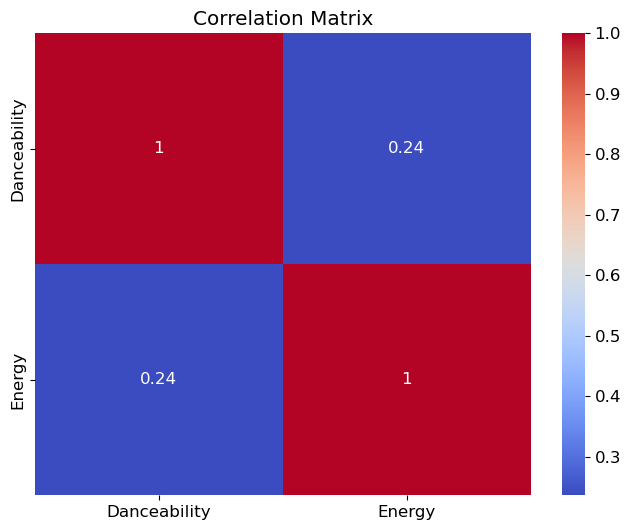

In [24]:
# Calculate correlation matrix
correlation_matrix = df[['Danceability', 'Energy']].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The correlation is 0.24 so it's is considered to be negligible correlation so we can't ingnore none of the two

## Key: 

This attribute assert the key the track is in.  
Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.   
If no key was detected, the value is -1.

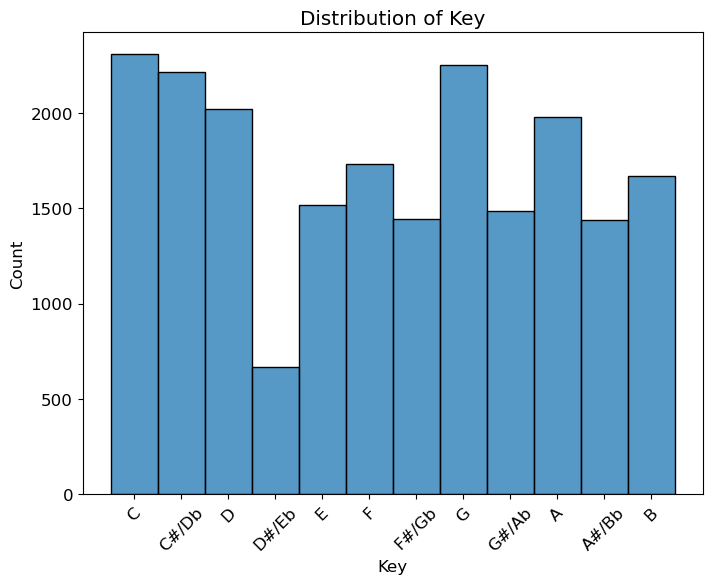

In [25]:
# Histogram of Key

key_list = [
     "C",
     "C#/Db",
     "D",
     "D#/Eb",
     "E",
     "F",
     "F#/Gb",
     "G",
     "G#/Ab",
     "A",
     "A#/Bb",
     "B"
]


plt.figure(figsize=(8, 6))
sns.histplot(df['Key'], bins=range(13), discrete=True)
plt.title('Distribution of Key')
plt.xlabel('Key')
plt.xticks(range(12),key_list,rotation=45)
plt.ylabel('Count')
plt.show()

In [26]:
df['Key'].value_counts().sort_values

<bound method Series.sort_values of 0.0     2305
7.0     2252
1.0     2211
2.0     2021
9.0     1979
5.0     1731
11.0    1667
4.0     1515
8.0     1483
6.0     1443
10.0    1439
3.0      670
Name: Key, dtype: int64>

In [27]:
df[df['Key']==-1]

Empty DataFrame
Columns: [Unnamed: 0, Artist, Url_spotify, Track, Album, Album_type, Uri, Danceability, Energy, Key, Loudness, Speechiness, Acousticness, Instrumentalness, Liveness, Valence, Tempo, Duration_ms, Url_youtube, Title, Channel, Views, Likes, Comments, Description, Licensed, official_video, Stream]
Index: []

[0 rows x 28 columns]

The most popular Key is C and there aren't any songs for which the key has not been detected

## Loudness:

Indicates the overall loudness of a track in decibels (dB).  
Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). 
#### Values range between -60 and 0 db.

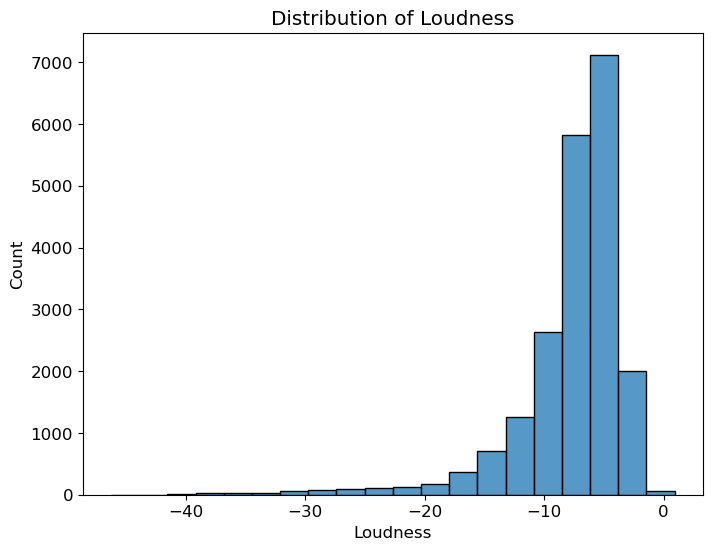

In [28]:
# Histogram of loudness
plt.figure(figsize=(8, 6))
sns.histplot(df['Loudness'], bins=20)
plt.title('Distribution of Loudness')
plt.xlabel('Loudness')
plt.ylabel('Count')
plt.show()

In [29]:
df[df["Loudness"]<-25][["Track","Artist","Loudness"]]

Track              Artist  Loudness
530                         Nuvole Bianche    Ludovico Einaudi   -25.398
531                            Una Mattina    Ludovico Einaudi   -31.544
532                               The Tree    Ludovico Einaudi   -38.901
533                              Wind Song    Ludovico Einaudi   -32.309
534                               Luminous    Ludovico Einaudi   -34.977
...                                    ...                 ...       ...
20581         Rain and Thunderstorm, Pt. 3  Rain Fruits Sounds   -25.277
20582         Rain and Thunderstorm, Pt. 4  Rain Fruits Sounds   -25.603
20585         Rain and Thunderstorm, Pt. 7  Rain Fruits Sounds   -25.071
20587        Rain and Thunderstorm, Pt. 33  Rain Fruits Sounds   -25.175
20649  Bedtime White Noise and Piano Tunes      Sleepy Penguin   -25.191

[319 rows x 3 columns]

Tracks with low values of Loudness are sleep sounds and classical music

In [30]:
df[df["Loudness"]>-5][["Track","Artist","Loudness"]]

Track                 Artist  \
2      New Gold (feat. Tame Impala and Bootie Brown)               Gorillaz   
8                  Cracker Island (feat. Thundercat)               Gorillaz   
10                                   Californication  Red Hot Chili Peppers   
12                                        Can't Stop  Red Hot Chili Peppers   
13                                       Scar Tissue  Red Hot Chili Peppers   
...                                              ...                    ...   
20710                           PART OF ME HARDSTYLE            SICK LEGEND   
20714                 SET FIRE TO THE RAIN HARDSTYLE            SICK LEGEND   
20715                      OUTSIDE HARDSTYLE SPED UP            SICK LEGEND   
20716                            ONLY GIRL HARDSTYLE            SICK LEGEND   
20717                             MISS YOU HARDSTYLE            SICK LEGEND   

       Loudness  
2        -3.930  
8        -3.340  
10       -2.788  
12       -3.442  
13       -4.803  
...         ...  
20710    -3.494  
20714    -1.786  
20715    -4.679  
20716    -4.004  
20717    -4.543  

[5410 rows x 3 columns]

## Speechiness: 

Detects the presence of spoken words in a track.  
The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.  
Values **above 0.66** describe tracks that are probably made entirely of spoken words.   
Values **between 0.33 and 0.66** describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music.   
Values **below 0.33** most likely represent music and other non-speech-like tracks.  
#### Values range between 0 and 1

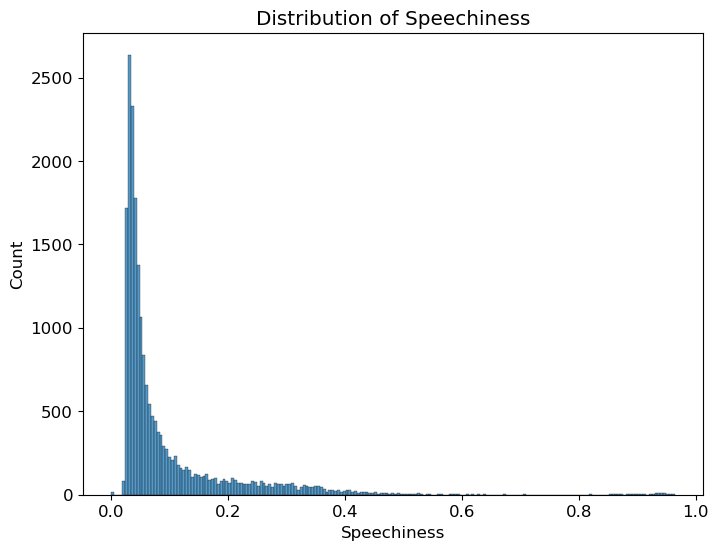

In [31]:
# Histogram of Speechiness
plt.figure(figsize=(8, 6))
sns.histplot(df['Speechiness'])
plt.title('Distribution of Speechiness')
plt.xlabel('Speechiness')
plt.ylabel('Count')
plt.show()

In [32]:
df[df["Speechiness"]>0.66][["Track","Artist","Speechiness","Uri"]]

Track                  Artist  \
469    Teil 23 - Das Geheimnis der Geisterinsel            Die drei ???   
470    Teil 10 - Das Geheimnis der Geisterinsel            Die drei ???   
471     Teil 1 - Das Geheimnis der Geisterinsel            Die drei ???   
472     Teil 4 - Das Geheimnis der Geisterinsel            Die drei ???   
474     Teil 3 - Das Geheimnis der Geisterinsel            Die drei ???   
...                                         ...                     ...   
15725                                     Bella                   Ernia   
15773                           Aaron Burr, Sir         Leslie Odom Jr.   
16582                                    TikTok                Blueface   
18029                                    Jungle  A Boogie Wit da Hoodie   
19968                                     Intro                  j-hope   

       Speechiness                                   Uri  
469          0.858  spotify:track:7tb8nir1Wd25emgErIiKkt  
470          0.836  spotify:track:38DiGBjKQdeDmE7CqLo8jL  
471          0.899  spotify:track:2LYxeQ7gSg5AyqjcEt0UG9  
472          0.761  spotify:track:0DjEoVRlUV3mopYyeQnaTH  
474          0.865  spotify:track:40QP3t1yIGmzgijNoAVRui  
...            ...                                   ...  
15725        0.935  spotify:track:7CxLQIq4kIq8P8UwemcKfX  
15773        0.818  spotify:track:6dr7ekfhlbquvsVY8D7gyk  
16582        0.885  spotify:track:5fMAZiE6Kdqo3fWIOXMtH6  
18029        0.737  spotify:track:5uZm7EFtP5aoTJvx5gv9Xf  
19968        0.828  spotify:track:0M7ai1yfYyb4OlyRgdmtTK  

[124 rows x 4 columns]

Podcasts and audio books are therefore also present in the dataset

## Acousticness:

A confidence measure of whether the track is acoustic.   
1.0 represents high confidence the track is acoustic.
#### Values range between 0.0 and 1.0

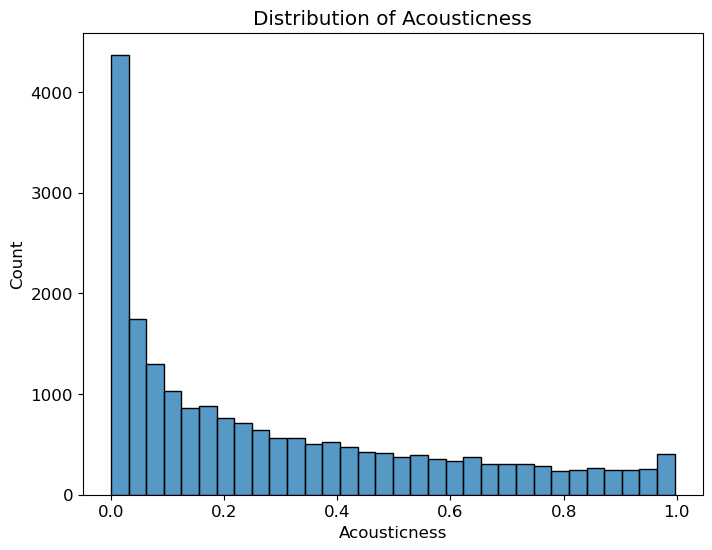

In [33]:
# Histogram of Acousticness
plt.figure(figsize=(8, 6))
sns.histplot(df['Acousticness'])
plt.title('Distribution of Acousticness')
plt.xlabel('Acousticness')
plt.ylabel('Count')
plt.show()

## Instrumentalness: 

Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context.   
Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.   
Values above 0.5 are intended to represent instrumental tracks.
#### Values range between 0.0 and 1.0

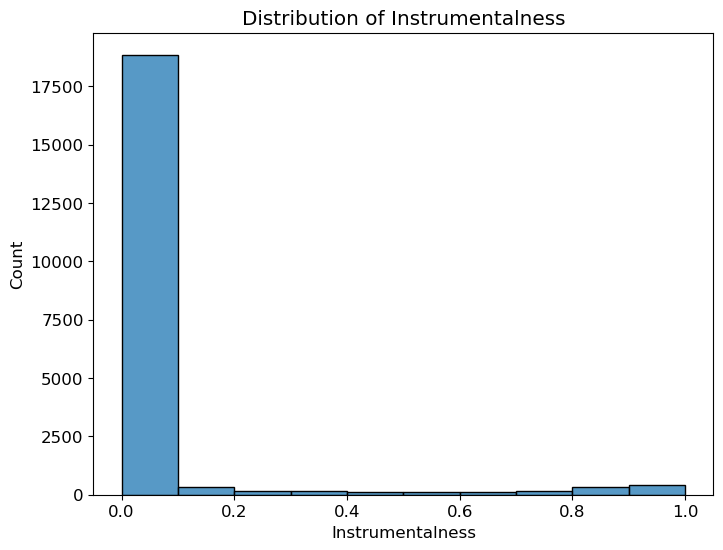

In [34]:
# Histogram of Instrumentalness
plt.figure(figsize=(8, 6))
sns.histplot(df['Instrumentalness'],bins=10)
plt.title('Distribution of Instrumentalness')
plt.xlabel('Instrumentalness')
plt.ylabel('Count')
plt.show()

We could check the tracks with high values 

In [35]:
df[df["Instrumentalness"]>0.8][["Track","Artist","Instrumentalness","Uri"]]

Track            Artist  \
54                                      Around the World         Daft Punk   
58                                           Veridis Quo         Daft Punk   
59                                          Digital Love         Daft Punk   
501                             The Great Gig in the Sky        Pink Floyd   
529                                           Experience  Ludovico Einaudi   
...                                                  ...               ...   
20643                                         She's Back            Arcane   
20645                           White Noise Gentle Piano    Sleepy Penguin   
20653                          Soothing Baby White Nosie    Sleepy Penguin   
20688  Left and Right (feat. Jung Kook of BTS) - Inst...         Jung Kook   
20717                                 MISS YOU HARDSTYLE       SICK LEGEND   

       Instrumentalness                                   Uri  
54                0.889  spotify:track:1pKYYY0dkg23sQQXi0Q5zN  
58                0.949  spotify:track:2LD2gT7gwAurzdQDQtILds  
59                0.867  spotify:track:2VEZx7NWsZ1D0eJ4uv5Fym  
501               0.896  spotify:track:2TjdnqlpwOjhijHCwHCP2d  
529               0.961  spotify:track:1BncfTJAWxrsxyT9culBrj  
...                 ...                                   ...  
20643             0.816  spotify:track:5Fd4qphWgVnVkXFKY1DBNg  
20645             0.853  spotify:track:2lndTAojzj2nh8F5q6q0pY  
20653             0.866  spotify:track:03uw8eP8dT5zUQRO6pKxUT  
20688             0.900  spotify:track:3QRJgF8HY4zEuboEy4Q1gd  
20717             0.911  spotify:track:6lOn0jz1QpjcWeXo1oMm0k  

[754 rows x 4 columns]

These tracks clearly lack spoken or sung words

While we wxpect the tracks with low instrumentalness to have high amounts of lyrics in them:

In [36]:
df[df["Instrumentalness"]<=0.1][["Track","Artist","Instrumentalness","Uri"]]

Track       Artist  \
0                                     Feel Good Inc.     Gorillaz   
1                                    Rhinestone Eyes     Gorillaz   
2      New Gold (feat. Tame Impala and Bootie Brown)     Gorillaz   
4                                     Clint Eastwood     Gorillaz   
5                                               DARE     Gorillaz   
...                                              ...          ...   
20712         EVERYTIME WE TOUCH HARDSTYLE (SPED UP)  SICK LEGEND   
20713                           JUST DANCE HARDSTYLE  SICK LEGEND   
20714                 SET FIRE TO THE RAIN HARDSTYLE  SICK LEGEND   
20715                      OUTSIDE HARDSTYLE SPED UP  SICK LEGEND   
20716                            ONLY GIRL HARDSTYLE  SICK LEGEND   

       Instrumentalness                                   Uri  
0              0.002330  spotify:track:0d28khcov6AiegSCpG5TuT  
1              0.000687  spotify:track:1foMv2HQwfQ2vntFf9HFeG  
2              0.046900  spotify:track:64dLd6rVqDLtkXFYrEUHIU  
4              0.000000  spotify:track:7yMiX7n9SBvadzox8T5jzT  
5              0.086900  spotify:track:4Hff1IjRbLGeLgFgxvHflk  
...                 ...                                   ...  
20712          0.000000  spotify:track:2dSNs47vHBSPnsUwpl39nk  
20713          0.000000  spotify:track:0RtcKQGyI4hr8FgFH1TuYG  
20714          0.000000  spotify:track:3rHvPA8lUnPBkaLyPOc0VV  
20715          0.000000  spotify:track:4jk00YxPtPbhvHJE9N4ddv  
20716          0.018400  spotify:track:5EyErbpsugWliX006eTDex  

[18859 rows x 4 columns]

As expected, there are a lot of tracks with lyrics

## Liveness: 

Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.   
A value above 0.8 provides strong likelihood that the track is live.
#### Values range between 0.0 and 1.0

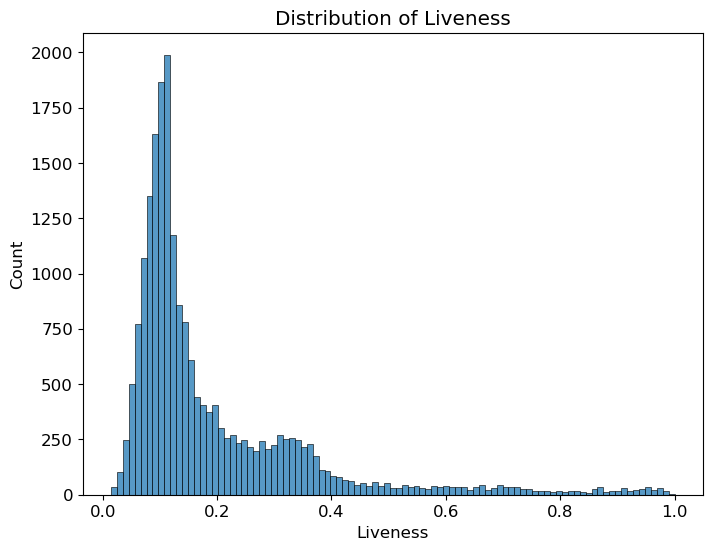

In [37]:
# Histogram of Liveness
plt.figure(figsize=(8, 6))
sns.histplot(df['Liveness'])
plt.title('Distribution of Liveness')
plt.xlabel('Liveness')
plt.ylabel('Count')
plt.show()

There are few tracks recorded live

In [38]:
df[df["Liveness"]>0.9][["Track","Artist","Energy"]]

Track               Artist  Energy
348                         La bikina - En vivo          Luis Miguel   0.710
1025                       The Man Comes Around          Johnny Cash   0.584
1043                       Blind - Live at CBGB                 Korn   0.928
1223   Nada Fue Un Error - Live In Spain / 2005      Julieta Venegas   0.948
1375        Si Te Pudiera Mentir - Live Version  Marco Antonio Solís   0.607
...                                         ...                  ...     ...
20581              Rain and Thunderstorm, Pt. 3   Rain Fruits Sounds   1.000
20582              Rain and Thunderstorm, Pt. 4   Rain Fruits Sounds   1.000
20586              Rain and Thunderstorm, Pt. 6   Rain Fruits Sounds   1.000
20588             Rain and Thunderstorm, Pt. 37   Rain Fruits Sounds   0.999
20590                Digo ou Não Digo - Ao Vivo           João Gomes   0.843

[215 rows x 3 columns]

Tracks with high liveness have the keyword "Live" or "En vivo" in the title 

In [39]:
ds = pd.read_csv(current_path)

## Valence:
Valence is a feature that measures on a scale from 0.0 to 1.0 the "Musical positiveness" conveyed from the song. That means that a "happy" or "cheerful" song will have a valence value more close to 1, I.E if it uses Major Scale chords or has relatively happy lyrics, where as a more "sad" or "angry" song will score a valuence value closer to 0, I.E if it uses Minor Scale chords or has dark lyrics.
Let's see how the values of this feature are distributed:

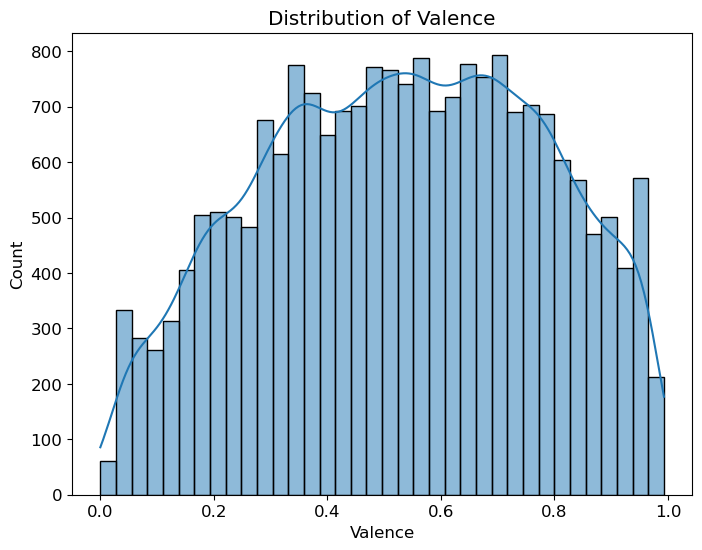

In [40]:
plt.figure(figsize=(8, 6))
sns.histplot(ds['Valence'],kde=True)
plt.title('Distribution of Valence')
plt.xlabel('Valence')
plt.ylabel('Count')
plt.show()

From this plot we can see that even though the shape of the curve resembles in some way a Gaussian curve, there are slightly more "positive" songs than there are "negative" songs. Let's check out the numbers:

In [41]:
sadSongs = ds[ds['Valence']<0.5]
print("Number of sad songs:",sadSongs.shape[0])
happySongs = ds[ds['Valence']>=0.5]
print("Number of happy songs:",happySongs.shape[0])

Number of sad songs: 9336
Number of happy songs: 11380


## Tempo:

This feature estimates the BPM (beats per minute) of a song. This measure, in musical terminology, is used to describe the average beat duration of a song. This measure is an estimation because not every song has a constant tempo (for example most of Queen songs don't have constant tempo).
Let's now look at the distribution of tempo values in the dataset:

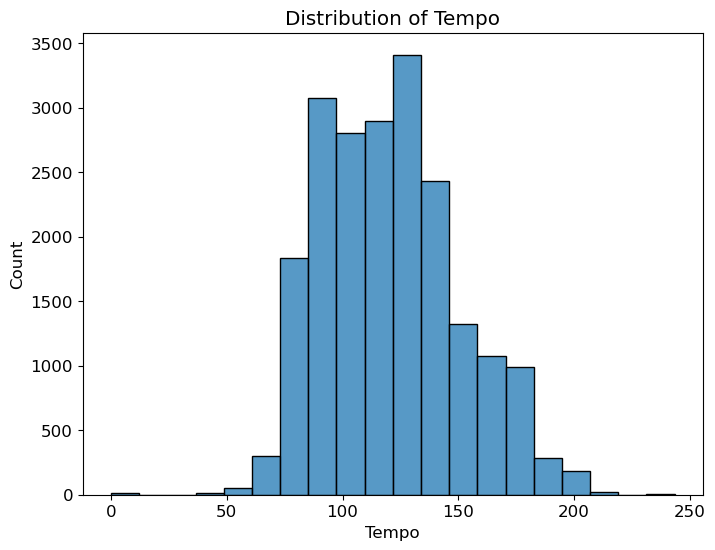

In [42]:
plt.figure(figsize=(8, 6))
sns.histplot(ds['Tempo'], bins=20)
plt.title('Distribution of Tempo')
plt.xlabel('Tempo')
plt.ylabel('Count')
plt.show()

From this plot we can see that most songs have a tempo in a range from 80 to slightly less than 150. Also, we can see in the left-most part of the graph a really slight bar in the vicinity of the value 0. That means that there are some entries in the dataset that present a tempo of 0 BPM, either by mistake or because they're not songs. Let's check them out:

In [43]:
numericFeatures=['Danceability',
 'Energy',
 'Key',
 'Loudness',
 'Speechiness',
 'Acousticness',
 'Instrumentalness',
 'Liveness',
 'Valence',
 'Tempo',
 'Duration_ms',
 'Stream',
 'Views',
 'Likes','Artist','Track']
weirdlySlowSongs = ds[ds['Tempo']<10][numericFeatures]
weirdlySlowSongs

Danceability    Energy   Key  Loudness  Speechiness  Acousticness  \
2073            0.0  0.405000   0.0    -9.935          0.0       0.84200   
2871            0.0  0.802000   1.0    -7.977          0.0       0.00417   
7187            0.0  0.402000   5.0   -15.718          0.0       0.97200   
8373            0.0  0.105000   7.0   -13.925          0.0       0.98900   
9266            0.0  0.036200   0.0   -22.519          0.0       0.99400   
9348            0.0  0.000252   9.0   -17.746          0.0       0.00948   
9358            0.0  0.000252   9.0   -17.746          0.0       0.00948   
13839           0.0  0.003420   8.0   -28.460          0.0       0.79100   
13840           0.0  0.001250   1.0   -27.592          0.0       0.90800   
13842           0.0  0.000055  10.0   -21.995          0.0       0.92100   
13844           0.0  0.251000   2.0   -25.004          0.0       0.11900   
13845           0.0  0.001250   1.0   -27.592          0.0       0.90800   
13848           0.0  0.003420   8.0   -28.460          0.0       0.79100   
15588           0.0  0.003420   8.0   -28.460          0.0       0.79100   
15590           0.0  0.001250   1.0   -27.592          0.0       0.90800   
15595           0.0  0.373000  10.0   -16.469          0.0       0.15300   
15597           0.0  0.000055  10.0   -21.995          0.0       0.92100   

       Instrumentalness  Liveness  Valence  Tempo  Duration_ms       Stream  \
2073            0.00114    0.1980      0.0    0.0     147000.0   22358910.0   
2871            0.87800    0.6030      0.0    0.0      94967.0    9283211.0   
7187            0.00545    0.8970      0.0    0.0     151253.0    1995393.0   
8373            0.95700    0.1080      0.0    0.0      64840.0    3387203.0   
9266            0.94000    0.0958      0.0    0.0     151507.0   11902123.0   
9348            0.87700    0.8060      0.0    0.0      93452.0   54256600.0   
9358            0.87700    0.8060      0.0    0.0      93452.0   54256600.0   
13839           1.00000    0.1110      0.0    0.0      90228.0  956435715.0   
13840           1.00000    0.1110      0.0    0.0      72223.0  128701242.0   
13842           1.00000    0.1140      0.0    0.0     108527.0   26677287.0   
13844           0.91300    0.3840      0.0    0.0      62850.0   48053292.0   
13845           1.00000    0.1110      0.0    0.0      72223.0   71571206.0   
13848           1.00000    0.1110      0.0    0.0      90228.0   26018007.0   
15588           1.00000    0.1110      0.0    0.0      90228.0  956435715.0   
15590           1.00000    0.1110      0.0    0.0      72223.0  128701242.0   
15595           0.99900    0.7260      0.0    0.0     593754.0   15110333.0   
15597           1.00000    0.1140      0.0    0.0     108527.0   26677287.0   

             Views     Likes                  Artist  \
2073    12691825.0   98026.0         Louis Armstrong   
2871      104635.0    1905.0           The Alchemist   
7187    31017254.0  204651.0       Luciano Pavarotti   
8373       50330.0     453.0                     M83   
9266      185634.0    1796.0               Lang Lang   
9348         328.0       1.0            Ocean Sounds   
9358         328.0       1.0   Ocean Waves For Sleep   
13839       1492.0      18.0  White Noise for Babies   
13840    2329675.0   11249.0  White Noise for Babies   
13842        407.0       1.0  White Noise for Babies   
13844      17140.0      40.0  White Noise for Babies   
13845  157884163.0  483072.0  White Noise for Babies   
13848       1492.0      18.0  White Noise for Babies   
15588       1492.0      18.0  White Noise Baby Sleep   
15590     290014.0     674.0  White Noise Baby Sleep   
15595     376087.0     561.0  White Noise Baby Sleep   
15597        407.0       1.0  White Noise Baby Sleep   

                                                   Track  
2073                                       Hello, Dolly!  
2871                                             Arrival  
7187       Rigoletto / Act 3:

We see that the first 5 entries are, most probably, errors, since they are fully fledged songs, while the rest of the songs, being just audios of white noises, are coherent with a Tempo value of 0.

## Duration_ms:
This feature is quite self explanatory, it measures the duration of the track in milliseconds.
To render the information more pleasing to the eye, let's now substitute the feature Duration_ms with a new feature, called Duration_s that represents the duration of the song in seconds, rather than milliseconds. This won't affect any of our tasks, it's just a quirk to make the data more "eye pleasing".

In [44]:
ds["Duration_s"]=ds["Duration_ms"]/1000
ds.drop('Duration_ms',axis=1)

Unnamed: 0       Artist  \
0               0     Gorillaz   
1               1     Gorillaz   
2               2     Gorillaz   
3               3     Gorillaz   
4               4     Gorillaz   
...           ...          ...   
20713       20713  SICK LEGEND   
20714       20714  SICK LEGEND   
20715       20715  SICK LEGEND   
20716       20716  SICK LEGEND   
20717       20717  SICK LEGEND   

                                             Url_spotify  \
0      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
1      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
2      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
3      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
4      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
...                                                  ...   
20713  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
20714  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
20715  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
20716  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
20717  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   

                                               Track  \
0                                     Feel Good Inc.   
1                                    Rhinestone Eyes   
2      New Gold (feat. Tame Impala and Bootie Brown)   
3                                 On Melancholy Hill   
4                                     Clint Eastwood   
...                                              ...   
20713                           JUST DANCE HARDSTYLE   
20714                 SET FIRE TO THE RAIN HARDSTYLE   
20715                      OUTSIDE HARDSTYLE SPED UP   
20716                            ONLY GIRL HARDSTYLE   
20717                             MISS YOU HARDSTYLE   

                                               Album Album_type  \
0                                         Demon Days      album   
1                                      Plastic Beach      album   
2      New Gold (feat. Tame Impala and Bootie Brown)     single   
3                                      Plastic Beach      album   
4                                           Gorillaz      album   
...                                              ...        ...   
20713                           JUST DANCE HARDSTYLE     single   
20714                 SET FIRE TO THE RAIN HARDSTYLE     single   
20715                      OUTSIDE HARDSTYLE SPED UP     single   
20716                            ONLY GIRL HARDSTYLE     single   
20717                             MISS YOU HARDSTYLE     single   

                                        Uri  Danceability  Energy   Key  ...  \
0      spotify:track:0d28khcov6AiegSCpG5TuT         0.818   0.705   6.0  ...   
1      spotify:track:1foMv2HQwfQ2vntFf9HFeG         0.676   0.703   8.0  ...   
2      spotify:track:64dLd6rVqDLtkXFYrEUHIU         0.695   0.923   1.0  ...   
3      spotify:track:0q6LuUqGLUiCPP1cbdwFs3         0.689   0.739   2.0  ...   
4      spotify:track:7yMiX7n9SBvadzox8T5jzT         0.663   0.694  10.0  ...   
...                                     ...           ...     ...   ...  ...   
20713  spotify:track:0RtcKQGyI4hr8FgFH1TuYG         0.582   0.926   5.0  ...   
20714  spotify:track:3rHvPA8lUnPBkaLyPOc0VV         0.531   0.936   4.0  ...   
20715  spotify:track:4jk00YxPtPbhvHJE9N4ddv         0.443   0.830   4.0  ...   
20716  spotify:track:5EyErbpsugWliX006eTDex         0.417   0.767   9.0  ...   
20717  spotify:track:6lOn0jz1QpjcWeXo1oMm0k         0.498   0.938   6.0  ...   

                                                   Title              Channel  \
0             Gorillaz - Feel Good Inc. (Official Video)             Gorillaz   
1      Gorillaz - Rhinestone Eyes [Storyboard Film] (...             Gorillaz   
2      Gorillaz - New Gold ft. Tame Impala & Bootie B...             Gorillaz   
3         Gorillaz - On Melancholy Hill (Official Video)             Gorillaz   
4             Gorillaz - Clint Ea

Let's take a look at the data distribution for this feature:

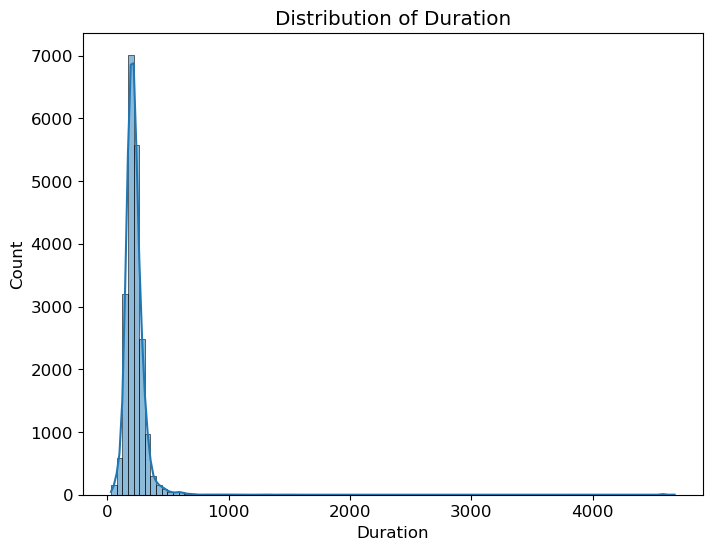

In [45]:
plt.figure(figsize=(8, 6))
sns.histplot(ds['Duration_s'], bins=100, kde=True)
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.show()

We can see that on the far right side of the graph there are some outliers, meaning tracks that have a particularly high duration. Let's look at the tracks that last for more than 16 minutes and see what's what:

In [46]:
veryLongSongs = ds[ds['Duration_s']>1000]
veryLongSongs.head(20)

Unnamed: 0                 Artist  \
2943         2943          Guru Randhawa   
2983         2983           Amaal Mallik   
4449         4449       Anuradha Paudwal   
4896         4896             Mika Singh   
4926         4926      Himesh Reshammiya   
5246         5246           Los Palmeras   
5385         5385                Playero   
5387         5387                Playero   
5852         5852           Leo Mattioli   
7383         7383            Divya Kumar   
9361         9361  Ocean Waves For Sleep   
9865         9865            Tulsi Kumar   
10475       10475         Harshdeep Kaur   
13758       13758           Amit Trivedi   
14326       14326      Yo Yo Honey Singh   
15935       15935           Ankit Tiwari   

                                             Url_spotify  \
2943   https://open.spotify.com/artist/5rQoBDKFnd1n6B...   
2983   https://open.spotify.com/artist/76fuWYgIf3TVIo...   
4449   https://open.spotify.com/artist/4hkB2bR5ek6lJC...   
4896   https://open.spotify.com/artist/5T2I75UlGBcWd5...   
4926   https://open.spotify.com/artist/0sSxphmGskGCKl...   
5246   https://open.spotify.com/artist/2Htm0q72SjGSms...   
5385   https://open.spotify.com/artist/2YTyoyU90b3CF5...   
5387   https://open.spotify.com/artist/2YTyoyU90b3CF5...   
5852   https://open.spotify.com/artist/2Mu8h5sFkOziL0...   
7383   https://open.spotify.com/artist/0NErdIJtuKBjtx...   
9361   https://open.spotify.com/artist/2CgVSpL4tfbUuH...   
9865   https://open.spotify.com/artist/0T1CMVkqffHlqE...   
10475  https://open.spotify.com/artist/3xU8YsNNkmWSPe...   
13758  https://open.spotify.com/artist/7HCqGPJcQTyGJ2...   
14326  https://open.spotify.com/artist/7uIbLdzzSEqnX0...   
15935  https://open.spotify.com/artist/0E02VcvA5p1ndk...   

                                                   Track  \
2943   52 Non Stop Dilbar Dilbar Remix(Remix By Kedro...   
2983   52 Non Stop Dilbar Dilbar Remix(Remix By Kedro...   
4449                                     Om Bhurbhuwasah   
4896   52 Non Stop Dilbar Dilbar Remix(Remix By Kedro...   
4926   52 Non Stop Dilbar Dilbar Remix(Remix By Kedro...   
5246   Hitazos: Amores Como el Nuestro / Que Fue / Al...   
5385                                    Ragga Moofin Mix   
5387                                     Non Stop Reegae   
5852   Hitazos: Amores Como el Nuestro / Que Fue / Al...   
7383   52 Non Stop Dilbar Dilbar Remix(Remix By Kedro...   
9361                               Ocean Waves for Sleep   
9865   52 Non Stop Dilbar Dilbar Remix(Remix By Kedro...   
10475  High Rated Gabru 52 Non Stop Hits(Remix By Man...   
13758  52 Non Stop Dilbar Dilbar Remix(Remix By Kedro...   
14326  52 Non Stop Dilbar Dilbar Remix(Remix By Kedro...   
15935  52 Non Stop Dilbar Dilbar Remix(Remix By Kedro...   

                                                   Album   Album_type  \
2943                     52 Non Stop Dilbar Dilbar Remix  compilation   
2983                     52 Non Stop Dilbar Dilbar Remix  compilation   
4449                                      Gayatri Mantra       single   
4896                     52 Non Stop Dilbar Dilbar Remix  compilation   
4926                     52 Non Stop Dilbar Dilbar Remix  compilation   
5246   Hitazos: Amores Como el Nuestro / Que Fue / Al...  compilation   
5385                            Playero 37 "Underground"        album   
5387                            Playero 38 "Underground"        album   
5852   Hitazos: Amores Como el Nuestro / Que Fue / Al...  compilation   
7383                     52 Non Stop Dilbar Dilbar Remix  compilation   
9361                                         Ocean Waves       single   
9865                     52 Non Stop Dilbar Dilbar Remix  compilation   
10475                  High Rated Gabru 52 Non Stop Hits  compilation   
13758                    52 Non Stop Dilbar Dilbar Remix  compilation   
14326                    52 Non Stop Dilbar Dilbar Remix  compilation   
15935                    52 Non Stop Dilbar Dilb

We can see that only 16 entries have a track duration higher than 16.6 minutes, and most of them are related to compilations of songs all mashed up into one track. A clear example of this is the track 52 Non Stop Dilbar Dilbar, a track that's an hour and 16 minutes long. Here it is present in more than one entry because it is a featuring of many different artists:
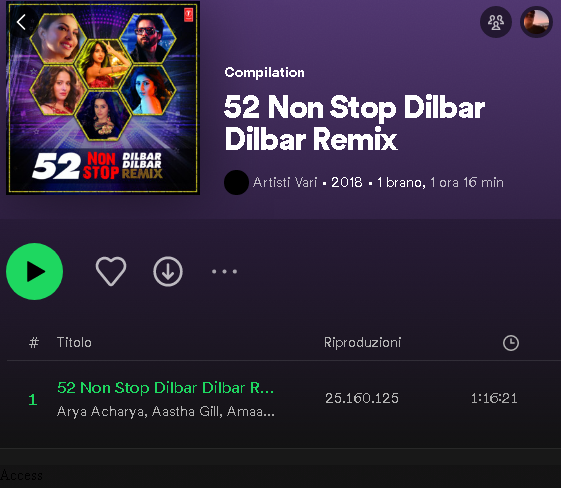

Let's see the distribution of the duration more clearly by dropping these outliers and plotting it again
## TODO vedere che fare con sti valori

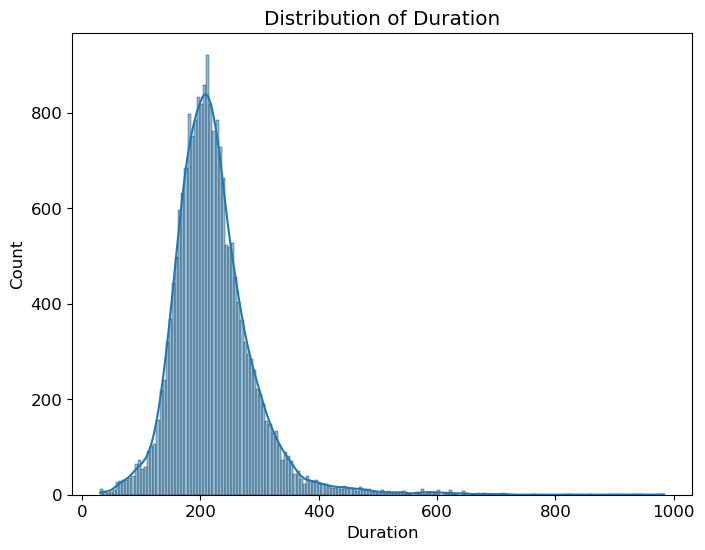

In [47]:
longSongsIndexes = veryLongSongs.index
dsWithoutLongSongs = ds.drop(longSongsIndexes)

plt.figure(figsize=(8, 6))
sns.histplot(dsWithoutLongSongs['Duration_s'], kde=True)
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.show()

From this plot it is evident that the most popular value for track duration is around the 3 minute mark.

## Stream:

This feature, also quite self explainatory, represents the number of streams that the track has on Spotify, if the track is actually available on spotify. Again, let's go and see the shape of the distribution of values:

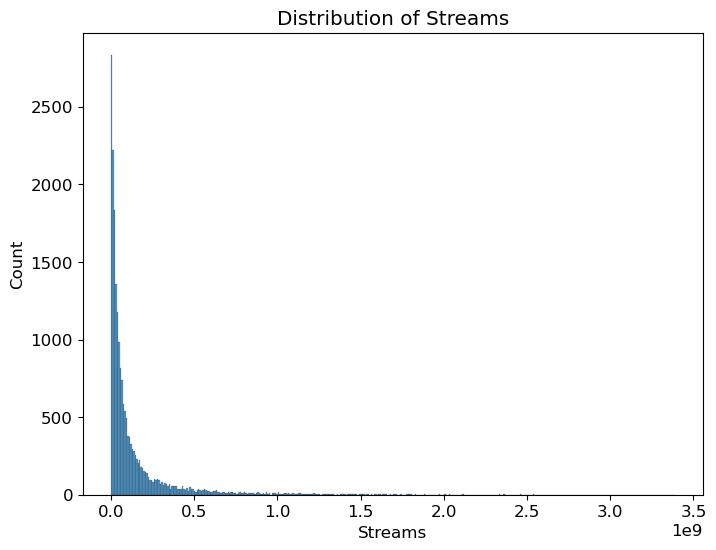

In [48]:
plt.figure(figsize=(8, 6))
sns.histplot(ds['Stream'])
plt.title('Distribution of Streams')
plt.xlabel('Streams')
plt.ylabel('Count')
plt.show()

From the graph we can see that the almost totality of the songs have a number of streams on Spotify ranging from 0 to half a billion streams.
Let's see the exact number:

In [49]:
(len(ds[ds['Stream'] > 500000000]) / len(ds)) * 100

6.1347620426682115

**6.13% of songs**
have surpassed the half a billion streams mark.

Now let's see for how many entries the value of the feature Stream is not defined:

In [50]:
ds[ds['Stream'].isna()].shape[0]

576

This is a notable value, since it means that almost 1/35 entries in the dataset do not have information on the exact number of Streams on Spotify. Let's take a look at these specific entries: 

In [51]:
ds[ds['Stream'].isna()].head(30)

Unnamed: 0        Artist  \
30           30     Metallica   
31           31     Metallica   
32           32     Metallica   
34           34     Metallica   
35           35     Metallica   
36           36     Metallica   
38           38     Metallica   
239         239    Snoop Dogg   
469         469  Die drei ???   
470         470  Die drei ???   
471         471  Die drei ???   
472         472  Die drei ???   
473         473  Die drei ???   
474         474  Die drei ???   
475         475  Die drei ???   
476         476  Die drei ???   
477         477  Die drei ???   
478         478  Die drei ???   
499         499    Pink Floyd   
501         501    Pink Floyd   
502         502    Pink Floyd   
503         503    Pink Floyd   
504         504    Pink Floyd   
505         505    Pink Floyd   
506         506    Pink Floyd   
507         507    Pink Floyd   
508         508    Pink Floyd   
570         570         Oasis   
576         576         Oasis   
577         577         Oasis   

                                           Url_spotify  \
30   https://open.spotify.com/artist/2ye2Wgw4gimLv2...   
31   https://open.spotify.com/artist/2ye2Wgw4gimLv2...   
32   https://open.spotify.com/artist/2ye2Wgw4gimLv2...   
34   https://open.spotify.com/artist/2ye2Wgw4gimLv2...   
35   https://open.spotify.com/artist/2ye2Wgw4gimLv2...   
36   https://open.spotify.com/artist/2ye2Wgw4gimLv2...   
38   https://open.spotify.com/artist/2ye2Wgw4gimLv2...   
239  https://open.spotify.com/artist/7hJcb9fa4alzcO...   
469  https://open.spotify.com/artist/3meJIgRw7YleJr...   
470  https://open.spotify.com/artist/3meJIgRw7YleJr...   
471  https://open.spotify.com/artist/3meJIgRw7YleJr...   
472  https://open.spotify.com/artist/3meJIgRw7YleJr...   
473  https://open.spotify.com/artist/3meJIgRw7YleJr...   
474  https://open.spotify.com/artist/3meJIgRw7YleJr...   
475  https://open.spotify.com/artist/3meJIgRw7YleJr...   
476  https://open.spotify.com/artist/3meJIgRw7YleJr...   
477  https://open.spotify.com/artist/3meJIgRw7YleJr...   
478  https://open.spotify.com/artist/3meJIgRw7YleJr...   
499  https://open.spotify.com/artist/0k17h0D3J5Vfsd...   
501  https://open.spotify.com/artist/0k17h0D3J5Vfsd...   
502  https://open.spotify.com/artist/0k17h0D3J5Vfsd...   
503  https://open.spotify.com/artist/0k17h0D3J5Vfsd...   
504  https://open.spotify.com/artist/0k17h0D3J5Vfsd...   
505  https://open.spotify.com/artist/0k17h0D3J5Vfsd...   
506  https://open.spotify.com/artist/0k17h0D3J5Vfsd...   
507  https://open.spotify.com/artist/0k17h0D3J5Vfsd...   
508  https://open.spotify.com/artist/0k17h0D3J5Vfsd...   
570  https://open.spotify.com/artist/2DaxqgrOhkeH0f...   
576  https://open.spotify.com/artist/2DaxqgrOhkeH0f...   
577  https://open.spotify.com/artist/2DaxqgrOhkeH0f...   

                                        Track  \
30                 Enter Sandman (Remastered)   
31          Nothing Else Matters (Remastered)   
32             Master of Puppets (Remastered)   
34                The Unforgiven (Remastered)   
35                           One (Remastered)   
36       For Whom The Bell Tolls (Remastered)   
38                  Sad But True (Remastered)   
239     Riders On The Storm - Fredwreck Remix   
469  Teil 23 - Das Geheimnis der Geisterinsel   
470  Teil 10 - Das Geheimnis der Geisterinsel   
471   Teil 1 - Das Geheimnis der Geisterinsel   
472   Teil 4 - Das Geheimnis der Geisterinsel   
473   Teil 2 - Das Geheimnis der Geisterinsel   
474   Teil 3 - Das Geheimnis der Geisterinsel   
475   Teil 8 - Das Geheimnis der Geisterinsel   
476   Teil 5 - Das Geheimnis der Geisterinsel   
477  Teil 15 - Das Geheimnis der Geisterinsel   
478   Teil 7 - Das Geheimnis der Geisterinsel   
499          Another Brick in the Wall, Pt. 2   
501                  The Great Gig in the Sky   
502                          Comfortably Numb   
503                                     Money   
504                      Breathe (In the Air)   
505   

We see some notable names in this category, like Pink Floyd, Metallica or Oasis. The reason for these missing values is probably due to a error in the creation of the Dataset, since Spotify's API does not allow to directly get the exact number of Stream for a certain track, the only way is to scrape Spotify's web app to get the number, and for these specific instances the scraping process might not have worked. We will deal with these missing values in the future session where we'll try to predict the performance in terms of Streams and Views of a song.

One other interesting thing to look at would be the most popular songs on the renowned streaming service, so let's check it out:

Track        Stream
15250                                Blinding Lights  3.386520e+09
12452                                   Shape of You  3.362005e+09
19186                              Someone You Loved  2.634013e+09
17937                     rockstar (feat. 21 Savage)  2.594927e+09
17445  Sunflower - Spider-Man: Into the Spider-Verse  2.538330e+09
13503                                      One Dance  2.522432e+09
16099                                         Closer  2.456205e+09
14030                                       Believer  2.369272e+09
19623                      STAY (with Justin Bieber)  2.365778e+09
17288                                       Señorita  2.336220e+09

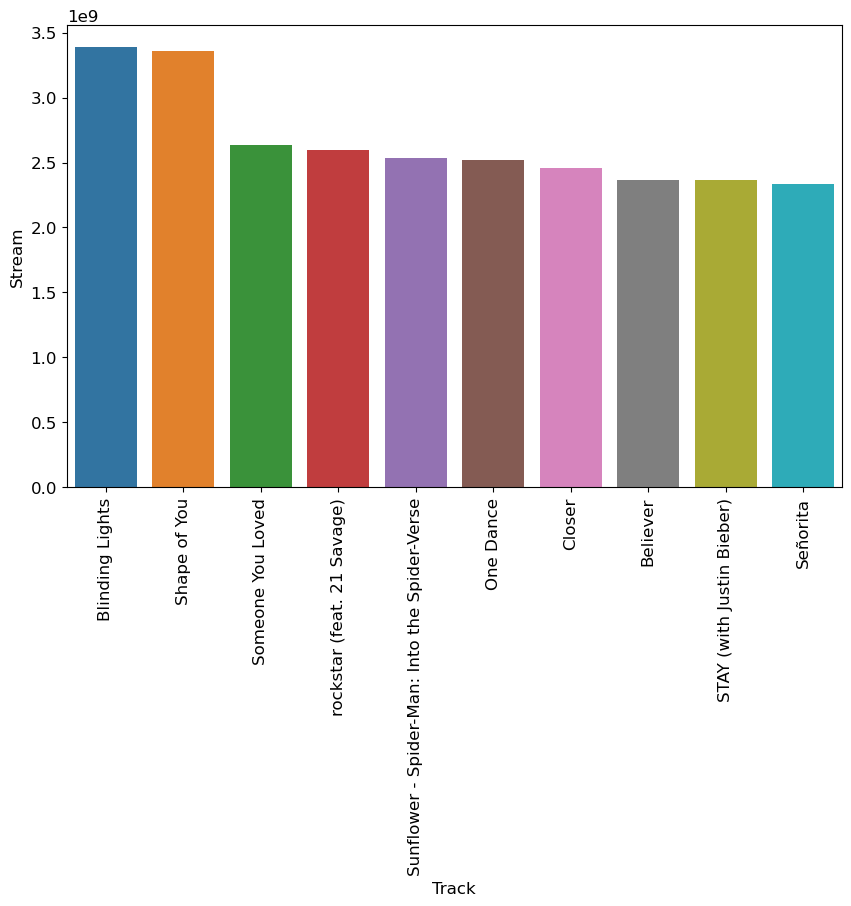

In [52]:
sortedDs=ds.sort_values(by='Stream', ascending=False).drop_duplicates(subset='Track',keep='first')
topTenTracks = sortedDs.head(10)[['Track','Stream']]
topTenTracks.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(topTenTracks,x='Track',y='Stream')
plt.set_xlabel='Track'
plt.set_ylabel='Streams'
plt.xticks(rotation=90)
topTenTracks.head(10)

The Weeknd's "Blinding Lights" is the most streamed song on spotify according to this Data Set, with a whopping 3.38 billion Streams, nearly followed by Ed Sheeran's Shape of You.

Remeaining on the topic of streamings, it could be interesting, in our first exploratory analysis, to take a look at the best performing artists on the swedish streaming site, so basically the top ten artists for sum of total streamings.
Let's take a look at what our data says:

Artist        Stream
1497      Post Malone  1.525126e+10
526        Ed Sheeran  1.439488e+10
507          Dua Lipa  1.340808e+10
2000     XXXTENTACION  1.322435e+10
1861       The Weeknd  1.303197e+10
927     Justin Bieber  1.209777e+10
777   Imagine Dragons  1.185831e+10
381          Coldplay  1.177848e+10
982            Khalid  1.138684e+10
267        Bruno Mars  1.089786e+10

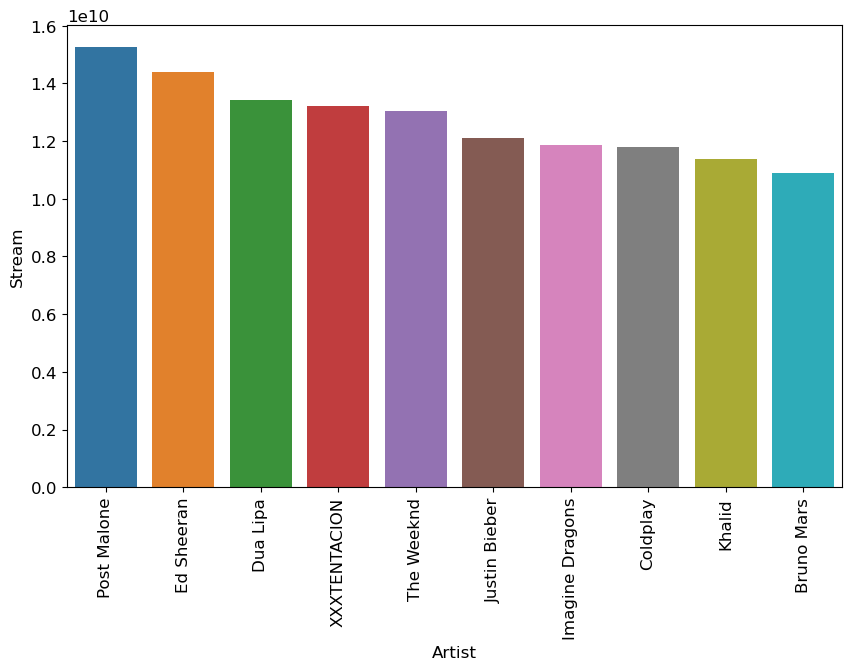

In [53]:
groupedArtists = ds.groupby('Artist')['Stream'].sum().reset_index()
topTenArtists = groupedArtists.sort_values(by='Stream',ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(topTenArtists,x='Artist',y='Stream')
plt.set_xlabel='Artist'
plt.set_ylabel='Streams'
plt.xticks(rotation=90)
topTenArtists.head(10)

And accordiing to this Data Set, the Artist that has the highest sum of streamings is Post Malone, with over 15 Billion Streams.

## Url_youtube:

This field contains the URL to the Youtube video related to the track in question, if it has any.
The only interesting thing to explore about this field is how many null values it presents, and also if, in the rows that have null values for this feature, all of the other "Youtube Related" features are null as well.

In [54]:
urlYTNull=ds[ds['Url_youtube'].isna()][['Track','Artist','Url_youtube','Title','Likes','Comments','Licensed','official_video']]
print("Number of entries a null YouTube URL:",urlYTNull.shape[0])
print("null YouTube URL and null Title:",urlYTNull[urlYTNull['Title'].isna()].shape[0])
print("null YouTube URL and null Likes:",urlYTNull[urlYTNull['Likes'].isna()].shape[0])
print("null YouTube URL and null Comments:",urlYTNull[urlYTNull['Comments'].isna()].shape[0])
print("null YouTube URL and null Licensed:",urlYTNull[urlYTNull['Licensed'].isna()].shape[0])
print("null YouTube URL and null official_video:",urlYTNull[urlYTNull['official_video'].isna()].shape[0])

Number of entries a null YouTube URL: 470
null YouTube URL and null Title: 470
null YouTube URL and null Likes: 470
null YouTube URL and null Comments: 470
null YouTube URL and null Licensed: 470
null YouTube URL and null official_video: 470


As we can see from the prints, if the YouTube url of the song is missing, so will all the other youtube related feature. So in the performance prediction, we can go and delete all the rows that have a null value on this feature 

Let's take a peek and see for what Tracks the YouTube video is not available:

In [55]:
ds[ds['Url_youtube'].isna()].head(50)

Unnamed: 0                     Artist  \
410          410             Wisin & Yandel   
411          411             Wisin & Yandel   
412          412             Wisin & Yandel   
413          413             Wisin & Yandel   
414          414             Wisin & Yandel   
415          415             Wisin & Yandel   
416          416             Wisin & Yandel   
417          417             Wisin & Yandel   
418          418             Wisin & Yandel   
593          593                Hans Zimmer   
620          620   Bob Marley & The Wailers   
622          622   Bob Marley & The Wailers   
623          623   Bob Marley & The Wailers   
624          624   Bob Marley & The Wailers   
625          625   Bob Marley & The Wailers   
626          626   Bob Marley & The Wailers   
627          627   Bob Marley & The Wailers   
905          905        Alejandro Fernández   
925          925      Johann Sebastian Bach   
938          938                Alka Yagnik   
962          962             Vishal-Shekhar   
968          968              Bibi und Tina   
971          971              Bibi und Tina   
972          972              Bibi und Tina   
973          973              Bibi und Tina   
974          974              Bibi und Tina   
976          976              Bibi und Tina   
988          988            Bibi Blocksberg   
989          989            Bibi Blocksberg   
990          990            Bibi Blocksberg   
991          991            Bibi Blocksberg   
992          992            Bibi Blocksberg   
994          994            Bibi Blocksberg   
995          995            Bibi Blocksberg   
997          997            Bibi Blocksberg   
1327        1327    Wolfgang Amadeus Mozart   
1334        1334    Wolfgang Amadeus Mozart   
1417        1417     S. P. Balasubrahmanyam   
1470        1470                      Anahí   
1481        1481          Shankar Mahadevan   
1494        1494                 Kumar Sanu   
1495        1495                 Kumar Sanu   
1722        1722  London Symphony Orchestra   
1723        1723  London Symphony Orchestra   
1924        1924           Shekhar Ravjiani   
1959        1959              K. S. Chithra   
1960        1960              K. S. Chithra   
1963        1963              K. S. Chithra   
2176        2176          Simon & Garfunkel   
2177        2177          Simon & Garfunkel   

                                            Url_spotify  \
410   https://open.spotify.com/artist/1wZtkThiXbVNtj...   
411   https://open.spotify.com/artist/1wZtkThiXbVNtj...   
412   https://open.spotify.com/artist/1wZtkThiXbVNtj...   
413   https://open.spotify.com/artist/1wZtkThiXbVNtj...   
414   https://open.spotify.com/artist/1wZtkThiXbVNtj...   
415   https://open.spotify.com/artist/1wZtkThiXbVNtj...   
416   https://open.spotify.com/artist/1wZtkThiXbVNtj...   
417   https://open.spotify.com/artist/1wZtkThiXbVNtj...   
418   https://open.spotify.com/artist/1wZtkThiXbVNtj...   
593   https://open.spotify.com/artist/0YC192cP3KPCRW...   
620   https://open.spotify.com/artist/2QsynagSdAqZj3...   
622   https://open.spotify.com/artist/2QsynagSdAqZj3...   
623   https://open.spotify.com/artist/2QsynagSdAqZj3...   
624   https://open.spotify.com/artist/2QsynagSdAqZj3...   
625   https://open.spotify.com/artist/2QsynagSdAqZj3...   
626   https://open.spotify.com/artist/2QsynagSdAqZj3...   
627   https://open.spotify.com/artist/2QsynagSdAqZj3...   
905   https://open.spotify.com/artist/6sq1yF0OZEWA4x...   
925   https://open.spotify.com/artist/5aIqB5nVVvmFsv...   
938   https://open.spotify.com/artist/3gBKY0y3dFFVRq...   
962   https://open.spotify.com/artist/6Mv8GjQa7LKUGC...   
968   https://open.spotify.com/artist/2x8vG4f0HYXzME...   
971   https://open.spotify.com/artist/2x8vG4f0HYXzME...   
972   https://open.spotify.com/artist/2x8vG4f0HYXzME...   
973   https://open.spotify.com/artist/2x8vG4f0HYXzME...   
974   https://open.spotify.com/artist/2x8vG4f0HYXzME...   
976   https://o

## Title:

This feature contains the title of the YouTube video associated to the song.
Let's quickly take a look at how many null values it contains:

In [56]:
ds[ds['Title'].isna()].shape[0]

470

Exactly 470, so there are no rows where the URL is missing but the title of the video isn't, that would have been errors in the data.

## Channel:

This feature contains the name of the channel that has published the video related to the Track. As for the Title feature, let's quickly take a look at how many null values it contains:

In [57]:
ds[ds['Channel'].isna()].shape[0]

470

Again, exactly 470, so even here, there are no rows where the URL is missing but the name of the channel that publiished the video isn't.

## Views:

This feature contains, if present, the number of views that the YouTube video associated to the song has. Similarly as for the other features related to YouTube, let's go and check out the number of null values it contains:

In [58]:
ds[ds['Views'].isna()].shape[0]

470

Same as before, 470.
Let's now take a quick look at the distribution of the values of views for the YouTube videos:


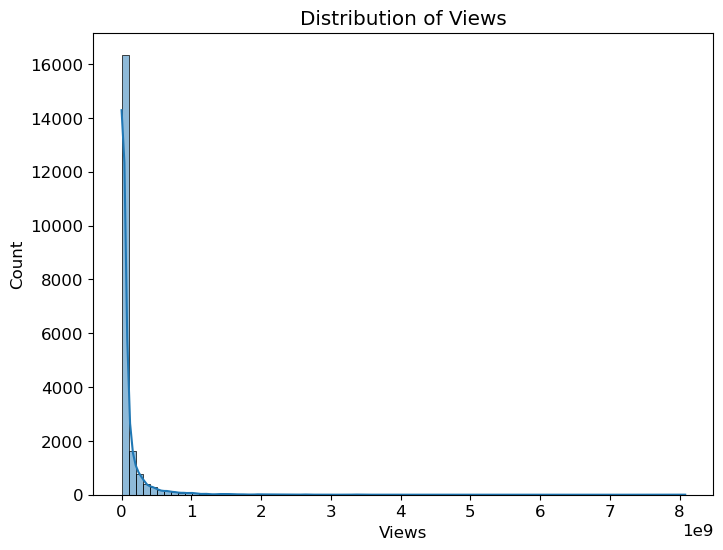

In [59]:
plt.figure(figsize=(8, 6))
sns.histplot(ds['Views'], kde=True,bins = 80)
plt.title('Distribution of Views')
plt.xlabel('Views')
plt.ylabel('Count')
plt.show()

From this plot we can see that there's a huge percentage of entries with a number of streams in the first rectangle of the histogram, more than 16000 entries:

In [60]:
(len(ds[ds['Views']<100000000])/len(ds))*100

78.78656240949898

**78.78%** of all the entries lie in the first rectangle of the plot, meaning that slightly more than one out of 5 tracks breaks through the 100 Million views barrier.


As we already did for the Streams feature, let's now see what are the 10 most popular Tracks based on the number of views of their YouTube video:

Track         Views
1147                            Despacito  8.079649e+09
12452                        Shape of You  5.908398e+09
14580  See You Again (feat. Charlie Puth)  5.773798e+09
20303                   Wheels on the Bus  4.898831e+09
10686      Uptown Funk (feat. Bruno Mars)  4.821016e+09
8937                Gangnam Style (강남스타일)  4.679767e+09
9569                                Sugar  3.817733e+09
13032                                Roar  3.725749e+09
13040                      Counting Stars  3.721610e+09
14074                               Sorry  3.627306e+09

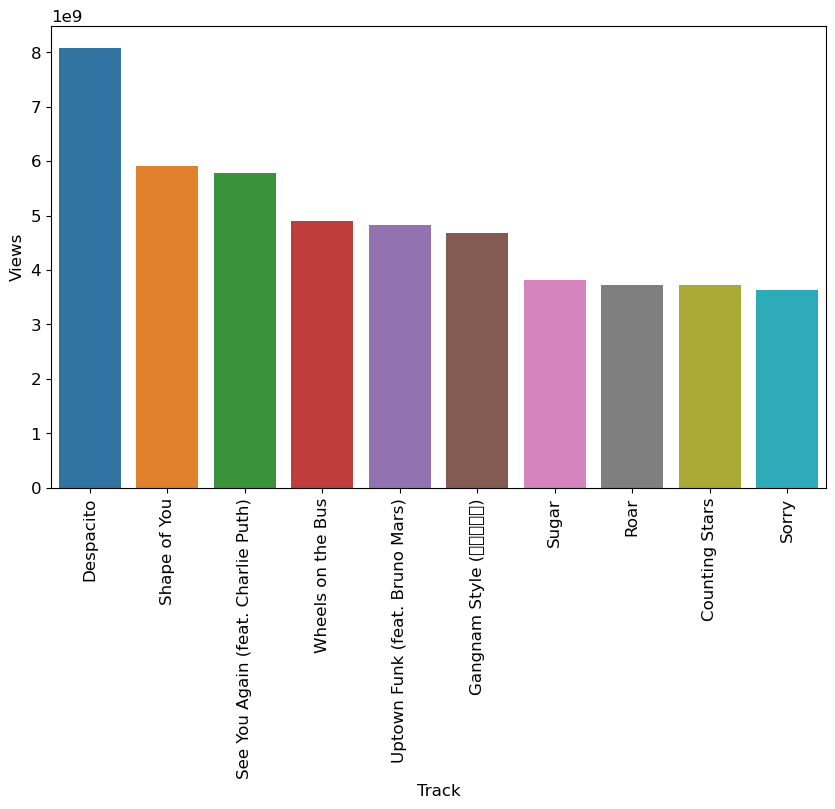

In [61]:
sortedDs=ds.sort_values(by='Views', ascending=False).drop_duplicates(subset='Track',keep='first')
topTenTracksYT = sortedDs.head(10)[['Track','Views']]
topTenTracksYT.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(topTenTracksYT,x='Track',y='Views')
plt.set_xlabel='Track'
plt.set_ylabel='Views'
plt.xticks(rotation=90)
topTenTracksYT.head(10)

And the title goes to Despacito, that tops the list with more than 8 Billion views on the music video.

Another interesting thing to look at would be the Difference in performance between the top 10 songs from Spotify and YouTube on either platform, by plotting them both in the same chart. Let's do that:

<Figure size 800x600 with 0 Axes>

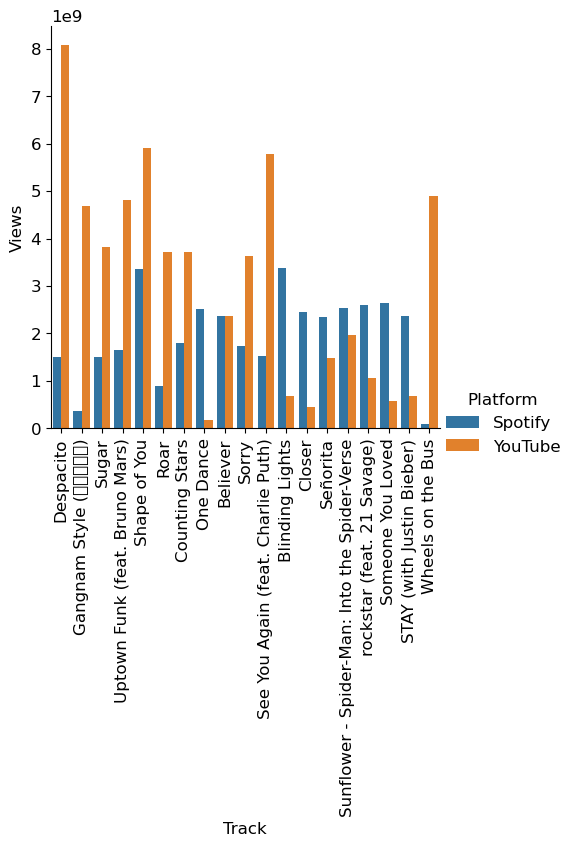

In [62]:
youTubeTracksIndex = topTenTracksYT.index
spotifyTracksIndex = topTenTracks.index
allTracks=youTubeTracksIndex.union(spotifyTracksIndex)
data=dict()
data['Platform']=[]
data['Track']=[]
data['Views']=[]
for index in allTracks:
    data['Platform'].extend(['Spotify','YouTube'])
    data['Track'].extend([ds.loc[index]['Track'],ds.loc[index]['Track']])
    data['Views'].extend([ds.loc[index]['Stream'],ds.loc[index]['Views']])
dataComparison=pd.DataFrame(data)
plt.figure(figsize=(8, 6))
sns.catplot(x='Track',y='Views',hue='Platform',data=dataComparison,kind='bar')
plt.xticks(rotation=90)
plt.show()
#eventualmente normalizzare i valori di yt che sono troppo alti e sminchano il grafico

We can see that for some Tracks such as Gangnam Style or Wheels on the Bus, the values of Stream and Views are in contrast wth eachother, given that they have monstrous figures on YT while having more modest figures on Spotify. On the contrary, songs like One Dance perform quite poorly on YT compared to their numbers on Spotify.
For a more formal look at the correlation between the values of views and streams, let's check out the correlation matrix:

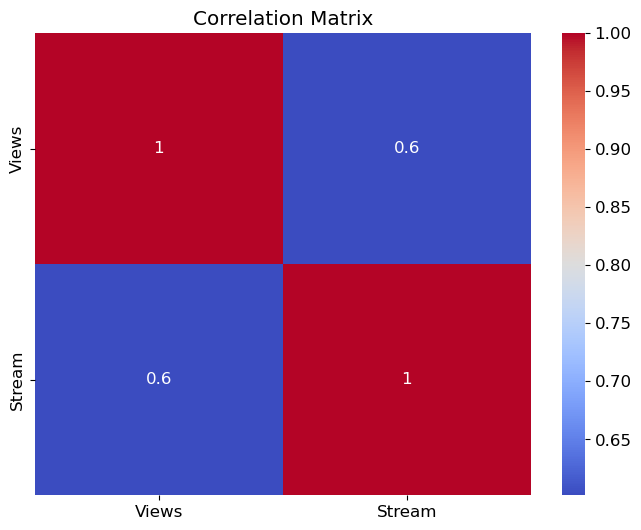

In [63]:
correlation_matrix = ds[['Views', 'Stream']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

As we can see from the figure there is a high (although not perfect) correlation between the two features. 

Now, as we did earlier for the Stream feature, let's see who are the 10 best performing artists on YouTube:

Artist         Views
526                Ed Sheeran  1.546021e+10
374                 CoComelon  1.460167e+10
955                Katy Perry  1.312063e+10
333              Charlie Puth  1.216759e+10
1149               Luis Fonsi  1.162811e+10
927             Justin Bieber  1.099106e+10
422              Daddy Yankee  1.087193e+10
267                Bruno Mars  1.024092e+10
1184  Macklemore & Ryan Lewis  1.012206e+10
381                  Coldplay  9.997278e+09

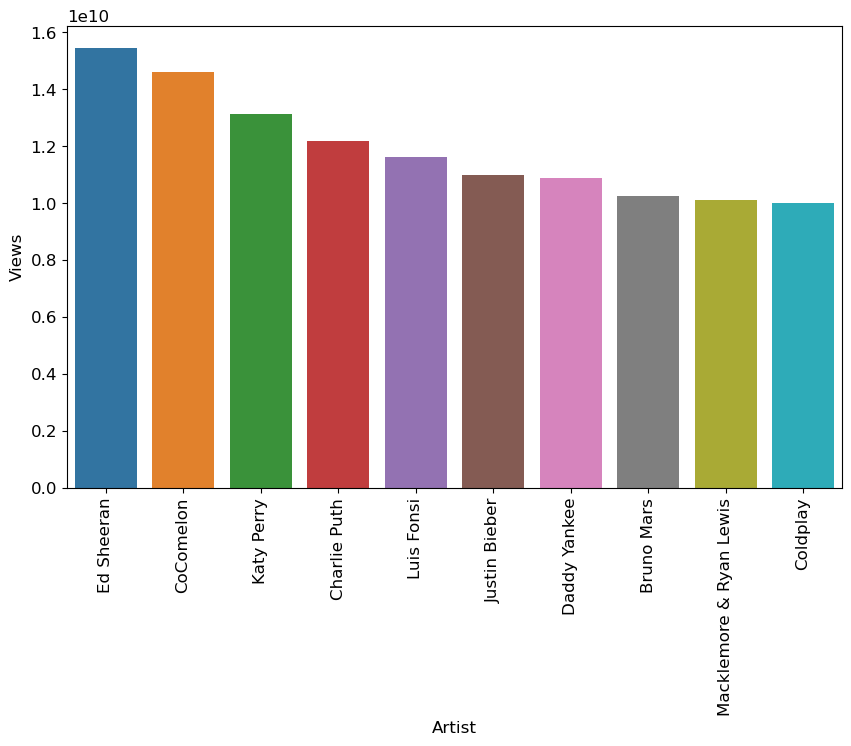

In [64]:
groupedArtistsYT = ds.groupby('Artist')['Views'].sum().reset_index()
topTenArtistsYT = groupedArtistsYT.sort_values(by='Views',ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(topTenArtistsYT,x='Artist',y='Views')
plt.set_xlabel='Artist'
plt.set_ylabel='Views'
plt.xticks(rotation=90)
topTenArtistsYT.head(10)

As we can see Ed Sheeran tops the chart with a staggering 10 Billion combined views on his videos on YouTube.

## Likes:

This feature contains the number of likes on the YouTube video related to the entry. Let's take a look at how many null values it contains:

In [65]:
ds[ds['Likes'].isna()].shape[0]

541

541, so there are some entries for which the information about the YouTube video is present but they miss info about the number of likes for said YouTube video, perhaps because the number of likes is 0 or for a retrieving error.

Let's look at how the values of likes are distributed:

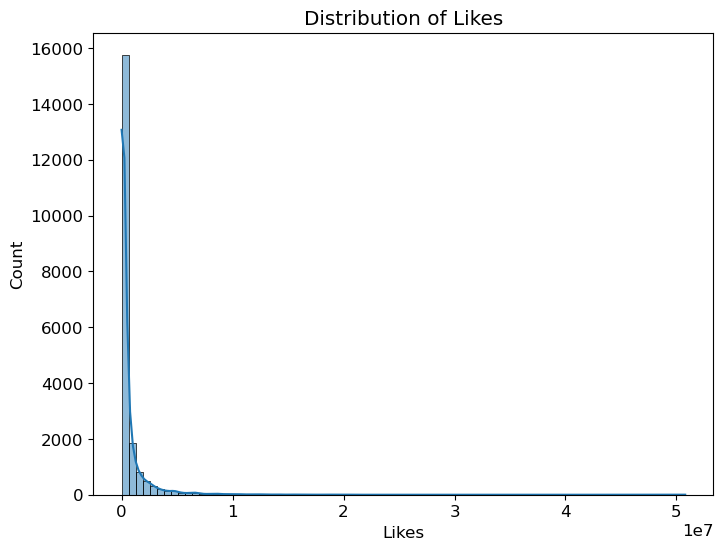

In [66]:
plt.figure(figsize=(8, 6))
sns.histplot(ds['Likes'], kde=True,bins = 80)
plt.title('Distribution of Likes')
plt.xlabel('Likes')
plt.ylabel('Count')
plt.show()

As we can see basically all the entries in the Data Set lie in the firstmost left hand side of the plot, meaning that they have less than 10 Million likes on YouTube. The exact percentage is:

In [67]:
(len(ds[ds['Likes']<10000000])/len(ds))*100

96.71300318563569

**96.7%** of all the entries have less than 10 million likes. This puts in evidence a big difference in scale between this feature and, for instance, the views feature. But as we can see from the plots these two features present a very similar distribution of values, so, perhaps, a very high correlation. Let's see:

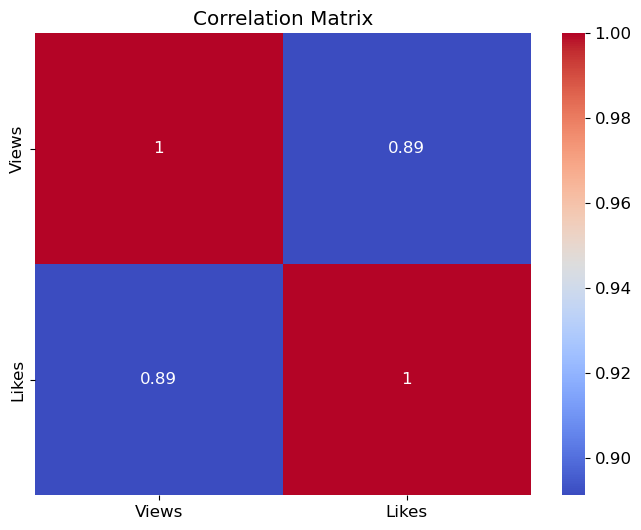

In [68]:
correlation_matrix = ds[['Views', 'Likes']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

0.89 on Pearson's coefficient is a very large value, so we can safely say that these attributes go hand in hand very well, hence one of the two features could be dropped.

Let's now quickly take a look at the top 10 most liked videos on YouTube:

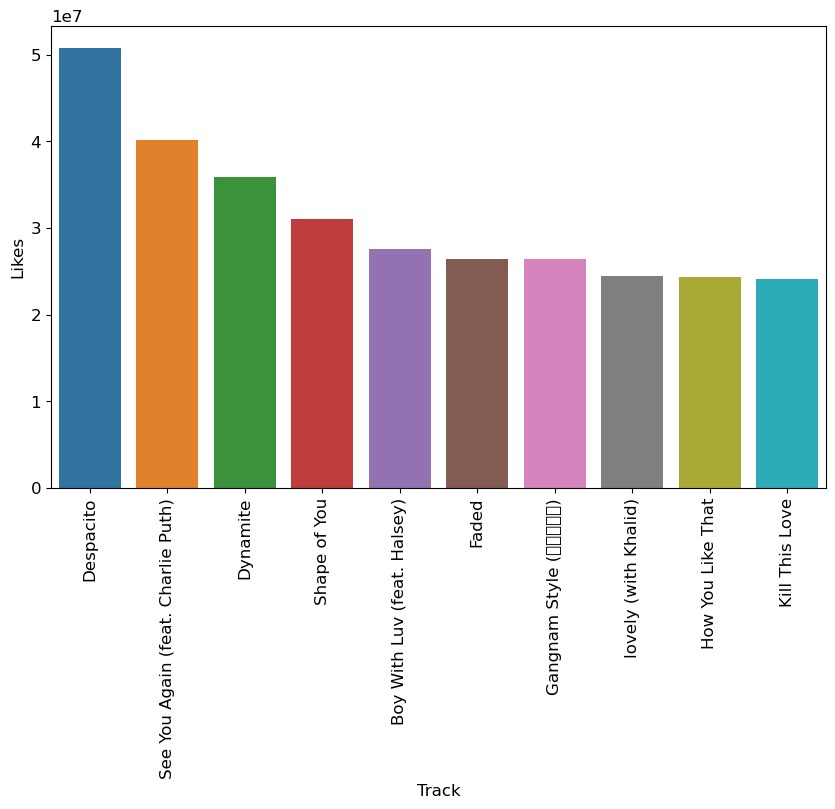

In [69]:
sortedDs=ds.sort_values(by='Likes', ascending=False).drop_duplicates(subset='Track',keep='first')
topTenTracksLikes = sortedDs.head(10)[['Track','Likes']]
topTenTracksLikes.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(topTenTracksLikes,x='Track',y='Likes')
plt.set_xlabel='Track'
plt.set_ylabel='Likes'
plt.xticks(rotation=90)
plt.show()

As we can see a good part of these tracks are also present in the top 10 tracks per views, further confirming the correlation of the two values.

## Comments:

This feature contains the number of comments on the YouTube video related to the entry. Let's take a look at how many null values it contains:

In [70]:
ds[ds['Comments'].isna()].shape[0]

569

Again, slightly more than the 470 for which the whole information about the YouTube video is missing. Also here we can take a guess and say that the missing values are because there are no comments under the related video or for some systemic problem during the data gathering process.

Likewise with the Likes feature, let's take a look at the distribution of values and see if there's some correlation with some other feature:

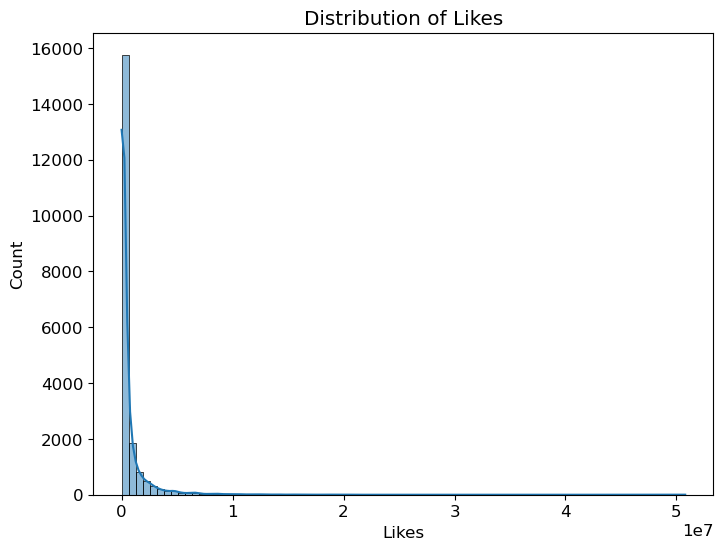

In [71]:
plt.figure(figsize=(8, 6))
sns.histplot(ds['Likes'], kde=True,bins = 80)
plt.title('Distribution of Likes')
plt.xlabel('Likes')
plt.ylabel('Count')
plt.show()

As we can see, a very similar shape to the distribution of Likes and also Views, so let's take a look now at the correlation:

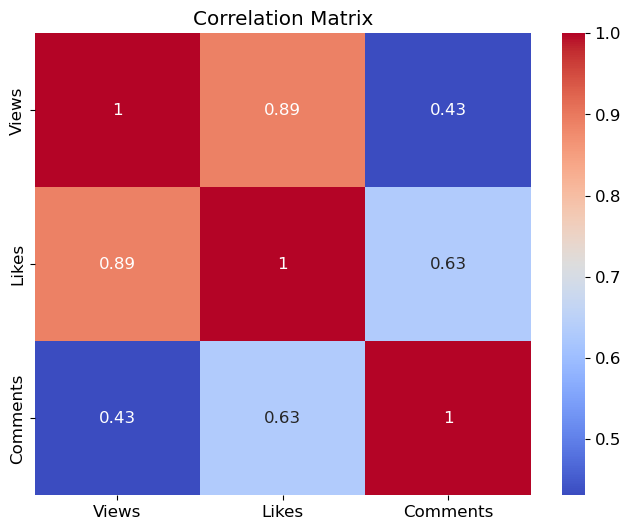

In [72]:
correlation_matrix = ds[['Views', 'Likes','Comments']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

We can see a value of 0.63 for the Pearson's coefficient between Likes and Comments and 0.43 between Comments and views. This tells us that although the shape of the distribution is very similar, the correlation between likes and views remains stronger than the one between comments and views or even likes and comments.

Let's now quickly take a look at the most commented videos related to our tracks on YouTube:

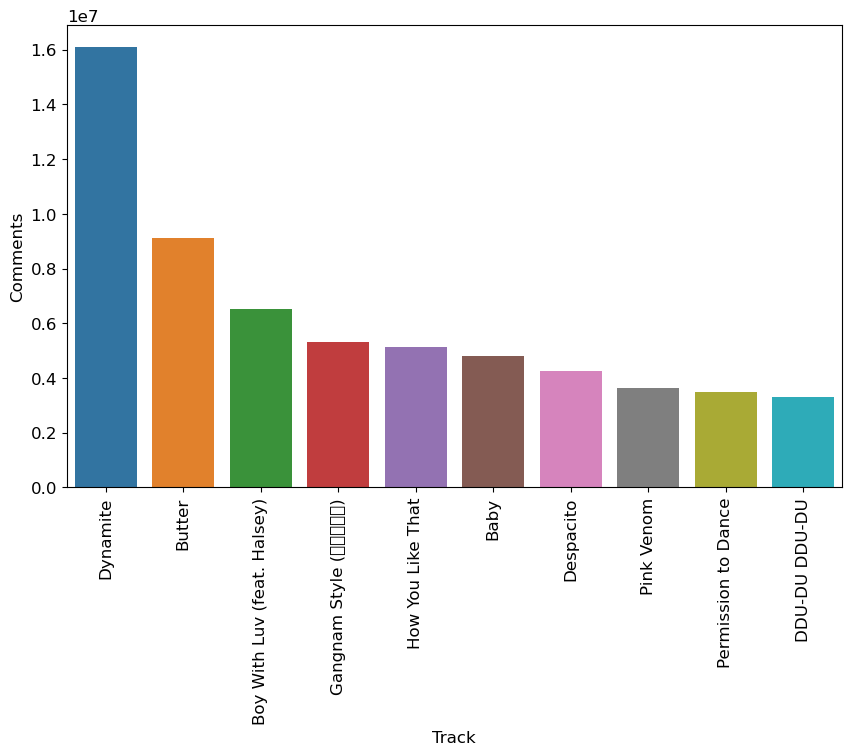

In [73]:
sortedDs=ds.sort_values(by='Comments', ascending=False).drop_duplicates(subset='Track',keep='first')
topTenTracksComments = sortedDs.head(10)[['Track','Comments']]
topTenTracksComments.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(topTenTracksComments,x='Track',y='Comments')
plt.set_xlabel='Track'
plt.set_ylabel='Comments'
plt.xticks(rotation=90)
plt.show()

We can see that the most comment filled videos are the ones from K-Pop band BTS, with the most commented one, the song "Dynamite", reaching almost 16 Million comments.

## Description:

This feature contains the description for the YouTube video related to each entry in the Data Set. It would be quite useful for tasks like text mining, that won't be tackled in this project. Let's just quickly check how many null values there are:

In [74]:
ds[ds['Description'].isna()].shape[0]

876

## Licensed:

This feature indicates whether the video represents licensed content, which means that the **content was uploaded to a channel linked to a YouTube content partner** and then claimed by that partner. In other words it is a boolean flag that is true when the related video is licensed to the partner associated with the channel who uploaded it, so that it can be eventually monetized upon.  
YouTube monetization is a huge revenue stream for content creators, and this feature could be used to do an estimation on how much these videos have generated in terms of revenue.  
Let's look at how many null values there are, and then at how many videos are actually claimed and how many aren't:

In [75]:
ds[ds['Licensed'].isna()].shape[0]

470

In [76]:
pd.value_counts(ds['Licensed'])

True     14140
False     6108
Name: Licensed, dtype: int64

## official_video:

This boleean feature represents the presence (or lack there of) of an official video for the related Track. Let's see how the values are biparted:

In [77]:
ds[ds['official_video'].isna()].shape[0]

470

In [78]:
pd.value_counts(ds['official_video'])

True     15723
False     4525
Name: official_video, dtype: int64

# Task 1: Clustering of Songs

For our first task, we wanna go and try to group up our tracks based on their audio features. So for this task we'll use only the numeric (and categorical, like Key) features, that represent the audio qualities of our tracks. Any other feature, like Track Name or URL, won't be used for this task. The reason behind this decision is that we tend to associate songs together into a "genre" based solely on the audio features, I.E if a song has a fast tempo and is very loud most probably it'll be a rock song. If we clustered songs together using features other than the ones describing the audio qualities (I.E the Artist name) we'd be implicitly saying that two instances of the dataset are "more close to eachother" because, for example, they are made by the same Artist, even when they have very different values for the musical features. 

Let's now drop the columns unrelated to the audio features:

In [79]:
columnsToBeDropped=['Unnamed: 0','Track','Artist','Url_spotify','Album','Album_type','Uri','Stream','Url_youtube','Title','Channel','Views','Likes','Comments','Description','Licensed','official_video']
ds=ds.drop(columnsToBeDropped,axis=1)
ds.head()

Danceability  Energy   Key  Loudness  Speechiness  Acousticness  \
0         0.818   0.705   6.0    -6.679       0.1770      0.008360   
1         0.676   0.703   8.0    -5.815       0.0302      0.086900   
2         0.695   0.923   1.0    -3.930       0.0522      0.042500   
3         0.689   0.739   2.0    -5.810       0.0260      0.000015   
4         0.663   0.694  10.0    -8.627       0.1710      0.025300   

   Instrumentalness  Liveness  Valence    Tempo  Duration_ms  Duration_s  
0          0.002330    0.6130    0.772  138.559     222640.0     222.640  
1          0.000687    0.0463    0.852   92.761     200173.0     200.173  
2          0.046900    0.1160    0.551  108.014     215150.0     215.150  
3          0.509000    0.0640    0.578  120.423     233867.0     233.867  
4          0.000000    0.0698    0.525  167.953     340920.0     340.920

In [80]:
ds=ds.drop('Duration_ms',axis=1)
ds.head()

Danceability  Energy   Key  Loudness  Speechiness  Acousticness  \
0         0.818   0.705   6.0    -6.679       0.1770      0.008360   
1         0.676   0.703   8.0    -5.815       0.0302      0.086900   
2         0.695   0.923   1.0    -3.930       0.0522      0.042500   
3         0.689   0.739   2.0    -5.810       0.0260      0.000015   
4         0.663   0.694  10.0    -8.627       0.1710      0.025300   

   Instrumentalness  Liveness  Valence    Tempo  Duration_s  
0          0.002330    0.6130    0.772  138.559     222.640  
1          0.000687    0.0463    0.852   92.761     200.173  
2          0.046900    0.1160    0.551  108.014     215.150  
3          0.509000    0.0640    0.578  120.423     233.867  
4          0.000000    0.0698    0.525  167.953     340.920

Let's now look at the null values within the datasets, to see how to treat them:

In [81]:
ds.isna().sum()

Danceability        2
Energy              2
Key                 2
Loudness            2
Speechiness         2
Acousticness        2
Instrumentalness    2
Liveness            2
Valence             2
Tempo               2
Duration_s          2
dtype: int64

We only got 2 rows for each feature where the feature is null, let's try and check out if it happens all in the same 2 rows:

In [82]:
ds[ds['Danceability'].isna()]

Danceability  Energy  Key  Loudness  Speechiness  Acousticness  \
11890           NaN     NaN  NaN       NaN          NaN           NaN   
13843           NaN     NaN  NaN       NaN          NaN           NaN   

       Instrumentalness  Liveness  Valence  Tempo  Duration_s  
11890               NaN       NaN      NaN    NaN         NaN  
13843               NaN       NaN      NaN    NaN         NaN

Exactly as we suspected, there are 2 rows for which the whole set of musical features is not at defined. What we're gonna do with these 2 records is drop them, since they are pretty pointless for the sake of our task, grouping up similar songs based on their musical characteristics.

In [83]:
nullRowsIndex=ds[ds['Danceability'].isna()].index
ds=ds.drop(nullRowsIndex)

In [84]:
ds.isna().sum()

Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_s          0
dtype: int64

Now, remaining on the topic of rows that have "wrong" values on them, during our feature highlight we discovered some entries with a Tempo value set to 0 BPM, even though they clearly have a tempo because they are fully fledged songs. Let's take another look at them:

In [85]:
weirdlySlowSongs

Danceability    Energy   Key  Loudness  Speechiness  Acousticness  \
2073            0.0  0.405000   0.0    -9.935          0.0       0.84200   
2871            0.0  0.802000   1.0    -7.977          0.0       0.00417   
7187            0.0  0.402000   5.0   -15.718          0.0       0.97200   
8373            0.0  0.105000   7.0   -13.925          0.0       0.98900   
9266            0.0  0.036200   0.0   -22.519          0.0       0.99400   
9348            0.0  0.000252   9.0   -17.746          0.0       0.00948   
9358            0.0  0.000252   9.0   -17.746          0.0       0.00948   
13839           0.0  0.003420   8.0   -28.460          0.0       0.79100   
13840           0.0  0.001250   1.0   -27.592          0.0       0.90800   
13842           0.0  0.000055  10.0   -21.995          0.0       0.92100   
13844           0.0  0.251000   2.0   -25.004          0.0       0.11900   
13845           0.0  0.001250   1.0   -27.592          0.0       0.90800   
13848           0.0  0.003420   8.0   -28.460          0.0       0.79100   
15588           0.0  0.003420   8.0   -28.460          0.0       0.79100   
15590           0.0  0.001250   1.0   -27.592          0.0       0.90800   
15595           0.0  0.373000  10.0   -16.469          0.0       0.15300   
15597           0.0  0.000055  10.0   -21.995          0.0       0.92100   

       Instrumentalness  Liveness  Valence  Tempo  Duration_ms       Stream  \
2073            0.00114    0.1980      0.0    0.0     147000.0   22358910.0   
2871            0.87800    0.6030      0.0    0.0      94967.0    9283211.0   
7187            0.00545    0.8970      0.0    0.0     151253.0    1995393.0   
8373            0.95700    0.1080      0.0    0.0      64840.0    3387203.0   
9266            0.94000    0.0958      0.0    0.0     151507.0   11902123.0   
9348            0.87700    0.8060      0.0    0.0      93452.0   54256600.0   
9358            0.87700    0.8060      0.0    0.0      93452.0   54256600.0   
13839           1.00000    0.1110      0.0    0.0      90228.0  956435715.0   
13840           1.00000    0.1110      0.0    0.0      72223.0  128701242.0   
13842           1.00000    0.1140      0.0    0.0     108527.0   26677287.0   
13844           0.91300    0.3840      0.0    0.0      62850.0   48053292.0   
13845           1.00000    0.1110      0.0    0.0      72223.0   71571206.0   
13848           1.00000    0.1110      0.0    0.0      90228.0   26018007.0   
15588           1.00000    0.1110      0.0    0.0      90228.0  956435715.0   
15590           1.00000    0.1110      0.0    0.0      72223.0  128701242.0   
15595           0.99900    0.7260      0.0    0.0     593754.0   15110333.0   
15597           1.00000    0.1140      0.0    0.0     108527.0   26677287.0   

             Views     Likes                  Artist  \
2073    12691825.0   98026.0         Louis Armstrong   
2871      104635.0    1905.0           The Alchemist   
7187    31017254.0  204651.0       Luciano Pavarotti   
8373       50330.0     453.0                     M83   
9266      185634.0    1796.0               Lang Lang   
9348         328.0       1.0            Ocean Sounds   
9358         328.0       1.0   Ocean Waves For Sleep   
13839       1492.0      18.0  White Noise for Babies   
13840    2329675.0   11249.0  White Noise for Babies   
13842        407.0       1.0  White Noise for Babies   
13844      17140.0      40.0  White Noise for Babies   
13845  157884163.0  483072.0  White Noise for Babies   
13848       1492.0      18.0  White Noise for Babies   
15588       1492.0      18.0  White Noise Baby Sleep   
15590     290014.0     674.0  White Noise Baby Sleep   
15595     376087.0     561.0  White Noise Baby Sleep   
15597        407.0       1.0  White Noise Baby Sleep   

                                                   Track  
2073                                       Hello, Dolly!  
2871                                             Arrival  
7187       Rigoletto / Act 3:

This dataframe contains 17 rows, of which the first 5 tracks are fully fledged songs. The first 5 rows have clearly an error on the tempo measurement, because they have a rythmic pattern, unlike the rest of the rows that are just white noises and so for definition don't have tempo. We could try to make up for this error by either filling in the tempo value by hand or deleting these 5 rows. Given that the latter option would make us lose 5 rows containing other valuble information, and this feature seems to be the only "issue" with them, we opted to fill in the values by hand.
  To perform this duty, we have used as reference the website https://songbpm.com, a wonderful website providing many details about the musical features of songs, even if it hasn't found all of the missing values.
For Louis Armstrong's "Hello, Dolly" the website indicates a BPM of 155.
  For The Alchemist's Arrival, songbpm.com doesn't have an entry, hence we searched elsewhere and found another website called https://getsongbpm.com, which estimated a tempo of 153 BPM.
  The Wonderful opera from Giuseppe Verdi, performed in this case live by the staggering voice of Luciano Pavarotti, per songbpm.com, presents a BPM of 148 (there are multiple versions of the same song, but the version with Josè Carreras has 148 BPM)
  For M83's song we could not find any sote with reference, and even when we entered the mp3 file of the song into many different BPM calculators we ended up getting mixed results, so for this instance we decided to calculate the value ourselves and reasonably came up with a value of around 70BPM.
  At last, Lang Lang's "The Departure" we found a BPM of 117.
  So, let's go and enter these values in the dataset.

In [86]:
ds.loc[2073]['Tempo']=155
ds.loc[2871]['Tempo']=153
ds.loc[7178]['Tempo']=148
ds.loc[8373]['Tempo']=70
ds.loc[9266]['Tempo']=117

Ok, so now we've handled these values, and, given that during the Exploratory analysis there were no other criticalities that emerged from the subsets of feature we chose for our clustering task, we can continue our data pre-processing.

Let's take another look at the head of our dataset:

Let's now quickly take a look again at the correlation between our features, and see if there's some columns that explain others:

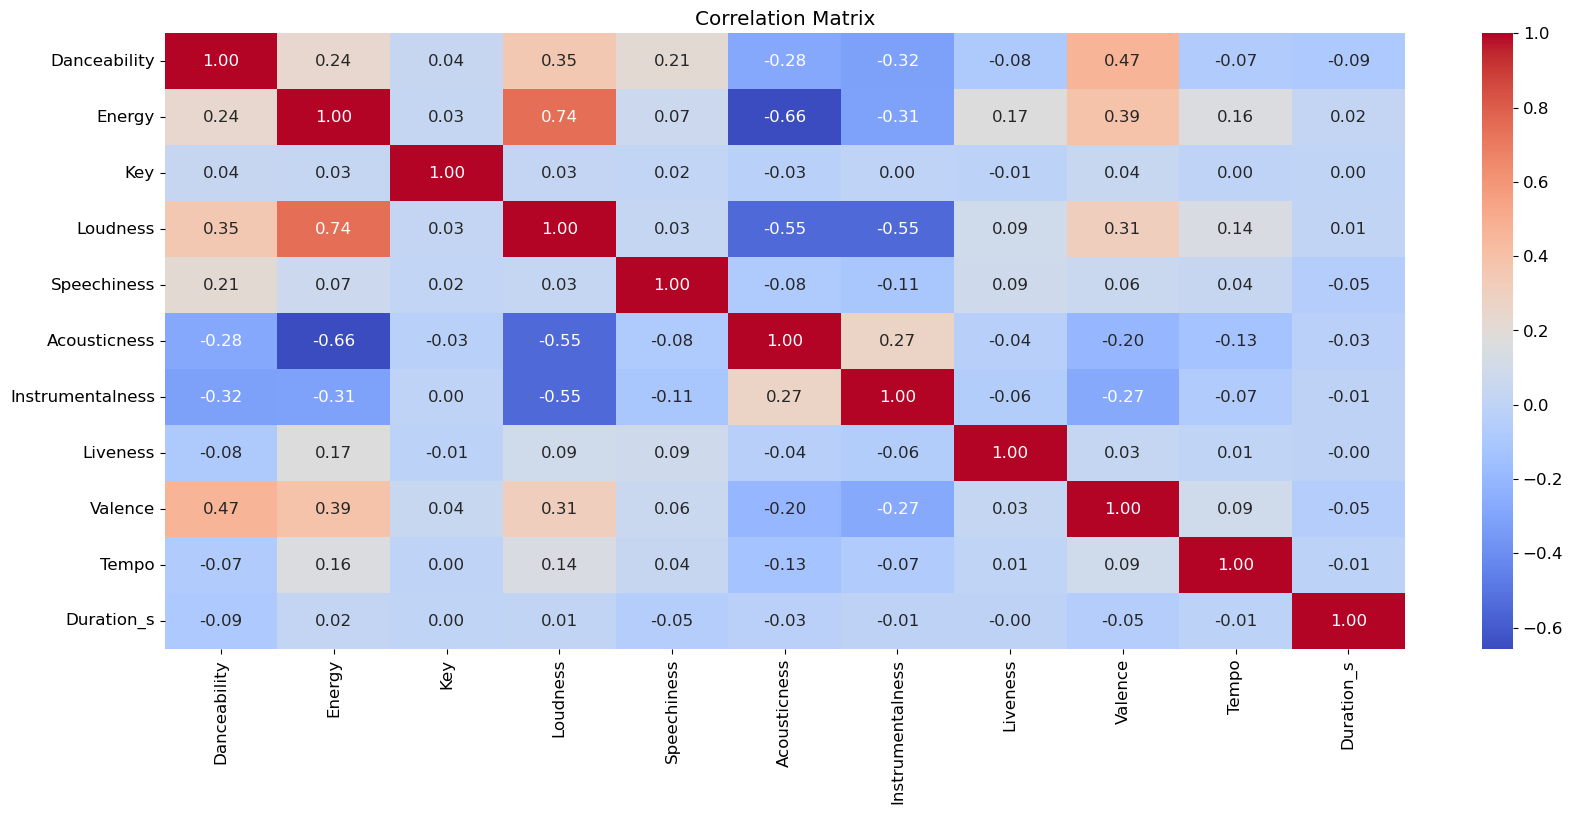

In [87]:
correlation_matrix = ds.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Observing this matrix, we notice that there's a quite strong level of correlation between the feature like "Energy","Loudness","Acousticness" etc meaning that these features could be merged so we could both reducing dimonsionality and increase informative power.
But first we have to check if all the values are well distributed.

In [88]:
ds

Danceability  Energy   Key  Loudness  Speechiness  Acousticness  \
0             0.818   0.705   6.0    -6.679       0.1770      0.008360   
1             0.676   0.703   8.0    -5.815       0.0302      0.086900   
2             0.695   0.923   1.0    -3.930       0.0522      0.042500   
3             0.689   0.739   2.0    -5.810       0.0260      0.000015   
4             0.663   0.694  10.0    -8.627       0.1710      0.025300   
...             ...     ...   ...       ...          ...           ...   
20713         0.582   0.926   5.0    -6.344       0.0328      0.448000   
20714         0.531   0.936   4.0    -1.786       0.1370      0.028000   
20715         0.443   0.830   4.0    -4.679       0.0647      0.024300   
20716         0.417   0.767   9.0    -4.004       0.4190      0.356000   
20717         0.498   0.938   6.0    -4.543       0.1070      0.002770   

       Instrumentalness  Liveness  Valence    Tempo  Duration_s  
0              0.002330    0.6130   0.7720  138.559     222.640  
1              0.000687    0.0463   0.8520   92.761     200.173  
2              0.046900    0.1160   0.5510  108.014     215.150  
3              0.509000    0.0640   0.5780  120.423     233.867  
4              0.000000    0.0698   0.5250  167.953     340.920  
...                 ...       ...      ...      ...         ...  
20713          0.000000    0.0839   0.6580   90.002      94.667  
20714          0.000000    0.0923   0.6570  174.869     150.857  
20715          0.000000    0.1540   0.4190  168.388     136.842  
20716          0.018400    0.1080   0.5390  155.378     108.387  
20717          0.911000    0.1360   0.0787  160.067     181.500  

[20716 rows x 11 columns]

As we can see, the values have different scales, and that could represent an issue for our clustering procedure cause it would lead the algorithm work in an oblong space, thus making it more difficult to identify clusters. Moreover the model would place a much larger weight on tempo and loudness, since those variables vary by much more than the variables that are distributed in the range from 0 to 1.  
One thing we can do to avoid this is **Scaling**, which is the process of rescaling all of our data to make it more "pleasing" to the ML algorithm we choose.  
We'll use StandardScaler().

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_std = scaler.fit_transform(ds)

### Dimensionality Reduction

For this task we can use the Principal component analysis (PCA) technique which attempts to find the best possible subspace that explains most of the variance in the data

In [90]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_std);

Let's the variance ratio of the new features

In [91]:
evr = pca.explained_variance_ratio_
evr

array([0.28049441, 0.11459602, 0.09769117, 0.09120026, 0.0909899 ,
       0.08503274, 0.07654734, 0.07018757, 0.04411219, 0.03441204,
       0.01473637])

In order to guide our decision regarding the number of features to utilize for the k-means clustering algorithm, we can create a cumulative variance plot using the evr.cumsum() function along with matplotlib. This plot serves as a useful tool for informing our decision-making process.

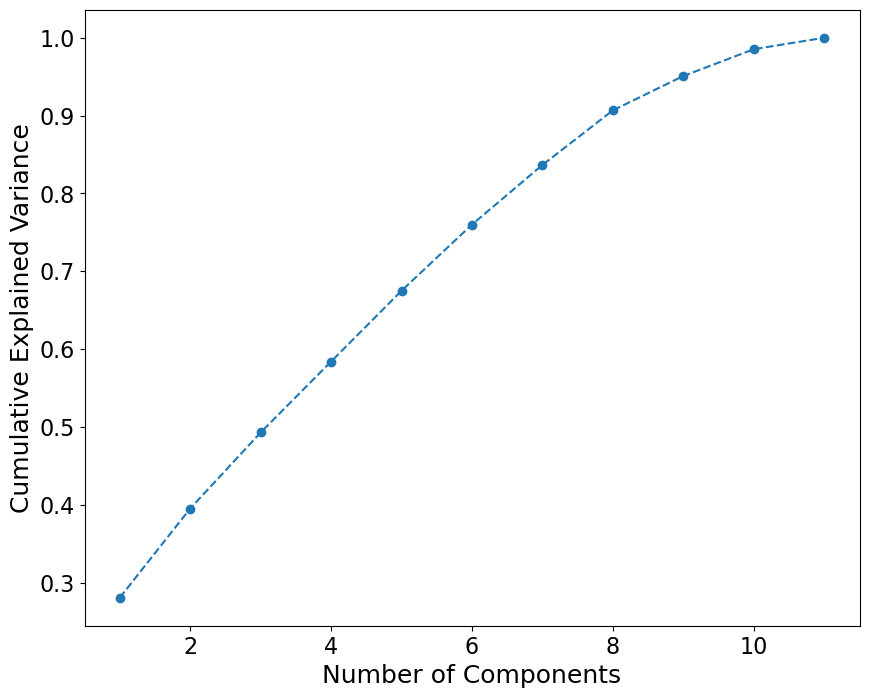

In [92]:
fig = plt.figure(figsize=(10,8))
plt.plot(range(1, len(ds.columns)+1), evr.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components', fontsize=18)
plt.ylabel('Cumulative Explained Variance',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

we can observe that each of the principal components explain a pretty considerable amount of variance.
However, we do not need to keep all of these components. In general, it is a good rule of thumb to preserve around 80% of the variance.

In [93]:
for i, exp_var in enumerate(evr.cumsum()):
    if exp_var >= 0.8:
        n_comps = i + 1
        break
print("Number of components:", n_comps)

Number of components: 7


We can select the 7 most important principal component. So redo the pca with the limit of the number of components.

In [94]:
pca = PCA(n_components=n_comps)
pca.fit(df_std)
scores_pca = pca.transform(df_std)

So, now that our data has the same scale for each feature, we cleaned them of any null/wrong values and has brand new more explanatory features we're ready to tackle our first Task: create a clustering model to group our tracks together based on their musical features.  
To perform our Clustering task we'll use the K-Means algorithm, which is known to be very performative with a large number of Data.
We chose to use the K-Means++ variant of the algorithm (which is actually the default option in the library sklearn) because of its optimized centroid initalization. In addition, we used  Accelerated K-Means, which is an optimization of the procedure that takes advantave of the Triangular Inequality to avoid some computational load if the data is not sparse. We are lucky to fall into this case, given that our scaling procedure has led us into a very dense space.

Before we create our model, we need to find the best possibile value for the hyperparameter k, which is the number of clusters the procedure will create. In order to do so, there are 2 main methods: the **Elbow Method** and the **Silhouette Score Method**  
The Elbow Method consists in representing the inertia as a function of the number of clusters, and then picking the number k which, in the plot of this function, is exactly where the curve has a "Elbow". This way we take the best "reasonable" number of clusters in terms of inertia. The identification of the "Elbow" can either be done visually or with the help of the class KneeLocator in the package kneed. We chose to use the class because we're lazy.


In [95]:
from kneed import KneeLocator
kmeans_per_k = [KMeans(n_clusters=k, random_state=42, algorithm='elkan').fit(scores_pca)
                for k in range(1, 21)]#elkan=Accelereted KMeans
inertias = [model.inertia_ for model in kmeans_per_k]
n_clusters = KneeLocator([i for i in range(1, 21)], inertias, curve='convex', direction='decreasing').knee
print("Optimal number of clusters", n_clusters)

Optimal number of clusters 8


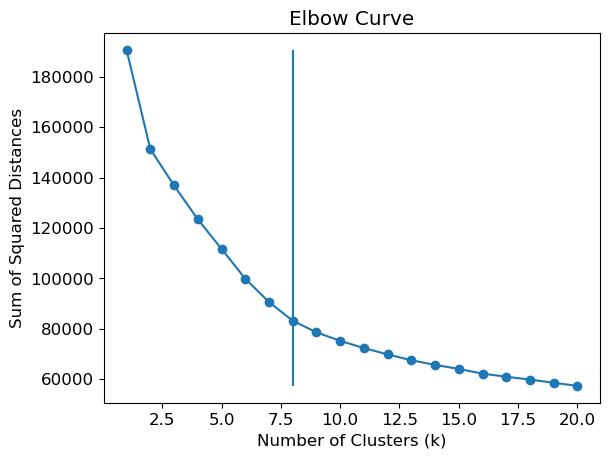

In [96]:
plt.plot(range(1, 21), inertias, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.vlines(n_clusters,ymin=min(inertias),ymax=max(inertias))
plt.show()

This method has indicated that 8 is the optimal number of clusters for the K-Means algorithm applied to our data.
Let's now check out the Silhouette Score Method.  
The Silhouette Score of a clustering procedure is the mean Silhouette Coefficient across all the data. It has a value between -1 and 1, and our goal is to maximize it.  
By itself the silhouette score is a measure of "how well" an instance has been assigned to a cluster, if it's closer to 1 then there's a good chance the instance has been assigned correctly, on the contrary, if it's closer to -1 that means it's very likely that it's been clustered uncorrectly.  
Let's check it out in our case:

In [97]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(scores_pca, model.labels_)
                     for model in kmeans_per_k[1:]]

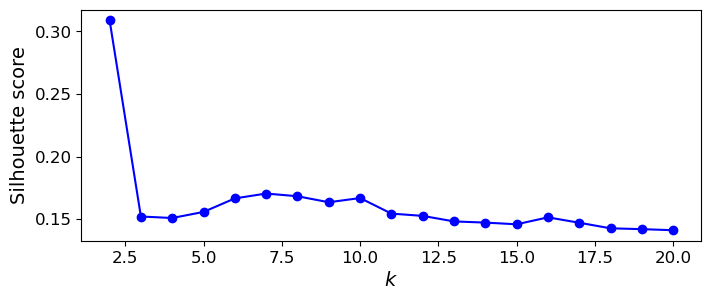

In [98]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 21), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

Silhouette methid indicates 4 as the best number of cluster.

So silhouette and elbow mothod indicates a different number of clusters. For completeness let's follow both suggestion, probably they will lead us to two differnt results.

So let's see how KMeans perform.

In [99]:
kmeans_elbow= KMeans(n_clusters=8, init='k-means++',algorithm='elkan', random_state=42)
kmeans_elbow.fit(scores_pca);

In [100]:
kmeans_silh= KMeans(n_clusters=4, init='k-means++',algorithm='elkan', random_state=42)
kmeans_silh.fit(scores_pca);

### Analysis and Visualization of clusters (Elbow)

For a better visualization of the results it's useful to append the label of the cluster for every entry and the labels from pca.

In [101]:
df_pca_kmeans_elbow = pd.concat([ds.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_pca_kmeans_elbow.columns.values[(-1*n_comps):] = ["Component " + str(i+1) for i in range(n_comps)]
df_pca_kmeans_elbow['Cluster'] = kmeans_elbow.labels_
df_pca_kmeans_elbow.head()

Danceability  Energy   Key  Loudness  Speechiness  Acousticness  \
0         0.818   0.705   6.0    -6.679       0.1770      0.008360   
1         0.676   0.703   8.0    -5.815       0.0302      0.086900   
2         0.695   0.923   1.0    -3.930       0.0522      0.042500   
3         0.689   0.739   2.0    -5.810       0.0260      0.000015   
4         0.663   0.694  10.0    -8.627       0.1710      0.025300   

   Instrumentalness  Liveness  Valence    Tempo  Duration_s  Component 1  \
0          0.002330    0.6130    0.772  138.559     222.640    -1.812179   
1          0.000687    0.0463    0.852   92.761     200.173    -1.075544   
2          0.046900    0.1160    0.551  108.014     215.150    -1.418262   
3          0.509000    0.0640    0.578  120.423     233.867    -0.056899   
4          0.000000    0.0698    0.525  167.953     340.920    -0.820298   

   Component 2  Component 3  Component 4  Component 5  Component 6  \
0    -0.022773    -1.923424     0.433799     0.529230    -0.207974   
1    -0.813890     1.335796     0.078206     0.469381    -0.810419   
2     0.356893     0.622853     0.429602    -1.223795    -0.332098   
3     0.430084     0.948272    -0.337564    -0.811981    -0.285812   
4     0.367236     0.417139    -1.167199     1.337235     1.618826   

   Component 7  Cluster  
0     1.080772        2  
1    -0.021634        0  
2    -0.753621        3  
3    -0.768842        3  
4    -0.070237        7

Although k-means clustering is an unsupervised machine learning technique, making it difficult to directly assess the accuracy of its results, we can still visualize the clusters on a 2D plane to check if there is a reasonable separation of data points based on the underlying sources of signals represented by the components.

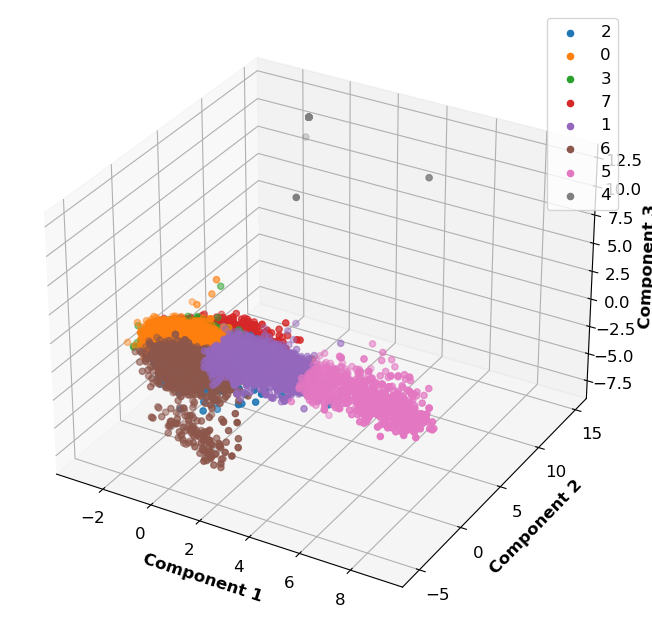

In [102]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Component 1', fontweight ='bold')
ax.set_ylabel('Component 2', fontweight ='bold')
ax.set_zlabel('Component 3', fontweight ='bold')
for c in df_pca_kmeans_elbow['Cluster'].unique():
    ax.scatter(df_pca_kmeans_elbow[df_pca_kmeans_elbow["Cluster"]==c]["Component 1"],df_pca_kmeans_elbow[df_pca_kmeans_elbow["Cluster"]==c]["Component 2"],df_pca_kmeans_elbow[df_pca_kmeans_elbow["Cluster"]==c]["Component 3"],label=c)
ax.legend()

In [103]:
df_pca_kmeans_elbow

Danceability  Energy   Key  Loudness  Speechiness  Acousticness  \
0             0.818   0.705   6.0    -6.679       0.1770      0.008360   
1             0.676   0.703   8.0    -5.815       0.0302      0.086900   
2             0.695   0.923   1.0    -3.930       0.0522      0.042500   
3             0.689   0.739   2.0    -5.810       0.0260      0.000015   
4             0.663   0.694  10.0    -8.627       0.1710      0.025300   
...             ...     ...   ...       ...          ...           ...   
20711         0.582   0.926   5.0    -6.344       0.0328      0.448000   
20712         0.531   0.936   4.0    -1.786       0.1370      0.028000   
20713         0.443   0.830   4.0    -4.679       0.0647      0.024300   
20714         0.417   0.767   9.0    -4.004       0.4190      0.356000   
20715         0.498   0.938   6.0    -4.543       0.1070      0.002770   

       Instrumentalness  Liveness  Valence    Tempo  Duration_s  Component 1  \
0              0.002330    0.6130   0.7720  138.559     222.640    -1.812179   
1              0.000687    0.0463   0.8520   92.761     200.173    -1.075544   
2              0.046900    0.1160   0.5510  108.014     215.150    -1.418262   
3              0.509000    0.0640   0.5780  120.423     233.867    -0.056899   
4              0.000000    0.0698   0.5250  167.953     340.920    -0.820298   
...                 ...       ...      ...      ...         ...          ...   
20711          0.000000    0.0839   0.6580   90.002      94.667    -0.541321   
20712          0.000000    0.0923   0.6570  174.869     150.857    -1.955625   
20713          0.000000    0.1540   0.4190  168.388     136.842    -0.867745   
20714          0.018400    0.1080   0.5390  155.378     108.387    -0.705887   
20715          0.911000    0.1360   0.0787  160.067     181.500     0.858363   

       Component 2  Component 3  Component 4  Component 5  Component 6  \
0        -0.022773    -1.923424     0.433799     0.529230    -0.207974   
1        -0.813890     1.335796     0.078206     0.469381    -0.810419   
2         0.356893     0.622853     0.429602    -1.223795    -0.332098   
3         0.430084     0.948272    -0.337564    -0.811981    -0.285812   
4         0.367236     0.417139    -1.167199     1.337235     1.618826   
...            ...          ...          ...          ...          ...   
20711    -0.457988     0.563082     0.010813    -0.438766    -1.358120   
20712     1.017845    -0.174305    -1.764845    -0.649714     0.494194   
20713     1.607006    -0.231254    -1.581629    -0.653586     0.016393   
20714    -0.268376    -1.794248    -1.611858     1.042439     1.379483   
20715     2.256037    -0.296345    -1.833106     0.521481    -0.138466   

       Component 7  Cluster  
0         1.080772        2  
1        -0.021634        0  
2        -0.753621        3  
3        -0.768842        3  
4        -0.070237        7  
...            ...      ...  
20711    -0.323593        3  
20712    -0.356257        7  
20713    -0.623961        7  
20714    -1.090023        6  
20715    -2.276928        7  

[20716 rows x 19 columns]

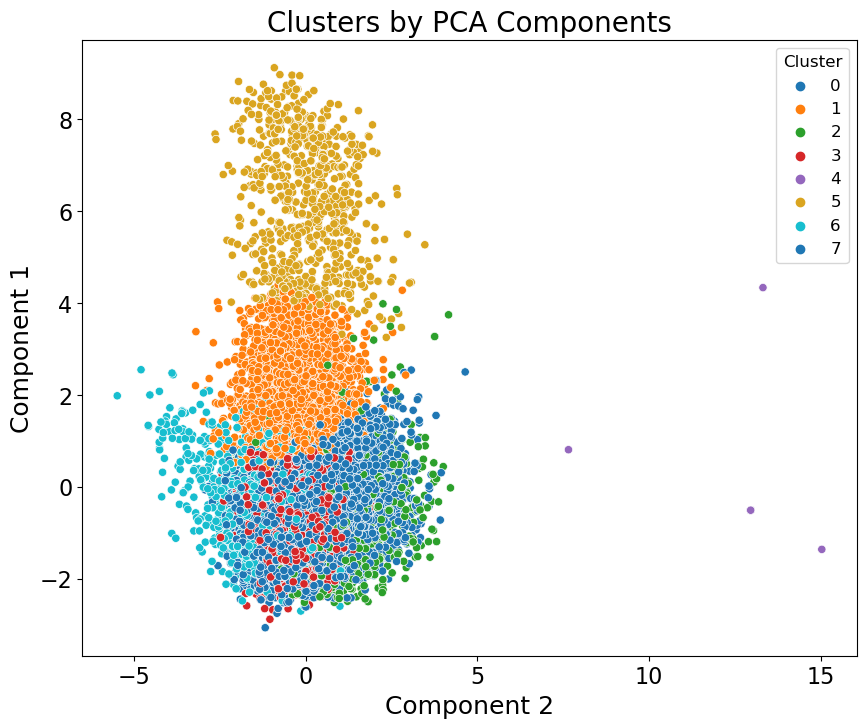

In [104]:
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x= df_pca_kmeans_elbow['Component 2'], y= df_pca_kmeans_elbow['Component 1'], hue=df_pca_kmeans_elbow['Cluster'], palette = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'goldenrod', 'tab:cyan'])
plt.title('Clusters by PCA Components', fontsize=20)
plt.xlabel("Component 2", fontsize=18)
plt.ylabel("Component 1", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

We notice that "Cluster 7" is more isolated than the others.

We could add the Cluster label for each entry of our original DataFrame in order to study better the entries.

In [105]:
nullRowsIndex=df[df['Danceability'].isna()].index
df_cluster=df.drop(nullRowsIndex)
df_cluster["Cluster"]=kmeans_elbow.labels_
df_cluster

Unnamed: 0       Artist  \
0               0     Gorillaz   
1               1     Gorillaz   
2               2     Gorillaz   
3               3     Gorillaz   
4               4     Gorillaz   
...           ...          ...   
20713       20713  SICK LEGEND   
20714       20714  SICK LEGEND   
20715       20715  SICK LEGEND   
20716       20716  SICK LEGEND   
20717       20717  SICK LEGEND   

                                             Url_spotify  \
0      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
1      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
2      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
3      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
4      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
...                                                  ...   
20713  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
20714  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
20715  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
20716  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
20717  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   

                                               Track  \
0                                     Feel Good Inc.   
1                                    Rhinestone Eyes   
2      New Gold (feat. Tame Impala and Bootie Brown)   
3                                 On Melancholy Hill   
4                                     Clint Eastwood   
...                                              ...   
20713                           JUST DANCE HARDSTYLE   
20714                 SET FIRE TO THE RAIN HARDSTYLE   
20715                      OUTSIDE HARDSTYLE SPED UP   
20716                            ONLY GIRL HARDSTYLE   
20717                             MISS YOU HARDSTYLE   

                                               Album Album_type  \
0                                         Demon Days      album   
1                                      Plastic Beach      album   
2      New Gold (feat. Tame Impala and Bootie Brown)     single   
3                                      Plastic Beach      album   
4                                           Gorillaz      album   
...                                              ...        ...   
20713                           JUST DANCE HARDSTYLE     single   
20714                 SET FIRE TO THE RAIN HARDSTYLE     single   
20715                      OUTSIDE HARDSTYLE SPED UP     single   
20716                            ONLY GIRL HARDSTYLE     single   
20717                             MISS YOU HARDSTYLE     single   

                                        Uri  Danceability  Energy   Key  ...  \
0      spotify:track:0d28khcov6AiegSCpG5TuT         0.818   0.705   6.0  ...   
1      spotify:track:1foMv2HQwfQ2vntFf9HFeG         0.676   0.703   8.0  ...   
2      spotify:track:64dLd6rVqDLtkXFYrEUHIU         0.695   0.923   1.0  ...   
3      spotify:track:0q6LuUqGLUiCPP1cbdwFs3         0.689   0.739   2.0  ...   
4      spotify:track:7yMiX7n9SBvadzox8T5jzT         0.663   0.694  10.0  ...   
...                                     ...           ...     ...   ...  ...   
20713  spotify:track:0RtcKQGyI4hr8FgFH1TuYG         0.582   0.926   5.0  ...   
20714  spotify:track:3rHvPA8lUnPBkaLyPOc0VV         0.531   0.936   4.0  ...   
20715  spotify:track:4jk00YxPtPbhvHJE9N4ddv         0.443   0.830   4.0  ...   
20716  spotify:track:5EyErbpsugWliX006eTDex         0.417   0.767   9.0  ...   
20717  spotify:track:6lOn0jz1QpjcWeXo1oMm0k         0.498   0.938   6.0  ...   

                                                   Title              Channel  \
0             Gorillaz - Feel Good Inc. (Official Video)             Gorillaz   
1      Gorillaz - Rhinestone Eyes [Storyboard Film] (...             Gorillaz   
2      Gorillaz - New Gold ft. Tame Impala & Bootie B...             Gorillaz   
3         Gorillaz - On Melancholy Hill (Official Video)             Gorillaz   
4             Gorillaz - Clint Ea

Now we could visulize which are the songs of the more isolated cluster.

In [106]:
df_cluster[df_cluster["Cluster"]==7][["Artist","Track","Cluster","Duration_ms"]].head(50)

Artist                                              Track  \
4                 Gorillaz                                     Clint Eastwood   
6                 Gorillaz  New Gold (feat. Tame Impala and Bootie Brown) ...   
17   Red Hot Chili Peppers                                         By the Way   
30               Metallica                         Enter Sandman (Remastered)   
31               Metallica                  Nothing Else Matters (Remastered)   
32               Metallica                     Master of Puppets (Remastered)   
33               Metallica                                 Whiskey In The Jar   
34               Metallica                        The Unforgiven (Remastered)   
35               Metallica                                   One (Remastered)   
36               Metallica               For Whom The Bell Tolls (Remastered)   
37               Metallica                                         Lux Æterna   
39               Metallica                                  Screaming Suicide   
40                Coldplay                                             Yellow   
41                Coldplay                                       Viva La Vida   
45                Coldplay                                A Sky Full of Stars   
46                Coldplay                                           Paradise   
49                Coldplay                                            Fix You   
59               Daft Punk                                       Digital Love   
62             Linkin Park                                     What I've Done   
65             Linkin Park                                              Faint   
76               Radiohead                          Jigsaw Falling Into Place   
78               Radiohead                                               Just   
80                   AC/DC                                    Highway to Hell   
81                   AC/DC                                      Thunderstruck   
82                   AC/DC                                      Back In Black   
85                   AC/DC                                        Hells Bells   
87                   AC/DC                                    Shoot to Thrill   
88                   AC/DC  It's a Long Way to the Top (If You Wanna Rock ...   
101        Michael Jackson                                            Chicago   
114                   P!nk                                            So What   
115                   P!nk                                      What About Us   
116                   P!nk                               Cover Me In Sunshine   
117                   P!nk                                          TRUSTFALL   
119                   P!nk                       True Love (feat. Lily Allen)   
124                 Eminem                                    Till I Collapse   
128                 Eminem                                Sing For The Moment   
142                 Khalid                                            Silence   
149                 Khalid                           Love Lies (with Normani)   
161      Machine Gun Kelly   I Think I'm OKAY (with YUNGBLUD & Travis Barker)   
165      Machine Gun Kelly                                   bloody valentine   
170              Nicky Jam                                                  X   
171              Nicky Jam                  El Perdón (with Enrique Iglesias)   
180            The Beatles               Here Comes The Sun - Remastered 2009   
182            The Beatles                    Come Together - Remastered 2009   
187            The Beatles                         Hey Jude - Remastered 2015   
196                Pitbull  We Are One (Ole Ola) [The Official 2014 FIFA W...   
216          Elvis Presley                                     If I Can Dream   
251                    Sia                                        Unstoppable   
253                    Sia            Dusk Till Daw

All there songs have a very long duration, this means that this feature had a big impact on the cluster formation.

Now let's see if similar songs of one artist are in the same cluster

In [107]:
df_cluster[df_cluster["Artist"].eq("Metallica")][["Artist","Track","Cluster"]]

Artist                                 Track  Cluster
30  Metallica            Enter Sandman (Remastered)        7
31  Metallica     Nothing Else Matters (Remastered)        7
32  Metallica        Master of Puppets (Remastered)        7
33  Metallica                    Whiskey In The Jar        7
34  Metallica           The Unforgiven (Remastered)        7
35  Metallica                      One (Remastered)        7
36  Metallica  For Whom The Bell Tolls (Remastered)        7
37  Metallica                            Lux Æterna        7
38  Metallica             Sad But True (Remastered)        0
39  Metallica                     Screaming Suicide        7

In order to build a radar plot and highlight the singles features for each cluster we have to normalize all values between 0 and 1. One way to do this is to use the MinMaxScaler.

In [108]:
from sklearn.preprocessing import MinMaxScaler
scalerM = MinMaxScaler(feature_range=(0, 1))
X_std = scalerM.fit_transform(ds)
df_normaElbow=pd.DataFrame(X_std,columns=ds.columns)
df_normaSilh=pd.DataFrame(X_std,columns=ds.columns)

Now let's add the cluster label and calculate the average values.

In [109]:
df_normaElbow["Cluster"]=kmeans_elbow.labels_
df_normaElbow=df_normaElbow.groupby("Cluster")[[
 'Danceability',
 'Energy',
 'Key',
 'Loudness',
 'Speechiness',
 'Acousticness',
 'Instrumentalness',
 'Liveness',
 'Valence',
 'Tempo','Duration_s',
]].mean()
df_normaElbow

Danceability    Energy       Key  Loudness  Speechiness  \
Cluster                                                            
0            0.732261  0.713984  0.767349  0.851207     0.081454   
1            0.553553  0.387077  0.449316  0.750082     0.048807   
2            0.596275  0.740693  0.477114  0.845551     0.100411   
3            0.713501  0.707495  0.157259  0.851387     0.075972   
4            0.501940  0.827413  0.522727  0.857564     0.093058   
5            0.301632  0.136353  0.461467  0.482069     0.046311   
6            0.735652  0.616582  0.494983  0.817956     0.390234   
7            0.505603  0.747541  0.497860  0.855192     0.074208   

         Acousticness  Instrumentalness  Liveness   Valence     Tempo  \
Cluster                                                                 
0            0.201401          0.015204  0.141803  0.678227  0.472188   
1            0.622104          0.062622  0.133557  0.390289  0.462551   
2            0.284632          0.023005  0.690373  0.573609  0.496480   
3            0.197878          0.009357  0.146275  0.623659  0.470107   
4            0.191013          0.046843  0.196542  0.477426  0.464566   
5            0.890128          0.746440  0.123557  0.143551  0.418953   
6            0.255833          0.003970  0.176746  0.537365  0.513700   
7            0.118950          0.055726  0.164774  0.406357  0.606683   

         Duration_s  
Cluster              
0          0.040394  
1          0.042717  
2          0.041426  
3          0.040132  
4          0.950802  
5          0.039778  
6          0.037771  
7          0.044215

In [110]:
import plotly.graph_objects as go

musicFeatures=[
 'Danceability',
 'Energy',
 'key',
 'Loudness',
 'Speechiness',
 'Acousticness',
 'Instrumentalness',
 'Liveness',
 'Valence',
 'Tempo',
 'Duration_s'
]


fig = go.Figure()


for i in range(8):
    fig.add_trace(go.Scatterpolar(
      r=df_normaElbow.loc[i],
      theta=musicFeatures,
      fill='toself',
      name='Cluster '+str(i)
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True
)

fig.show()

In [111]:
df_cluster[df_cluster["Cluster"]==0][["Artist","Track","Cluster","Energy","Danceability","Instrumentalness","Liveness","Loudness","Speechiness","Tempo","Key"]].head(30)

Artist                                              Track  \
1                 Gorillaz                                    Rhinestone Eyes   
5                 Gorillaz                                               DARE   
7                 Gorillaz                 She's My Collar (feat. Kali Uchis)   
10   Red Hot Chili Peppers                                    Californication   
12   Red Hot Chili Peppers                                         Can't Stop   
15   Red Hot Chili Peppers                                      Snow (Hey Oh)   
18   Red Hot Chili Peppers                                       Give It Away   
23                 50 Cent                                           P.I.M.P.   
27                 50 Cent                 Is This Love ('09) (feat. 50 Cent)   
28                 50 Cent                                         If I Can't   
38               Metallica                          Sad But True (Remastered)   
43                Coldplay                           Something Just Like This   
50               Daft Punk  Get Lucky (feat. Pharrell Williams & Nile Rodg...   
52               Daft Punk           Instant Crush (feat. Julian Casablancas)   
53               Daft Punk  Get Lucky (feat. Pharrell Williams & Nile Rodg...   
54               Daft Punk                                   Around the World   
55               Daft Punk                   Harder, Better, Faster, Stronger   
57               Daft Punk   Lose Yourself to Dance (feat. Pharrell Williams)   
64             Linkin Park                                    One Step Closer   
69             Linkin Park                                       BURN IT DOWN   
83                   AC/DC                        You Shook Me All Night Long   
86                   AC/DC                        Dirty Deeds Done Dirt Cheap   
91         Black Eyed Peas                                    DON'T YOU WORRY   
92         Black Eyed Peas                                 Where Is The Love?   
97         Black Eyed Peas                                    Meet Me Halfway   
100        Michael Jackson                                        Billie Jean   
103        Michael Jackson                    Smooth Criminal - 2012 Remaster   
105        Michael Jackson                     Don't Stop 'Til You Get Enough   
107        Michael Jackson                                  Remember the Time   
109        Michael Jackson                            Love Never Felt So Good   

     Cluster  Energy  Danceability  Instrumentalness  Liveness  Loudness  \
1          0   0.703         0.676          0.000687    0.0463    -5.815   
5          0   0.891         0.760          0.086900    0.2980    -5.852   
7          0   0.815         0.726          0.081000    0.1120    -5.886   
10         0   0.767         0.592          0.001650    0.1270    -2.788   
12         0   0.938         0.618          0.000000    0.1670    -3.442   
15         0   0.900         0.427          0.000017    0.1190    -3.674   
18         0   0.936         0.666          0.086000    0.1530    -9.919   
23         0   0.758         0.700          0.000013    0.0401    -3.012   
27         0   0.776         0.853          0.000000    0.1810    -4.221   
28         0   0.631         0.892          0.000000    0.0235    -2.522   
38         0   0.876         0.624          0.001640    0.0561    -6.005   
43         0   0.635         0.617          0.000014    0.1640    -6.769   
50         0   0.811         0.794          0.000001    0.1010    -8.966   
52         0   0.585         0.775          0.619000    0.0770    -9.516   
53         0   0.793         0.810          0.000002    0.0720    -9.404   
54         0   0.795         0.956          0.889000    0.0906    -5.311   
55         0   0.716         0.817          0.002630    0.3580    -8.898   
57         0   0.659         0.832          0.001140    0.0753    -7.828   
64         0   0.969         0.492          0.000001    0.0787  

CLuster 0 seems to be the cluster where either Energy or Danceability, or both of them have values above the mean. This explains the presence of a lot of powerful songs (which also happen to be very loud). From radar plot we can see that these tracks are the most positive (Valence).

In [112]:
df_cluster[df_cluster["Cluster"]==1][["Artist","Track","Cluster","Energy","Danceability","Instrumentalness","Liveness","Loudness","Speechiness","Tempo","Key"]].head(30)

Artist                                              Track  \
11   Red Hot Chili Peppers                                   Under the Bridge   
42                Coldplay                                             Sparks   
44                Coldplay                                      The Scientist   
56               Daft Punk                                 Something About Us   
58               Daft Punk                                        Veridis Quo   
70               Radiohead                                              Creep   
71               Radiohead                                       No Surprises   
72               Radiohead                                       Karma Police   
73               Radiohead                                       High and Dry   
74               Radiohead                            Exit Music (For A Film)   
75               Radiohead                              Weird Fishes/ Arpeggi   
77               Radiohead                                 Fake Plastic Trees   
79               Radiohead                                               Nude   
140                 Khalid                               lovely (with Khalid)   
145                 Khalid                                             Better   
158                Shakira                                         Inevitable   
181            The Beatles                        Let It Be - Remastered 2009   
183            The Beatles                        Yesterday - Remastered 2009   
185            The Beatles                        Blackbird - Remastered 2009   
186            The Beatles                       In My Life - Remastered 2009   
189            The Beatles                        Something - Remastered 2009   
210          Elvis Presley                         Can't Help Falling in Love   
211          Elvis Presley                                     Blue Christmas   
212          Elvis Presley  Here Comes Santa Claus (Right Down Santa Claus...   
213          Elvis Presley                                   Suspicious Minds   
215          Elvis Presley                                  Always On My Mind   
218          Elvis Presley                                      In the Ghetto   
242              Lil Wayne                                             Mirror   
264          Fleetwood Mac                                          Landslide   
269          Fleetwood Mac             Never Going Back Again - 2004 Remaster   

     Cluster  Energy  Danceability  Instrumentalness  Liveness  Loudness  \
11         1   0.345         0.559          0.000105    0.1410   -13.496   
42         1   0.268         0.371          0.051700    0.1040   -10.506   
44         1   0.442         0.557          0.000015    0.1100    -7.224   
56         1   0.475         0.875          0.720000    0.0460   -12.673   
58         1   0.687         0.605          0.949000    0.1040   -13.928   
70         1   0.430         0.515          0.000133    0.1290    -9.935   
71         1   0.393         0.255          0.003610    0.1130   -10.654   
72         1   0.501         0.360          0.000093    0.1720    -9.129   
73         1   0.383         0.419          0.017600    0.0896   -11.782   
74         1   0.276         0.293          0.122000    0.1670   -11.357   
75         1   0.610         0.531          0.756000    0.0908    -8.025   
77         1   0.229         0.463          0.099700    0.2020   -12.592   
79         1   0.342         0.516          0.579000    0.0857    -9.785   
140        1   0.296         0.351          0.000000    0.0950   -10.109   
145        1   0.552         0.596          0.334000    0.1040   -10.278   
158        1   0.461         0.595          0.000149    0.1230    -7.786   
181        1   0.403         0.443          0.000000    0.1110    -8.339   
183        1   0.179         0.332          0.000000    0.0886   -11.830   
185        1   0.127         0.686          0.000014    0.0573  

Cluster 1 is very similar to Cluster 0, except for the key value which is lower. Infact it seems that there are the same artists

In [113]:
df_cluster[df_cluster["Cluster"]==2][["Artist","Track","Cluster","Energy","Danceability","Instrumentalness","Liveness","Loudness","Speechiness","Tempo","Key"]].head(30)

Artist                                              Track  \
0             Gorillaz                                     Feel Good Inc.   
9             Gorillaz                                        Dirty Harry   
61         Linkin Park                                               Numb   
63         Linkin Park                                      Numb / Encore   
66         Linkin Park                                       Bleed It Out   
67         Linkin Park                                           Papercut   
68         Linkin Park                                           Crawling   
95     Black Eyed Peas                                            Pump It   
96     Black Eyed Peas                                     Pump It Louder   
98     Black Eyed Peas                          RITMO (Bad Boys For Life)   
125             Eminem                                               Stan   
126             Eminem                               Love The Way You Lie   
167  Machine Gun Kelly                      make up sex (feat. blackbear)   
192            Pitbull                                  Time of Our Lives   
241          Lil Wayne  Sucker for Pain (with Wiz Khalifa, Imagine Dra...   
249          Lil Wayne                                     Right Above It   
270               ABBA                                      Dancing Queen   
296             Tiësto                                     Pump It Louder   
312              JAY-Z                                      Numb / Encore   
334         Kanye West                      Father Stretch My Hands Pt. 1   
348        Luis Miguel                                La bikina - En vivo   
355            Beyoncé                                        Love On Top   
372        Don Toliver                                        After Party   
416     Wisin & Yandel                                      Noche De Sexo   
454       Mariah Carey        I Know What You Want (feat. Flipmode Squad)   
456       Mariah Carey                                           Obsessed   
500         Pink Floyd                                 Wish You Were Here   
525          Green Day                                            21 Guns   
526          Green Day                                            Holiday   
546               Muse                                             Psycho   

     Cluster  Energy  Danceability  Instrumentalness  Liveness  Loudness  \
0          2   0.705         0.818          0.002330     0.613    -6.679   
9          2   0.877         0.625          0.081100     0.672    -7.176   
61         2   0.863         0.496          0.000000     0.639    -4.153   
63         2   0.793         0.687          0.000000     0.582    -4.254   
66         2   0.967         0.529          0.000000     0.610    -3.647   
67         2   0.939         0.524          0.000000     0.623    -3.994   
68         2   0.702         0.580          0.000003     0.536    -5.565   
95         2   0.931         0.649          0.000000     0.751    -3.150   
96         2   0.942         0.660          0.000018     0.834    -2.273   
98         2   0.716         0.732          0.000758     0.730    -6.968   
125        2   0.768         0.780          0.000002     0.518    -4.325   
126        2   0.925         0.749          0.000000     0.520    -5.034   
167        2   0.678         0.665          0.000000     0.474    -4.122   
192        2   0.802         0.721          0.000000     0.694    -5.797   
241        2   0.786         0.502          0.000000     0.650    -4.378   
249        2   0.841         0.376          0.000000     0.578    -4.348   
270        2   0.870         0.543          0.000939     0.792    -6.514   
296        2   0.942         0.660          0.000018     0.834    -2.273   
312        2   0.793         0.687          0.000000     0.582    -4.254   
334        2   0.573         0.724          0.000000     0.538    -4.113   
348        2   0.710         0.3

Cluster 2 present songs with very low values of Danceability and Energy but it has the highest level of Instrumental playing and a lack of lyrics (Instrumentalness). This is confirmed by the presence of composers like Bach, Zimmer or Einaudi.

In [114]:
df_cluster[df_cluster["Cluster"]==3][["Artist","Track","Cluster","Energy","Danceability","Instrumentalness","Liveness","Loudness","Speechiness","Tempo","Key"]].head(30)

Artist                                          Track  \
2                 Gorillaz  New Gold (feat. Tame Impala and Bootie Brown)   
3                 Gorillaz                             On Melancholy Hill   
8                 Gorillaz              Cracker Island (feat. Thundercat)   
13   Red Hot Chili Peppers                                    Scar Tissue   
14   Red Hot Chili Peppers                                      Otherside   
16   Red Hot Chili Peppers                                Dani California   
19   Red Hot Chili Peppers                               Dark Necessities   
25                 50 Cent                                  Disco Inferno   
47                Coldplay                           Hymn for the Weekend   
48                Coldplay                                    My Universe   
51               Daft Punk                                  One More Time   
60             Linkin Park                                     In the End   
89                   AC/DC                              Rock N Roll Train   
90         Black Eyed Peas                                I Gotta Feeling   
93         Black Eyed Peas                          Just Can’t Get Enough   
99         Black Eyed Peas                                SIMPLY THE BEST   
102        Michael Jackson                                        Beat It   
104        Michael Jackson                 Rock with You - Single Version   
106        Michael Jackson                       They Don't Care About Us   
108        Michael Jackson       The Way You Make Me Feel - 2012 Remaster   
110                   P!nk       Just Give Me a Reason (feat. Nate Ruess)   
113                   P!nk                                            Try   
120                 Eminem                                    Mockingbird   
123                 Eminem                                       Superman   
129                 Eminem                                     Not Afraid   
135      Pharrell Williams                                  Hit Different   
136      Pharrell Williams            Neon Guts (feat. Pharrell Williams)   
138      Pharrell Williams                              Just A Cloud Away   
141                 Khalid                                           Numb   
143                 Khalid                             Young Dumb & Broke   

     Cluster  Energy  Danceability  Instrumentalness  Liveness  Loudness  \
2          3   0.923         0.695          0.046900    0.1160    -3.930   
3          3   0.739         0.689          0.509000    0.0640    -5.810   
8          3   0.913         0.741          0.103000    0.3250    -3.340   
13         3   0.717         0.595          0.002740    0.1080    -4.803   
14         3   0.795         0.458          0.000202    0.0756    -3.265   
16         3   0.913         0.556          0.000009    0.3460    -2.360   
19         3   0.742         0.700          0.019900    0.1100    -6.777   
25         3   0.659         0.925          0.000079    0.2790    -4.763   
47         3   0.693         0.491          0.000007    0.3250    -6.487   
48         3   0.711         0.573          0.000000    0.3280    -6.268   
51         3   0.697         0.613          0.000000    0.3320    -8.618   
60         3   0.864         0.556          0.000000    0.2090    -5.870   
89         3   0.931         0.547          0.011800    0.2780    -2.356   
90         3   0.766         0.744          0.000000    0.5090    -6.375   
93         3   0.628         0.659          0.000000    0.1050    -8.685   
99         3   0.789         0.872          0.000024    0.1250    -6.047   
102        3   0.711         0.776          0.000353    0.2340    -9.030   
104        3   0.535         0.808          0.000099    0.1580   -12.521   
106        3   0.905         0.859          0.008370    0.3220    -5.539   
108        3   0.854         0.877          0.000055    0.1440    -4.523   
110        3   0.547         0.778  

Cluster 3 has similar characteristics to Cluster 0 and 1 but it has lower levels of Energy, Danceability and Valence (so sadder songs) and higher level of Acousticness. This explain why we can see heartfelt and moving songs such as Yesterday by The Beatles. 

In [115]:
df_cluster[df_cluster["Cluster"]==4][["Artist","Track","Cluster","Energy","Danceability","Instrumentalness","Liveness","Loudness","Speechiness","Tempo","Key"]].head(30)

Artist  \
2943           Guru Randhawa   
2983            Amaal Mallik   
4449        Anuradha Paudwal   
4896              Mika Singh   
4926       Himesh Reshammiya   
7383             Divya Kumar   
9361   Ocean Waves For Sleep   
9865             Tulsi Kumar   
10475         Harshdeep Kaur   
13758           Amit Trivedi   
14326      Yo Yo Honey Singh   
15935           Ankit Tiwari   

                                                   Track  Cluster  Energy  \
2943   52 Non Stop Dilbar Dilbar Remix(Remix By Kedro...        4   0.837   
2983   52 Non Stop Dilbar Dilbar Remix(Remix By Kedro...        4   0.837   
4449                                     Om Bhurbhuwasah        4   0.466   
4896   52 Non Stop Dilbar Dilbar Remix(Remix By Kedro...        4   0.837   
4926   52 Non Stop Dilbar Dilbar Remix(Remix By Kedro...        4   0.837   
7383   52 Non Stop Dilbar Dilbar Remix(Remix By Kedro...        4   0.837   
9361                               Ocean Waves for Sleep        4   0.995   
9865   52 Non Stop Dilbar Dilbar Remix(Remix By Kedro...        4   0.837   
10475  High Rated Gabru 52 Non Stop Hits(Remix By Man...        4   0.935   
13758  52 Non Stop Dilbar Dilbar Remix(Remix By Kedro...        4   0.837   
14326  52 Non Stop Dilbar Dilbar Remix(Remix By Kedro...        4   0.837   
15935  52 Non Stop Dilbar Dilbar Remix(Remix By Kedro...        4   0.837   

       Danceability  Instrumentalness  Liveness  Loudness  Speechiness  \
2943         0.5210          0.000013    0.1570    -4.501       0.0794   
2983         0.5210          0.000013    0.1570    -4.501       0.0794   
4449         0.7190          0.000002    0.0973    -9.153       0.0417   
4896         0.5210          0.000013    0.1570    -4.501       0.0794   
4926         0.5210          0.000013    0.1570    -4.501       0.0794   
7383         0.5210          0.000013    0.1570    -4.501       0.0794   
9361         0.0797          0.562000    0.3100   -17.379       0.0612   
9865         0.5210          0.000013    0.1570    -4.501       0.0794   
10475        0.3850          0.000000    0.6780    -2.545       0.2590   
13758        0.5210          0.000013    0.1570    -4.501       0.0794   
14326        0.5210          0.000013    0.1570    -4.501       0.0794   
15935        0.5210          0.000013    0.1570    -4.501       0.0794   

         Tempo  Key  
2943   106.001  7.0  
2983   106.001  7.0  
4449   137.159  3.0  
4896   106.001  7.0  
4926   106.001  7.0  
7383   106.001  7.0  
9361    84.788  1.0  
9865   106.001  7.0  
10475  180.793  2.0  
13758  106.001  7.0  
14326  106.001  7.0  
15935  106.001  7.0

CLuster 4 seems to be the rapper Cluster as it has the highest value of Speechiness out of the clusters and we see big names on the Rap scene like 50 Cent, 2Pac, Jay-Z etc.

In [116]:
df_cluster[df_cluster["Cluster"]==5][["Artist","Track","Cluster","Energy","Danceability","Instrumentalness","Liveness","Loudness","Speechiness","Tempo","Key"]].head(30)

Artist  \
289           Frank Sinatra   
501              Pink Floyd   
508              Pink Floyd   
529        Ludovico Einaudi   
530        Ludovico Einaudi   
531        Ludovico Einaudi   
532        Ludovico Einaudi   
533        Ludovico Einaudi   
534        Ludovico Einaudi   
535        Ludovico Einaudi   
536        Ludovico Einaudi   
537        Ludovico Einaudi   
538        Ludovico Einaudi   
589             Hans Zimmer   
590             Hans Zimmer   
592             Hans Zimmer   
593             Hans Zimmer   
595             Hans Zimmer   
596             Hans Zimmer   
597             Hans Zimmer   
598             Hans Zimmer   
918   Johann Sebastian Bach   
919   Johann Sebastian Bach   
920   Johann Sebastian Bach   
921   Johann Sebastian Bach   
922   Johann Sebastian Bach   
923   Johann Sebastian Bach   
924   Johann Sebastian Bach   
927   Johann Sebastian Bach   
1118          John Williams   

                                                  Track  Cluster   Energy  \
289                        Silent Night - 1999 Remaster        5  0.11800   
501                            The Great Gig in the Sky        5  0.21700   
508                                         Us and Them        5  0.30200   
529                                          Experience        5  0.44900   
530                                      Nuvole Bianche        5  0.05820   
531                                         Una Mattina        5  0.02970   
532                                            The Tree        5  0.00329   
533                                           Wind Song        5  0.00572   
534                                            Luminous        5  0.00229   
535                                        Temple White        5  0.00958   
536                                       Natural Light        5  0.00352   
537                                           Primavera        5  0.20600   
538                                 Rolling Like A Ball        5  0.01200   
589                                     Cornfield Chase        5  0.22600   
590                                                Time        5  0.09680   
592                        Day One (Interstellar Theme)        5  0.01730   
593                                            S.T.A.Y.        5  0.03010   
595                                           Mountains        5  0.05850   
596              This Land - From "The Lion King"/Score        5  0.17400   
597   Chevaliers De Sangreal - From The Da Vinci Cod...        5  0.22200   
598                                          First Step        5  0.08400   
918   Cello Suite No. 1 in G Major, BWV 1007: I. Pré...        5  0.10900   
919           Suite No. 3 in D Major, BWV 1068: II. Air        5  0.08460   
920                  Goldberg Variations, BWV 988: Aria        5  0.01390   
921   The Well-Tempered Clavier, Book 1, BWV 846-869...        5  0.12600   
922   Montero: Adagio (After Bach's Violin Concerto ...        5  0.00301   
923   Unaccompanied Cello Suite No. 1 in G major, BW...        5  0.09930   
924   Flute Sonata in E-Flat Major, BWV 1031: II. Si...        5  0.02990   
927                              Sheep May Safely Graze        5  0.01600   
1118  Somewhere in My Memory - Chorus & Orchestra Ve...        5  0.07670   

      Danceability  Instrumentalness  Liveness  Loudness  Speechiness  \
289         0.2520          0.000062    0.1170   -17.620       0.0328   
501         0.2740          0.896000    0.0832   -13.814       0.0345   
508         0.3570          0.559000    0.6340   -14.526       0.0303   
529         0.4470          0.961000    0.0697   -10.634       0.0376   
530         0.1910          0.890000    0.0941   -25.398       0.0578   
531         0.2310          0.878000    0.0742   -31.544       0.0579   
532         0.3160          0.957000    0.0933   -38.901       0.0482   
533         0.3390          0.923000    0.1030   -32.309       0.0378   
534         0.

For Cluster 5 we don't see any notable values except for the fact it has the highest mean Tempo.

In [117]:
df_cluster[df_cluster["Cluster"]==6][["Artist","Track","Cluster","Energy","Danceability","Instrumentalness","Liveness","Loudness","Speechiness","Tempo","Key"]].head(30)

Artist                                              Track  \
20             50 Cent                                         In Da Club   
21             50 Cent                                         Candy Shop   
22             50 Cent                                     Just A Lil Bit   
24             50 Cent                              Many Men (Wish Death)   
26             50 Cent                                       21 Questions   
29             50 Cent                                Best Friend - Remix   
84               AC/DC                                             T.N.T.   
94     Black Eyed Peas                                       GIRL LIKE ME   
127             Eminem                        Godzilla (feat. Juice WRLD)   
137  Pharrell Williams  JUGGERNAUT (feat. Lil Uzi Vert & Pharrell Will...   
144             Khalid                    Eastside (with Halsey & Khalid)   
146             Khalid                                           Location   
152            Shakira                                        Te Felicito   
174          Nicky Jam                                           Cuaderno   
205          Sean Paul                                   Give It Up to Me   
224               2Pac                                        Do For Love   
227               2Pac                                    Keep Ya Head Up   
234         Snoop Dogg             From The D 2 The LBC (with Snoop Dogg)   
243          Lil Wayne                                            Forever   
246          Lil Wayne                                            A Milli   
257                Sia                          Unstoppable - R3HAB Remix   
294             Tiësto                                       The Business   
310              JAY-Z                                    Ni**as In Paris   
311              JAY-Z                               Empire State Of Mind   
316              JAY-Z                                 03' Bonnie & Clyde   
317              JAY-Z                                               Otis   
318              JAY-Z                                      Gotta Have It   
319              JAY-Z                              Love All (with JAY-Z)   
321          21 Savage                                          Rich Flex   
323          21 Savage  Niagara Falls (Foot or 2) [with Travis Scott &...   

     Cluster  Energy  Danceability  Instrumentalness  Liveness  Loudness  \
20         6   0.720         0.902          0.000000    0.0749    -2.776   
21         6   0.574         0.614          0.000032    0.3800    -7.961   
22         6   0.692         0.489          0.006080    0.3150    -6.672   
24         6   0.826         0.653          0.001460    0.1310    -2.930   
26         6   0.807         0.576          0.000363    0.0512    -3.908   
29         6   0.640         0.545          0.000000    0.1110    -3.529   
84         6   0.759         0.754          0.000108    0.1010    -5.218   
94         6   0.485         0.965          0.023700    0.0655    -8.784   
127        6   0.745         0.808          0.000000    0.2920    -5.260   
137        6   0.571         0.827          0.000000    0.1660    -7.949   
144        6   0.686         0.632          0.000000    0.2000    -7.665   
146        6   0.449         0.736          0.000162    0.0898   -11.462   
152        6   0.636         0.695          0.000000    0.0810    -4.654   
174        6   0.648         0.681          0.000000    0.1040    -5.021   
205        6   0.674         0.855          0.000000    0.0548    -4.328   
224        6   0.630         0.874          0.004790    0.0582    -3.585   
227        6   0.732         0.598          0.000000    0.5080    -7.013   
234        6   0.768         0.718          0.000000    0.0957    -7.870   
243        6   0.906         0.457          0.000000    0.1820    -2.278   
246        6   0.688         0.663          0.002240    0.2230    -8.659   
257        6   0.744         0.6

Cluster 6 has similar values of Energy and Danceability (we see a good chunk of rock songs like Green Day or Linkin Park) but is characterized by a high level of liveness.

### Analysis and Visualization of clusters (Silhouette)

Let's do the same study but using a number of cluster indicated by Silhouette Score

In [118]:
df_pca_kmeans_silh = pd.concat([ds.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_pca_kmeans_silh.columns.values[(-1*n_comps):] = ["Component " + str(i+1) for i in range(n_comps)]
df_pca_kmeans_silh['Cluster'] = kmeans_silh.labels_
df_pca_kmeans_silh.head()

Danceability  Energy   Key  Loudness  Speechiness  Acousticness  \
0         0.818   0.705   6.0    -6.679       0.1770      0.008360   
1         0.676   0.703   8.0    -5.815       0.0302      0.086900   
2         0.695   0.923   1.0    -3.930       0.0522      0.042500   
3         0.689   0.739   2.0    -5.810       0.0260      0.000015   
4         0.663   0.694  10.0    -8.627       0.1710      0.025300   

   Instrumentalness  Liveness  Valence    Tempo  Duration_s  Component 1  \
0          0.002330    0.6130    0.772  138.559     222.640    -1.812179   
1          0.000687    0.0463    0.852   92.761     200.173    -1.075544   
2          0.046900    0.1160    0.551  108.014     215.150    -1.418262   
3          0.509000    0.0640    0.578  120.423     233.867    -0.056899   
4          0.000000    0.0698    0.525  167.953     340.920    -0.820298   

   Component 2  Component 3  Component 4  Component 5  Component 6  \
0    -0.022773    -1.923424     0.433799     0.529230    -0.207974   
1    -0.813890     1.335796     0.078206     0.469381    -0.810419   
2     0.356893     0.622853     0.429602    -1.223795    -0.332098   
3     0.430084     0.948272    -0.337564    -0.811981    -0.285812   
4     0.367236     0.417139    -1.167199     1.337235     1.618826   

   Component 7  Cluster  
0     1.080772        3  
1    -0.021634        1  
2    -0.753621        1  
3    -0.768842        3  
4    -0.070237        3

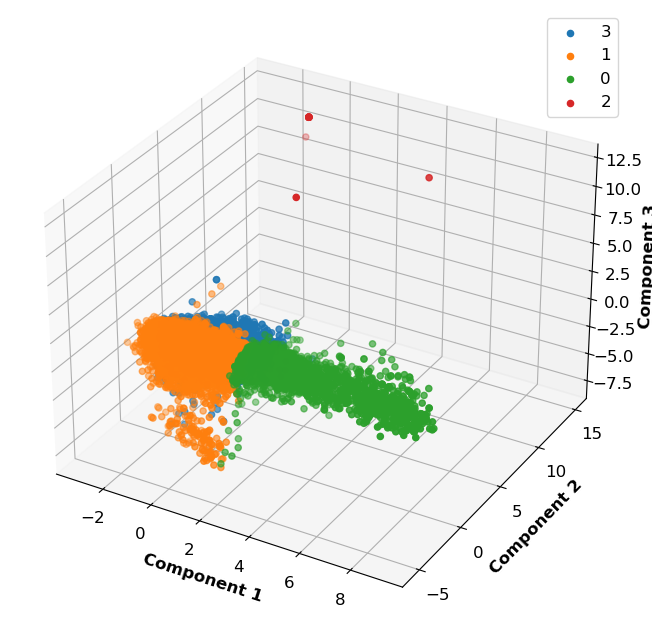

In [119]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Component 1', fontweight ='bold')
ax.set_ylabel('Component 2', fontweight ='bold')
ax.set_zlabel('Component 3', fontweight ='bold')
for c in df_pca_kmeans_silh['Cluster'].unique():
    ax.scatter(df_pca_kmeans_silh[df_pca_kmeans_silh["Cluster"]==c]["Component 1"],df_pca_kmeans_silh[df_pca_kmeans_silh["Cluster"]==c]["Component 2"],df_pca_kmeans_silh[df_pca_kmeans_silh["Cluster"]==c]["Component 3"],label=c)
ax.legend()

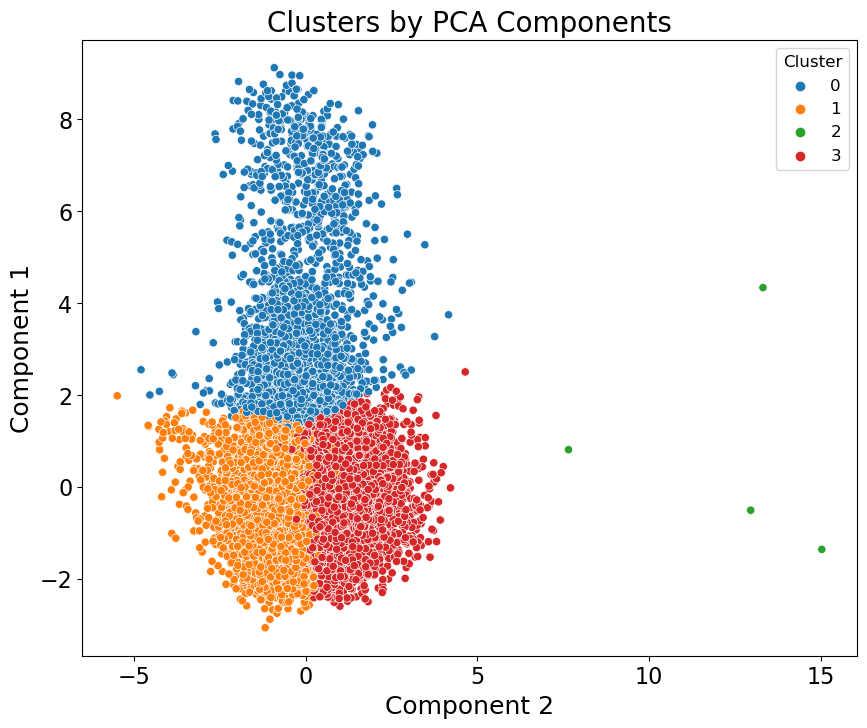

In [120]:
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x= df_pca_kmeans_silh['Component 2'], y= df_pca_kmeans_silh['Component 1'], hue=df_pca_kmeans_silh['Cluster'], palette = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'goldenrod', 'tab:cyan'])
plt.title('Clusters by PCA Components', fontsize=20)
plt.xlabel("Component 2", fontsize=18)
plt.ylabel("Component 1", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [121]:
nullRowsIndex=df[df['Danceability'].isna()].index
df_clusterS=df.drop(nullRowsIndex)
df_clusterS["Cluster"]=kmeans_silh.labels_
df_clusterS.head(4)

Unnamed: 0    Artist                                        Url_spotify  \
0           0  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
1           1  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
2           2  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   
3           3  Gorillaz  https://open.spotify.com/artist/3AA28KZvwAUcZu...   

                                           Track  \
0                                 Feel Good Inc.   
1                                Rhinestone Eyes   
2  New Gold (feat. Tame Impala and Bootie Brown)   
3                             On Melancholy Hill   

                                           Album Album_type  \
0                                     Demon Days      album   
1                                  Plastic Beach      album   
2  New Gold (feat. Tame Impala and Bootie Brown)     single   
3                                  Plastic Beach      album   

                                    Uri  Danceability  Energy  Key  ...  \
0  spotify:track:0d28khcov6AiegSCpG5TuT         0.818   0.705  6.0  ...   
1  spotify:track:1foMv2HQwfQ2vntFf9HFeG         0.676   0.703  8.0  ...   
2  spotify:track:64dLd6rVqDLtkXFYrEUHIU         0.695   0.923  1.0  ...   
3  spotify:track:0q6LuUqGLUiCPP1cbdwFs3         0.689   0.739  2.0  ...   

                                               Title   Channel        Views  \
0         Gorillaz - Feel Good Inc. (Official Video)  Gorillaz  693555221.0   
1  Gorillaz - Rhinestone Eyes [Storyboard Film] (...  Gorillaz   72011645.0   
2  Gorillaz - New Gold ft. Tame Impala & Bootie B...  Gorillaz    8435055.0   
3     Gorillaz - On Melancholy Hill (Official Video)  Gorillaz  211754952.0   

       Likes  Comments                                        Description  \
0  6220896.0  169907.0  Official HD Video for Gorillaz' fantastic trac...   
1  1079128.0   31003.0  The official video for Gorillaz - Rhinestone E...   
2   282142.0    7399.0  Gorillaz - New Gold ft. Tame Impala & Bootie B...   
3  1788577.0   55229.0  Follow Gorillaz online:\nhttp://gorillaz.com \...   

   Licensed  official_video        Stream Cluster  
0      True            True  1.040235e+09       3  
1      True            True  3.100837e+08       1  
2      True            True  6.306347e+07       1  
3      True            True  4.346636e+08       3  

[4 rows x 29 columns]

In [122]:
df_clusterS[df_clusterS["Artist"].eq("Queen")][["Artist","Track","Cluster"]]

Artist                                             Track  Cluster
7997  Queen               Don't Stop Me Now - Remastered 2011        3
7998  Queen      Another One Bites The Dust - Remastered 2011        1
7999  Queen               Bohemian Rhapsody - Remastered 2011        3
8000  Queen                  Under Pressure - Remastered 2011        1
8001  Queen                We Will Rock You - Remastered 2011        1
8002  Queen  Crazy Little Thing Called Love - Remastered 2011        1
8003  Queen            I Want To Break Free - Remastered 2011        1
8004  Queen                    Killer Queen - Remastered 2011        1
8005  Queen            We Are The Champions - Remastered 2011        0
8006  Queen                     Radio Ga Ga - Remastered 2011        1

In [123]:
df_clusterS[df_clusterS["Cluster"]==3][["Artist","Track","Cluster"]].head(30)

Artist                                              Track  \
0                Gorillaz                                     Feel Good Inc.   
3                Gorillaz                                 On Melancholy Hill   
4                Gorillaz                                     Clint Eastwood   
6                Gorillaz  New Gold (feat. Tame Impala and Bootie Brown) ...   
8                Gorillaz                  Cracker Island (feat. Thundercat)   
9                Gorillaz                                        Dirty Harry   
10  Red Hot Chili Peppers                                    Californication   
14  Red Hot Chili Peppers                                          Otherside   
15  Red Hot Chili Peppers                                      Snow (Hey Oh)   
16  Red Hot Chili Peppers                                    Dani California   
17  Red Hot Chili Peppers                                         By the Way   
22                50 Cent                                     Just A Lil Bit   
29                50 Cent                                Best Friend - Remix   
30              Metallica                         Enter Sandman (Remastered)   
31              Metallica                  Nothing Else Matters (Remastered)   
32              Metallica                     Master of Puppets (Remastered)   
33              Metallica                                 Whiskey In The Jar   
34              Metallica                        The Unforgiven (Remastered)   
35              Metallica                                   One (Remastered)   
36              Metallica               For Whom The Bell Tolls (Remastered)   
37              Metallica                                         Lux Æterna   
39              Metallica                                  Screaming Suicide   
40               Coldplay                                             Yellow   
41               Coldplay                                       Viva La Vida   
44               Coldplay                                      The Scientist   
45               Coldplay                                A Sky Full of Stars   
46               Coldplay                                           Paradise   
47               Coldplay                               Hymn for the Weekend   
48               Coldplay                                        My Universe   
49               Coldplay                                            Fix You   

    Cluster  
0         3  
3         3  
4         3  
6         3  
8         3  
9         3  
10        3  
14        3  
15        3  
16        3  
17        3  
22        3  
29        3  
30        3  
31        3  
32        3  
33        3  
34        3  
35        3  
36        3  
37        3  
39        3  
40        3  
41        3  
44        3  
45        3  
46        3  
47        3  
48        3  
49        3

In [124]:
df_normaSilh["Cluster"]=kmeans_silh.labels_
df_normaSilh=df_normaSilh.groupby("Cluster")[[
 'Danceability',
 'Energy',
 'Key',
 'Loudness',
 'Speechiness',
 'Acousticness',
 'Instrumentalness',
 'Liveness',
 'Valence',
 'Tempo','Duration_s',
]].mean()
df_normaSilh

Danceability    Energy       Key  Loudness  Speechiness  \
Cluster                                                            
0            0.454041  0.274434  0.452307  0.656721     0.048713   
1            0.742674  0.660556  0.524706  0.836113     0.126141   
2            0.501940  0.827413  0.522727  0.857564     0.093058   
3            0.550277  0.736625  0.430919  0.853132     0.081915   

         Acousticness  Instrumentalness  Liveness   Valence     Tempo  \
Cluster                                                                 
0            0.760781          0.274423  0.137731  0.282224  0.450051   
1            0.255710          0.011596  0.140698  0.648190  0.464688   
2            0.191013          0.046843  0.196542  0.477426  0.464566   
3            0.166974          0.036547  0.257925  0.463800  0.558567   

         Duration_s  
Cluster              
0          0.040851  
1          0.039912  
2          0.950802  
3          0.043146

In [125]:
import plotly.graph_objects as go

musicFeatures=[
 'Danceability',
 'Energy',
 'key',
 'Loudness',
 'Speechiness',
 'Acousticness',
 'Instrumentalness',
 'Liveness',
 'Valence',
 'Tempo',
 'Duration_s'
]


fig = go.Figure()


for i in range(4):
    fig.add_trace(go.Scatterpolar(
      r=df_normaSilh.loc[i],
      theta=musicFeatures,
      fill='toself',
      name='Cluster '+str(i)
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True
)

fig.show()

In [126]:
df_clusterS[df_clusterS["Cluster"]==0][["Artist","Track","Cluster","Energy","Danceability","Instrumentalness","Liveness","Loudness","Speechiness","Tempo","Key"]].head(30)

Artist                                              Track  \
42        Coldplay                                             Sparks   
56       Daft Punk                                 Something About Us   
58       Daft Punk                                        Veridis Quo   
71       Radiohead                                       No Surprises   
73       Radiohead                                       High and Dry   
74       Radiohead                            Exit Music (For A Film)   
75       Radiohead                              Weird Fishes/ Arpeggi   
77       Radiohead                                 Fake Plastic Trees   
79       Radiohead                                               Nude   
140         Khalid                               lovely (with Khalid)   
183    The Beatles                        Yesterday - Remastered 2009   
185    The Beatles                        Blackbird - Remastered 2009   
210  Elvis Presley                         Can't Help Falling in Love   
211  Elvis Presley                                     Blue Christmas   
212  Elvis Presley  Here Comes Santa Claus (Right Down Santa Claus...   
215  Elvis Presley                                  Always On My Mind   
218  Elvis Presley                                      In the Ghetto   
242      Lil Wayne                                             Mirror   
264  Fleetwood Mac                                          Landslide   
269  Fleetwood Mac             Never Going Back Again - 2004 Remaster   
280  Frank Sinatra  Let It Snow! Let It Snow! Let It Snow! (with T...   
281  Frank Sinatra  Have Yourself A Merry Little Christmas - Remas...   
283  Frank Sinatra                                             My Way   
284  Frank Sinatra                                   Somethin' Stupid   
285  Frank Sinatra                      Santa Claus Is Comin' to Town   
286  Frank Sinatra                Fly Me To The Moon (In Other Words)   
287  Frank Sinatra                             Strangers In The Night   
289  Frank Sinatra                       Silent Night - 1999 Remaster   
304     Elton John                                          Your Song   
344    Luis Miguel              Culpable O No - Miénteme Como Siempre   

     Cluster  Energy  Danceability  Instrumentalness  Liveness  Loudness  \
42         0   0.268         0.371          0.051700    0.1040   -10.506   
56         0   0.475         0.875          0.720000    0.0460   -12.673   
58         0   0.687         0.605          0.949000    0.1040   -13.928   
71         0   0.393         0.255          0.003610    0.1130   -10.654   
73         0   0.383         0.419          0.017600    0.0896   -11.782   
74         0   0.276         0.293          0.122000    0.1670   -11.357   
75         0   0.610         0.531          0.756000    0.0908    -8.025   
77         0   0.229         0.463          0.099700    0.2020   -12.592   
79         0   0.342         0.516          0.579000    0.0857    -9.785   
140        0   0.296         0.351          0.000000    0.0950   -10.109   
183        0   0.179         0.332          0.000000    0.0886   -11.830   
185        0   0.127         0.686          0.000014    0.0573   -14.361   
210        0   0.293         0.396          0.000196    0.1050   -14.062   
211        0   0.270         0.465          0.001040    0.1450   -16.661   
212        0   0.236         0.575          0.017800    0.1050   -16.982   
215        0   0.387         0.358          0.012100    0.1190   -14.342   
218        0   0.266         0.404          0.133000    0.1070   -16.688   
242        0   0.622         0.328          0.000000    0.1040    -7.291   
264        0   0.161         0.414          0.000223    0.1170   -22.320   
269        0   0.336         0.654          0.385000    0.0786   -12.825   
280        0   0.259         0.652          0.000000    0.3620   -13.336   
281        0   0.137         0.262          0.000007    0.2670   -15.235   


Cluster 0 gruops all the powerful tracks with highest value of Liveness

In [127]:
df_clusterS[df_clusterS["Cluster"]==1][["Artist","Track","Cluster","Energy","Danceability","Instrumentalness","Liveness","Loudness","Speechiness","Tempo","Key"]].head(30)

Artist                                              Track  \
1                Gorillaz                                    Rhinestone Eyes   
2                Gorillaz      New Gold (feat. Tame Impala and Bootie Brown)   
5                Gorillaz                                               DARE   
7                Gorillaz                 She's My Collar (feat. Kali Uchis)   
11  Red Hot Chili Peppers                                   Under the Bridge   
12  Red Hot Chili Peppers                                         Can't Stop   
13  Red Hot Chili Peppers                                        Scar Tissue   
18  Red Hot Chili Peppers                                       Give It Away   
19  Red Hot Chili Peppers                                   Dark Necessities   
20                50 Cent                                         In Da Club   
21                50 Cent                                         Candy Shop   
23                50 Cent                                           P.I.M.P.   
24                50 Cent                              Many Men (Wish Death)   
25                50 Cent                                      Disco Inferno   
26                50 Cent                                       21 Questions   
27                50 Cent                 Is This Love ('09) (feat. 50 Cent)   
28                50 Cent                                         If I Can't   
38              Metallica                          Sad But True (Remastered)   
43               Coldplay                           Something Just Like This   
50              Daft Punk  Get Lucky (feat. Pharrell Williams & Nile Rodg...   
52              Daft Punk           Instant Crush (feat. Julian Casablancas)   
53              Daft Punk  Get Lucky (feat. Pharrell Williams & Nile Rodg...   
54              Daft Punk                                   Around the World   
55              Daft Punk                   Harder, Better, Faster, Stronger   
57              Daft Punk   Lose Yourself to Dance (feat. Pharrell Williams)   
69            Linkin Park                                       BURN IT DOWN   
84                  AC/DC                                             T.N.T.   
86                  AC/DC                        Dirty Deeds Done Dirt Cheap   
91        Black Eyed Peas                                    DON'T YOU WORRY   
92        Black Eyed Peas                                 Where Is The Love?   

    Cluster  Energy  Danceability  Instrumentalness  Liveness  Loudness  \
1         1   0.703         0.676          0.000687    0.0463    -5.815   
2         1   0.923         0.695          0.046900    0.1160    -3.930   
5         1   0.891         0.760          0.086900    0.2980    -5.852   
7         1   0.815         0.726          0.081000    0.1120    -5.886   
11        1   0.345         0.559          0.000105    0.1410   -13.496   
12        1   0.938         0.618          0.000000    0.1670    -3.442   
13        1   0.717         0.595          0.002740    0.1080    -4.803   
18        1   0.936         0.666          0.086000    0.1530    -9.919   
19        1   0.742         0.700          0.019900    0.1100    -6.777   
20        1   0.720         0.902          0.000000    0.0749    -2.776   
21        1   0.574         0.614          0.000032    0.3800    -7.961   
23        1   0.758         0.700          0.000013    0.0401    -3.012   
24        1   0.826         0.653          0.001460    0.1310    -2.930   
25        1   0.659         0.925          0.000079    0.2790    -4.763   
26        1   0.807         0.576          0.000363    0.0512    -3.908   
27        1   0.776         0.853          0.000000    0.1810    -4.221   
28        1   0.631         0.892          0.000000    0.0235    -2.522   
38        1   0.876         0.624          0.001640    0.0561    -6.005   
43        1   0.635         0.617          0.000014    0.1640    -6.769   
50        1   0.811         0.794     

Cluster 1 is very similar to Cluster 0 for what concerns artists, but from radar plot we can see that tracks are less danceable and never live versions.

In [128]:
df_clusterS[df_clusterS["Cluster"]==2][["Artist","Track","Cluster","Energy","Danceability","Instrumentalness","Liveness","Loudness","Speechiness","Tempo","Key"]].head(30)

Artist  \
2943           Guru Randhawa   
2983            Amaal Mallik   
4449        Anuradha Paudwal   
4896              Mika Singh   
4926       Himesh Reshammiya   
7383             Divya Kumar   
9361   Ocean Waves For Sleep   
9865             Tulsi Kumar   
10475         Harshdeep Kaur   
13758           Amit Trivedi   
14326      Yo Yo Honey Singh   
15935           Ankit Tiwari   

                                                   Track  Cluster  Energy  \
2943   52 Non Stop Dilbar Dilbar Remix(Remix By Kedro...        2   0.837   
2983   52 Non Stop Dilbar Dilbar Remix(Remix By Kedro...        2   0.837   
4449                                     Om Bhurbhuwasah        2   0.466   
4896   52 Non Stop Dilbar Dilbar Remix(Remix By Kedro...        2   0.837   
4926   52 Non Stop Dilbar Dilbar Remix(Remix By Kedro...        2   0.837   
7383   52 Non Stop Dilbar Dilbar Remix(Remix By Kedro...        2   0.837   
9361                               Ocean Waves for Sleep        2   0.995   
9865   52 Non Stop Dilbar Dilbar Remix(Remix By Kedro...        2   0.837   
10475  High Rated Gabru 52 Non Stop Hits(Remix By Man...        2   0.935   
13758  52 Non Stop Dilbar Dilbar Remix(Remix By Kedro...        2   0.837   
14326  52 Non Stop Dilbar Dilbar Remix(Remix By Kedro...        2   0.837   
15935  52 Non Stop Dilbar Dilbar Remix(Remix By Kedro...        2   0.837   

       Danceability  Instrumentalness  Liveness  Loudness  Speechiness  \
2943         0.5210          0.000013    0.1570    -4.501       0.0794   
2983         0.5210          0.000013    0.1570    -4.501       0.0794   
4449         0.7190          0.000002    0.0973    -9.153       0.0417   
4896         0.5210          0.000013    0.1570    -4.501       0.0794   
4926         0.5210          0.000013    0.1570    -4.501       0.0794   
7383         0.5210          0.000013    0.1570    -4.501       0.0794   
9361         0.0797          0.562000    0.3100   -17.379       0.0612   
9865         0.5210          0.000013    0.1570    -4.501       0.0794   
10475        0.3850          0.000000    0.6780    -2.545       0.2590   
13758        0.5210          0.000013    0.1570    -4.501       0.0794   
14326        0.5210          0.000013    0.1570    -4.501       0.0794   
15935        0.5210          0.000013    0.1570    -4.501       0.0794   

         Tempo  Key  
2943   106.001  7.0  
2983   106.001  7.0  
4449   137.159  3.0  
4896   106.001  7.0  
4926   106.001  7.0  
7383   106.001  7.0  
9361    84.788  1.0  
9865   106.001  7.0  
10475  180.793  2.0  
13758  106.001  7.0  
14326  106.001  7.0  
15935  106.001  7.0

In [129]:
df_clusterS[df_clusterS["Cluster"]==3][["Artist","Track","Cluster","Energy","Danceability","Instrumentalness","Liveness","Loudness","Speechiness","Tempo","Key"]].head(30)

Artist                                              Track  \
0                Gorillaz                                     Feel Good Inc.   
3                Gorillaz                                 On Melancholy Hill   
4                Gorillaz                                     Clint Eastwood   
6                Gorillaz  New Gold (feat. Tame Impala and Bootie Brown) ...   
8                Gorillaz                  Cracker Island (feat. Thundercat)   
9                Gorillaz                                        Dirty Harry   
10  Red Hot Chili Peppers                                    Californication   
14  Red Hot Chili Peppers                                          Otherside   
15  Red Hot Chili Peppers                                      Snow (Hey Oh)   
16  Red Hot Chili Peppers                                    Dani California   
17  Red Hot Chili Peppers                                         By the Way   
22                50 Cent                                     Just A Lil Bit   
29                50 Cent                                Best Friend - Remix   
30              Metallica                         Enter Sandman (Remastered)   
31              Metallica                  Nothing Else Matters (Remastered)   
32              Metallica                     Master of Puppets (Remastered)   
33              Metallica                                 Whiskey In The Jar   
34              Metallica                        The Unforgiven (Remastered)   
35              Metallica                                   One (Remastered)   
36              Metallica               For Whom The Bell Tolls (Remastered)   
37              Metallica                                         Lux Æterna   
39              Metallica                                  Screaming Suicide   
40               Coldplay                                             Yellow   
41               Coldplay                                       Viva La Vida   
44               Coldplay                                      The Scientist   
45               Coldplay                                A Sky Full of Stars   
46               Coldplay                                           Paradise   
47               Coldplay                               Hymn for the Weekend   
48               Coldplay                                        My Universe   
49               Coldplay                                            Fix You   

    Cluster  Energy  Danceability  Instrumentalness  Liveness  Loudness  \
0         3   0.705         0.818          0.002330    0.6130    -6.679   
3         3   0.739         0.689          0.509000    0.0640    -5.810   
4         3   0.694         0.663          0.000000    0.0698    -8.627   
6         3   0.897         0.716          0.262000    0.3250    -7.185   
8         3   0.913         0.741          0.103000    0.3250    -3.340   
9         3   0.877         0.625          0.081100    0.6720    -7.176   
10        3   0.767         0.592          0.001650    0.1270    -2.788   
14        3   0.795         0.458          0.000202    0.0756    -3.265   
15        3   0.900         0.427          0.000017    0.1190    -3.674   
16        3   0.913         0.556          0.000009    0.3460    -2.360   
17        3   0.970         0.451          0.003550    0.1020    -4.938   
22        3   0.692         0.489          0.006080    0.3150    -6.672   
29        3   0.640         0.545          0.000000    0.1110    -3.529   
30        3   0.834         0.566          0.008000    0.0625    -8.412   
31        3   0.394         0.547          0.000006    0.0795    -9.793   
32        3   0.828         0.539          0.421000    0.1540    -9.108   
33        3   0.972         0.511          0.001010    0.1900    -3.751   
34        3   0.583         0.531          0.006240    0.2550    -9.470   
35        3   0.687         0.438          0.080100    0.4200    -9.150   
36        3   0.860         0.512     

Cluster 3 is the cluster of Acoustic and very fast songs

### Conclusion: Cluster task

Following the elbow method and so forcing the creation of 8 clusters we have the cration of cluster each of which gives more importance to a specific attributes, so K-Means manages to group similar songs with a finer granularity. 

The Silhouette methon, istead, suggested us to choose 4 as the number of clusters. With less number of cluster songs aren't grouped in an easily visible manner but have general similar characteristics. For someone who like every genres of music can find these 4 cluster as 4 playlists with different general moods. 

Our initial task was to label all the tracks with the music genre only using the musical features. The problem is that nowdays the lines that separate genres have become more blurred that they were previously. So our clusters group well similar songs but put a genre label is not effective.

In [130]:
#!pip install umap
#import umap
#import umap.plot
#mapper = UMAP().fit(ds)

In [131]:
#umap.plot.points(mapper, theme="fire");

## Task 2: Performance Prediction

For the second task of our project we want to focus ourselves on the task of predicting the performance (in terms of Streamings on Spotify and Views on YouTube) of a track.  
Spotify and YouTube are the two main sources through which people listen to music, so it would be pretty useful to be able to predict how a song will perform based on its musical and artistic information.
We might need some other information other than the solely the musical ones, so let's go and see which columns we dropped before our clutering task:

In [132]:
columnsToBeDropped

['Unnamed: 0',
 'Track',
 'Artist',
 'Url_spotify',
 'Album',
 'Album_type',
 'Uri',
 'Stream',
 'Url_youtube',
 'Title',
 'Channel',
 'Views',
 'Likes',
 'Comments',
 'Description',
 'Licensed',
 'official_video']

Ideally, a really useful information to predict the performance of a song is, well, who created it. It's quite obvious that if a really famous artist comes out with a new song, that song will, most probably draw big numbers.  
For a ML algorithm though, who works with raw numbers, this information is not immediate, quite the contrary. If we were to encode the Artist Name with, say, a OneHotEncoder, giving "randomic" numbers to each artist, that won't be of much use.  
What could be done instead, is try to use something else as an information of who made the song. One of the first things we thought of, was using the information of the mean Streaming and Views numbers, but that would basically tell the ML algorithm the solution, rendering the whole task pretty pointless.  
After a bit of thought (and maybe just a bit of help from someone, *wink wink*) we came up with a different solution: making the algorithm "understand" who the artist is, by giving him some sort of "signature" of the artist.  
This signature could be something that defines the artist, and works well to tell which artist is "closer" to another. What we ended up choosing is the mean of a metric we defined: the energy per minute. If an artist comes out with very long songs that have very energetic part towards the end (think of Confortably Numb by Pink Floyd with the last epic solo), he will be more similar to, say, a Hans Zimmer composition than Green Day, who instead have relatively short songs that are in your face from the get go. This information might be relevant to the performance numbers because tracks that perform well are usually very energetic and not that long. So let's add this new column to the mix. We're gonna recreate the pandas DF and replace the Artist column by hand.

Let's first reload the Dataset and add the artist column to our the Data Frame containing the information we used for the clustering task. This choice has been taken because, as in our clustering task, we wanna focus only on the musical features 0f the tracks, to see if they are any good to predict the performance of a track. We chose not to include any other information about the performance (such as Likes or Comments), simply because in a prediction context they would not have any sense: how can I have the information of the number of likes or number of comments for a track that hasn't come out yet? 

In [133]:
ds2=pd.read_csv(current_path)
nullRowsIndex=ds[ds['Danceability'].isna()].index
ds=ds.drop(nullRowsIndex)
ds['Artist']=ds2['Artist']
ds['Views']=ds2['Views']
ds['Stream']=ds2['Stream']
ds.isna().sum()

Danceability          0
Energy                0
Key                   0
Loudness              0
Speechiness           0
Acousticness          0
Instrumentalness      0
Liveness              0
Valence               0
Tempo                 0
Duration_s            0
Artist                0
Views               469
Stream              576
dtype: int64

Let's now proceed to evaluate the "Signature" in terms of Energy per duration of every artist, by creating a Python dictionary where the keys are the artists and the values are the the means of our "Signature" for every song by that artist.

In [134]:
artists=ds['Artist']
means=dict()
for artist in artists.unique():
    artistSongs=ds[ds['Artist'].eq(artist)]
    s=0
    c=0
    for index in artistSongs.index:
       s+=(ds.loc[index]['Energy']/(ds.loc[index]['Duration_s']))
       c+=1 
    means[artist]=s/c
means

{'Gorillaz': 0.003503932484417933,
 'Red Hot Chili Peppers': 0.002971426241648115,
 '50 Cent': 0.0031695766774623864,
 'Metallica': 0.002462621823494692,
 'Coldplay': 0.002205673170113286,
 'Daft Punk': 0.0022453435435250985,
 'Linkin Park': 0.004765762876687614,
 'Radiohead': 0.0018588262318088844,
 'AC/DC': 0.0033319404037352534,
 'Black Eyed Peas': 0.003391479323829264,
 'Michael Jackson': 0.0028683113488436295,
 'P!nk': 0.003315970023247338,
 'Eminem': 0.002755169507957179,
 'Pharrell Williams': 0.00305976232500182,
 'Khalid': 0.0030838120086294682,
 'Shakira': 0.0033512768009713633,
 'Machine Gun Kelly': 0.004521084030180765,
 'Nicky Jam': 0.003951060211101936,
 'The Beatles': 0.0024982260334112097,
 'Pitbull': 0.0038079459567189056,
 'Sean Paul': 0.00347249629383452,
 'Elvis Presley': 0.0027551039788447215,
 '2Pac': 0.0026971829266419782,
 'Snoop Dogg': 0.003117880317031275,
 'Lil Wayne': 0.002927150517346824,
 'Sia': 0.0032897504285367236,
 'Fleetwood Mac': 0.0024663732791310013

As we can see these are really low values, since the numerator of the the fraction Energy/Duration is always between 0 and one, while the duration can be very large. This, though, won't be a problem as we'll later standardize the data before submitting it to our ML algorithm.  

While we're at it we'll now do the transformation by hand, iterating over the whole dataset and replacing the Artist value with our "signature".

In [135]:
for index in ds.index:
    ds.loc[index,['Artist']]=means[ds.loc[index]['Artist']]
ds['Artist']=pd.to_numeric(ds['Artist'])

Let's now proceed to rename the column to its correct meaning and add the cluster column:

In [136]:
ds=ds.rename(columns={'Artist':'Signature'})
ds["Cluster"]=kmeans_elbow.labels_

In [137]:
ds

Danceability  Energy   Key  Loudness  Speechiness  Acousticness  \
0             0.818   0.705   6.0    -6.679       0.1770      0.008360   
1             0.676   0.703   8.0    -5.815       0.0302      0.086900   
2             0.695   0.923   1.0    -3.930       0.0522      0.042500   
3             0.689   0.739   2.0    -5.810       0.0260      0.000015   
4             0.663   0.694  10.0    -8.627       0.1710      0.025300   
...             ...     ...   ...       ...          ...           ...   
20713         0.582   0.926   5.0    -6.344       0.0328      0.448000   
20714         0.531   0.936   4.0    -1.786       0.1370      0.028000   
20715         0.443   0.830   4.0    -4.679       0.0647      0.024300   
20716         0.417   0.767   9.0    -4.004       0.4190      0.356000   
20717         0.498   0.938   6.0    -4.543       0.1070      0.002770   

       Instrumentalness  Liveness  Valence    Tempo  Duration_s  Signature  \
0              0.002330    0.6130   0.7720  138.559     222.640   0.003504   
1              0.000687    0.0463   0.8520   92.761     200.173   0.003504   
2              0.046900    0.1160   0.5510  108.014     215.150   0.003504   
3              0.509000    0.0640   0.5780  120.423     233.867   0.003504   
4              0.000000    0.0698   0.5250  167.953     340.920   0.003504   
...                 ...       ...      ...      ...         ...        ...   
20713          0.000000    0.0839   0.6580   90.002      94.667   0.007065   
20714          0.000000    0.0923   0.6570  174.869     150.857   0.007065   
20715          0.000000    0.1540   0.4190  168.388     136.842   0.007065   
20716          0.018400    0.1080   0.5390  155.378     108.387   0.007065   
20717          0.911000    0.1360   0.0787  160.067     181.500   0.007065   

             Views        Stream  Cluster  
0      693555221.0  1.040235e+09        2  
1       72011645.0  3.100837e+08        0  
2        8435055.0  6.306347e+07        3  
3      211754952.0  4.346636e+08        3  
4      618480958.0  6.172597e+08        7  
...            ...           ...      ...  
20713      71678.0  9.227144e+06        3  
20714     164741.0  1.089818e+07        7  
20715      35646.0  6.226110e+06        7  
20716       6533.0  6.873961e+06        6  
20717     158697.0  5.695584e+06        7  

[20716 rows x 15 columns]

And here we can see the dataframe with the new "Signature" column, which is basically a custom encoding of the Artist column, but obtained by a combination of two other columns.

Let's now look at the correlation between the columns of this Data Frame, and try to see what columns are the most "promising" to predict our dependent Variables:

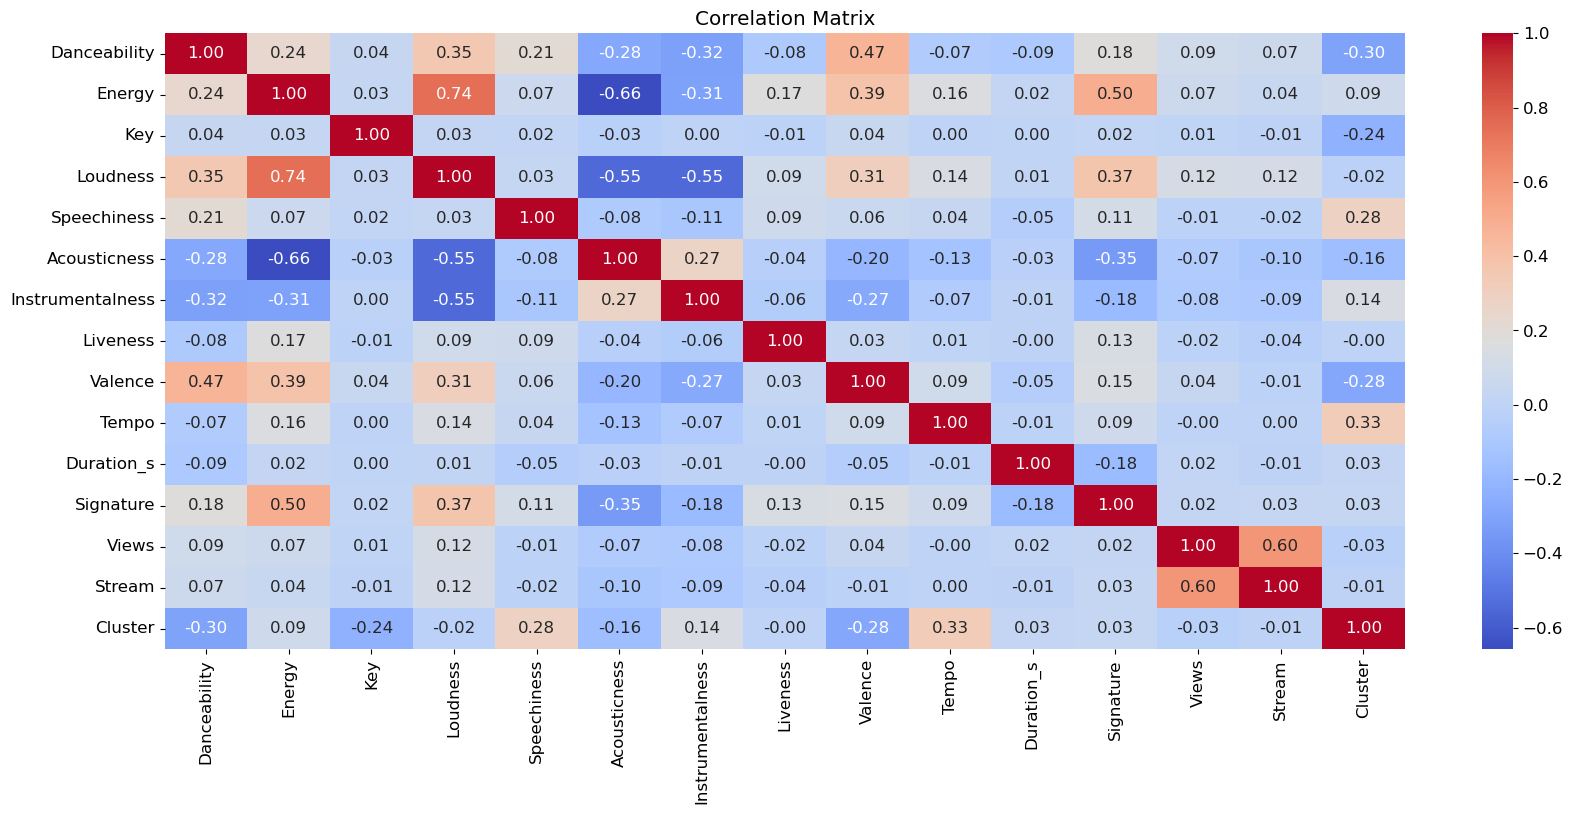

In [138]:
correlation_matrix = ds.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

As we can see, all the correlation values between the features we chose to work with and our "y's" are quite low, but that does not have to scare us, simply because correlation only captures linear relations, hence it leaves the door open for other types of relations.  
One thing we can do, after we've looked at the correlation matrix, is to see what are the most relevant attributes by traning a Random Forest Regressor on the data. We'll do it once using as Y the feature "Stream" and once using as Y the feature "Views"  
We're gonna start off by encoding the labels of the features:


In [139]:
ds2=ds.copy()

Let's start with the Stram feature

As we've discussed in our preliminary Data Analysis, there are, unfortunately, 576 rows for which the Stream feature is null, and we have two main options to deal with them:  
either we delete them entirely or we could try to impute a value using a strategy like mean, median or using a constant.  
What we've chosen to do is drop them entirely, to not introduce any bias into our prediction system.  
Before we train our Random Forest, we're gonna normalize our data through our Standard Scaler, and use the DataFrame stdDs2 as our baseline to construct Train and Test Set.

In [140]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import*
from sklearn.ensemble import RandomForestRegressor
ds2=ds2.drop(index=ds2[ds2['Stream'].isna()].index)
scaler=StandardScaler()
stdDs2=pd.DataFrame(scaler.fit_transform(ds2),columns=ds2.columns)
stdDs2X=stdDs2.drop(columns=['Stream','Views'], axis = 1)
stdDsStreamsY=stdDs2['Stream']#target column

Now let's train the Random Forest Regressor with our data, by passing him as X all our DS without the target features we want to predict. One thing we need to do before that, is to clear our data from the NaN values in those target features.  

R2 0.8794660186190348 .Adj R2: 0.8793028907985183


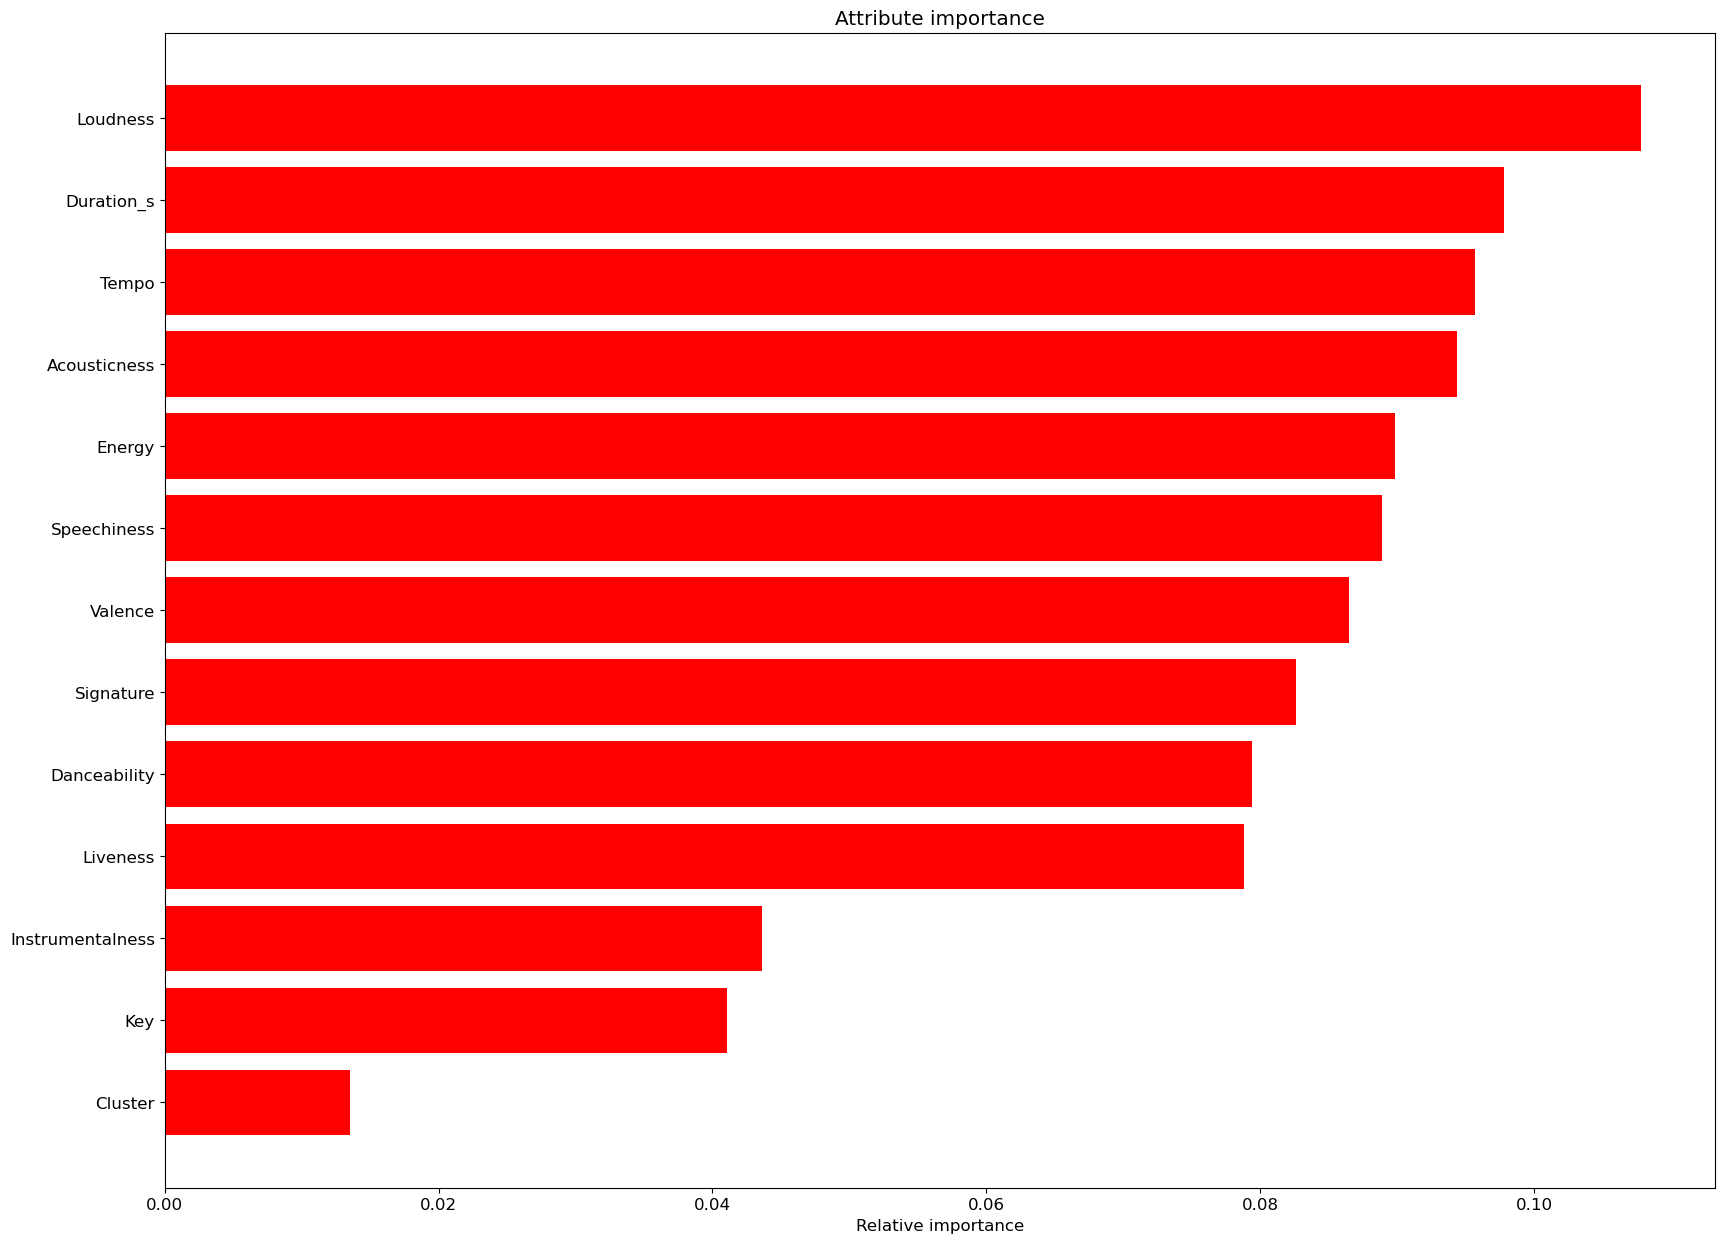

In [141]:
rnd_reg = RandomForestRegressor(n_estimators=40, n_jobs=-1, random_state=40)
rnd_reg.fit(stdDs2X, stdDsStreamsY)
attributes = stdDs2X.columns
importances = rnd_reg.feature_importances_
index = np.argsort(importances)
value_predictions=rnd_reg.predict(stdDs2X)
r2=r2_score(stdDsStreamsY, value_predictions)
n=len(df.index)
p=df.shape[1]
adj_r2=1-(1-r2)*(n-1)/(n-p-1)
print('R2',r2,'.Adj R2:',adj_r2)
plt.figure(figsize=(20,15))
plt.title("Attribute importance")
p = plt.barh(range(len(index)), importances[index], color='r', align='center')
plt.yticks(range(len(index)), attributes[index])
plt.xlabel("Relative importance")
plt.show()

As we can see, the feature importance obtained through training a Random Forest Regressor onto our whole dataset largely confirms the results we saw through the correlation matrix.  
Hence, we decide to use all the columns but the last three to predict the value of Streams for songs.  

In [142]:
dsStreamsX = stdDs2X.drop(columns=['Instrumentalness','Cluster','Key'])
dsStreamsY=stdDsStreamsY.copy()

This pandas DataFrame will now represent (joined with the relative Y) the DataSet for the task of predicting the Streams feature.  
Let's proceed and do the same thing for the Views feature:

In [143]:
ds3=ds.copy()

Exactly as we did for the Stream feature, we need to handle null values on this column. We saw that there are 470 rows for which the Views feature is null, so let's go ahead and use the same strategy we used before: deleting them.

In [144]:
ds3=ds3.drop(index=ds3[ds3['Views'].isna()].index)
stdDs3=pd.DataFrame(scaler.fit_transform(ds3),columns=ds3.columns)
stdDs3X=stdDs3.drop(columns=['Stream','Views'], axis = 1)
stdDsViewsY=stdDs3['Views']#target column

R2 0.8799594102329084 .Adj R2: 0.8797969501568544


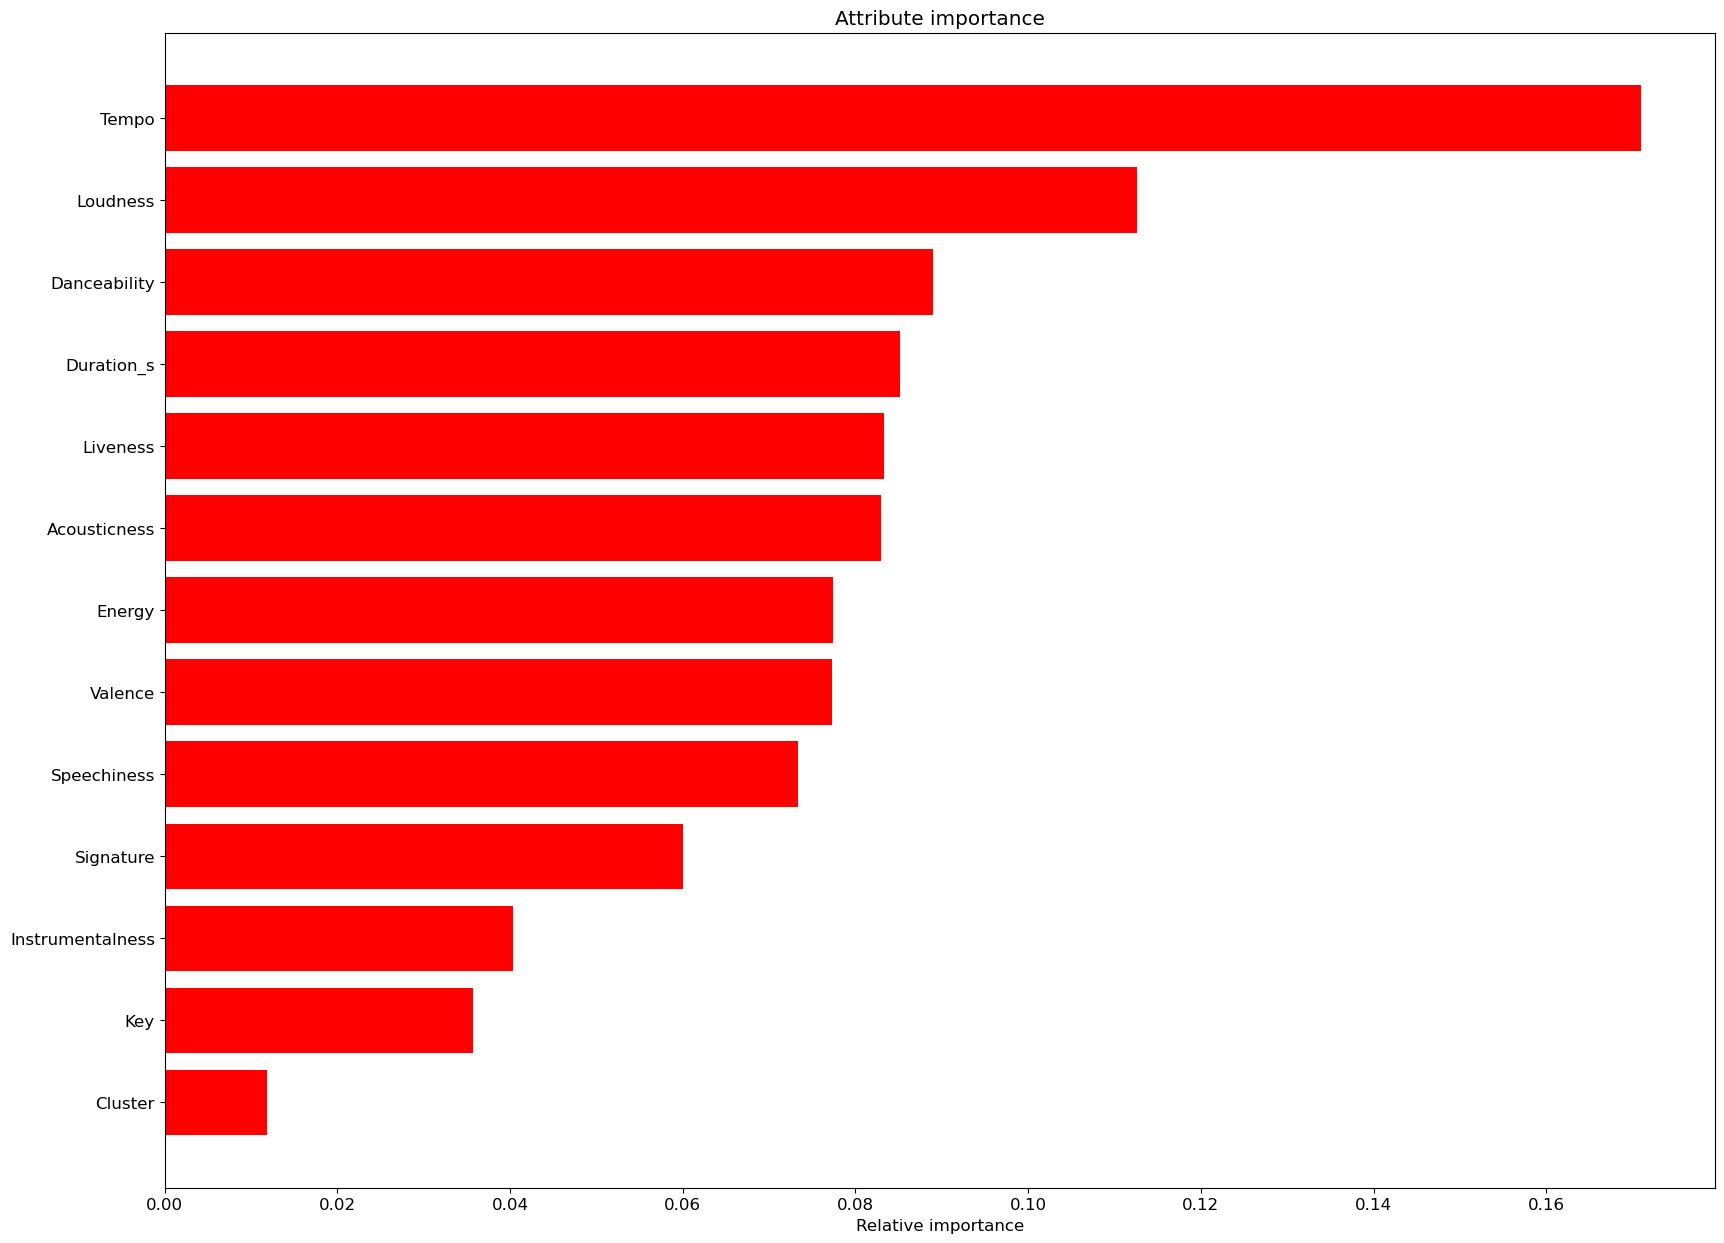

In [145]:
rnd_reg = RandomForestRegressor(n_estimators=40, n_jobs=-1, random_state=40)
rnd_reg.fit(stdDs3X, stdDsViewsY)
value_predictions=rnd_reg.predict(stdDs3X)
r2=r2_score(stdDsViewsY, value_predictions)
n=len(df.index)
p=df.shape[1]
adj_r2=1-(1-r2)*(n-1)/(n-p-1)
print('R2',r2,'.Adj R2:',adj_r2)
attributes = stdDs3X.columns
importances = rnd_reg.feature_importances_
index = np.argsort(importances)
plt.figure(figsize=(20,15))
plt.title("Attribute importance")
p = plt.barh(range(len(index)), importances[index], color='r', align='center')
plt.yticks(range(len(index)), attributes[index])
plt.xlabel("Relative importance")
plt.show()

We can see we have very high, and very similar, values for the R2 index and the adjusted R2. This mean that our 14 feature explain quite well the dependent variable, so our model is actually pretty good at predicting the streams.  
As we can see, the results here are slightly different, with the tempo being the most impactful feature for the prediction. A part from this, the feature importances are similar to the ones we saw for Streams, so, likewise, we're gonna use all features but the last 3 for our prediction model (that also happen to be the same columns we dropped before).

In [146]:
dsViewsX = stdDs3X.drop(columns=['Instrumentalness','Cluster','Key'])
dsViewsY = stdDsViewsY.copy()

Ok, so now that we have both X and Y for both both of our dependent variables, we can start splitting them onto Training and Test set:

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
X_train_stream, X_test_stream,  y_train_stream, y_test_stream = train_test_split(dsStreamsX,dsStreamsY, test_size=0.2)
X_train_views, X_test_views,  y_train_views, y_test_views = train_test_split(dsViewsX,dsViewsY, test_size=0.2)
print(X_train_stream.shape, y_train_stream.shape, X_test_stream.shape, y_test_stream.shape)
print(X_train_views.shape, y_train_views.shape, X_test_views.shape, y_test_views.shape)

(16112, 10) (16112,) (4028, 10) (4028,)
(16197, 10) (16197,) (4050, 10) (4050,)


Now let's quickly check that this sampling procedure hasn't created any distortion in the data, let's see if the distribution of values are roughly the same:  
Let's take a look at the tempo distribution difference between the original datasets (ds2 and ds3 for reference) and the test sets:

<Axes: >

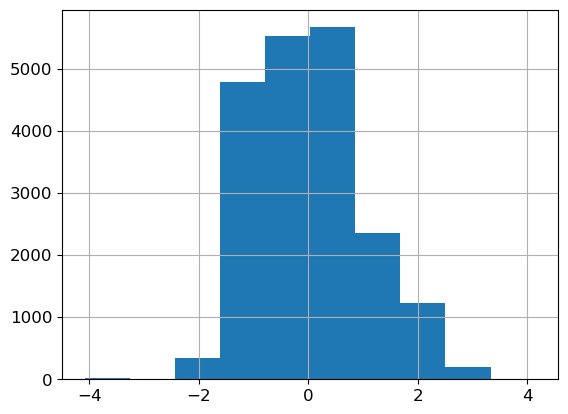

In [148]:
stdDs2["Tempo"].hist()

<Axes: >

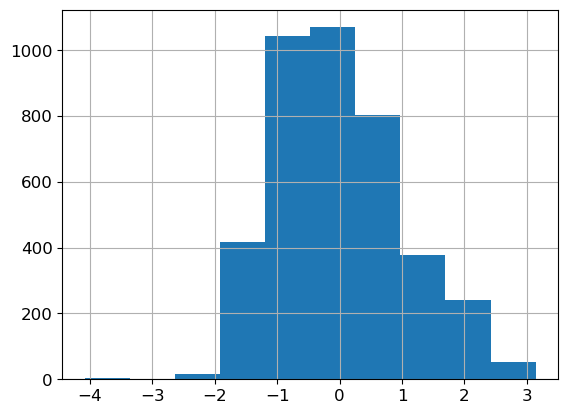

In [149]:
X_test_stream['Tempo'].hist()

<Axes: >

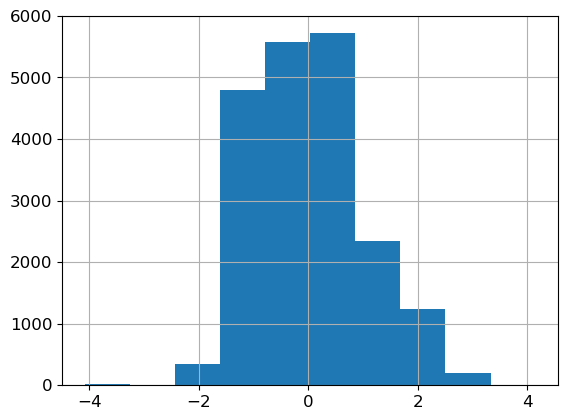

In [150]:
stdDs3['Tempo'].hist()

<Axes: >

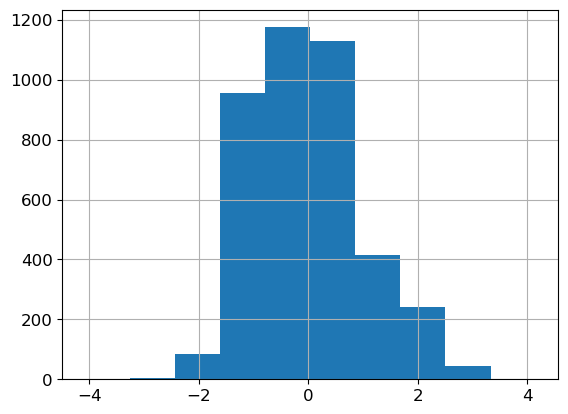

In [151]:
X_test_views['Tempo'].hist()

As we can see the two pairing of distributions roughly have the same shape, hence we've not introduced any sampling bias thus far.

So let's now define the lists where we'll store the cross validations of our many models we're gonna train, to use for evaluation in the later stages:

In [152]:
cross_validations_stream=[]
cross_validations_views=[]
names=[]

So let's start now by creating many models and storing their metrics to evaluate them all together:

## Linear Regression:

In [153]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lin_reg_stream = LinearRegression().fit(X_train_stream, y_train_stream)
lin_reg_views = LinearRegression().fit(X_train_views, y_train_views)
lin_reg_scores_stream = cross_val_score(lin_reg_stream, X_train_stream, y_train_stream,scoring="neg_mean_squared_error", cv=10,n_jobs=-1)
lin_reg_scores_views = cross_val_score(lin_reg_views, X_train_views, y_train_views,scoring="neg_mean_squared_error", cv=10,n_jobs=-1)
cross_validations_stream.append(lin_reg_scores_stream)
cross_validations_views.append(lin_reg_scores_views)
names.append("Linear Regression")

## Stochastic Gradient Descent Regression:


In [154]:
from sklearn.linear_model import SGDRegressor

sgd_reg_stream=SGDRegressor(random_state=42).fit(X_train_stream, y_train_stream)
sgd_reg_views=SGDRegressor(random_state=42).fit(X_train_views, y_train_views)
sgd_reg_scores_stream=cross_val_score(sgd_reg_stream, X_train_stream, y_train_stream,scoring="neg_mean_squared_error", cv=10)
sgd_reg_scores_views = cross_val_score(sgd_reg_views, X_train_views, y_train_views,scoring="neg_mean_squared_error", cv=10)
cross_validations_stream.append(sgd_reg_scores_stream)
cross_validations_views.append(sgd_reg_scores_views)
names.append("SGD Regression")

For this type of regression, we can perform hyperparameter tuning to get the best possible model for us. Let's try to optimize the model's performance, in terms of mean squared error by using grid search on the type of loss function the gradient descent algorithm uses, the value of alpha and the penalty function:

In [155]:
from sklearn.model_selection import GridSearchCV
sgd_params_grid = {'loss': ['squared_loss','epsilon_insensitive', 'squared_epsilon_insensitive'],'alpha' : [0.0001, 0.005, 0.01],'penalty': ['l2','elasticnet', 'l1']}
sgd_grid_search_stream = GridSearchCV(sgd_reg_stream, sgd_params_grid, cv=3,scoring='neg_mean_squared_error', return_train_score=True,n_jobs=-1).fit(X_train_stream, y_train_stream)
sgd_grid_search_views = GridSearchCV(sgd_reg_views, sgd_params_grid, cv=3,scoring='neg_mean_squared_error', return_train_score=True,n_jobs=-1).fit(X_train_views, y_train_views)
sgd_grid_scores_stream=cross_val_score(sgd_grid_search_stream, X_train_stream, y_train_stream,scoring="neg_mean_squared_error", cv=10,n_jobs=-1)
sgd_grid_scores_views = cross_val_score(sgd_grid_search_views, X_train_views, y_train_views,scoring="neg_mean_squared_error", cv=10,n_jobs=-1)
cross_validations_stream.append(sgd_grid_scores_stream)
cross_validations_views.append(sgd_grid_scores_views)
best_sgd_params_stream = sgd_grid_search_stream.best_estimator_
best_sgd_params_views = sgd_grid_search_views.best_estimator_
names.append("SGD Regression Optimized")

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
27 fits failed out of a total of 81.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py", line 1582, in fit
    self._validate_params()
  File "/opt/conda/lib/python3.10/site-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/opt/conda/lib/python3.10/site-pack

In [156]:
best_sgd_params_stream

SGDRegressor(alpha=0.01, loss='squared_epsilon_insensitive', penalty='l1',
             random_state=42)

In [157]:
best_sgd_params_views

SGDRegressor(alpha=0.005, loss='squared_epsilon_insensitive',
             penalty='elasticnet', random_state=42)

The two models seem to have the same set of paraneter that maximize the negative mean squared error.

## Decision Tree Regression:

In [158]:
from sklearn.tree import DecisionTreeRegressor

tree_reg_stream = DecisionTreeRegressor(random_state=42).fit(X_train_stream,y_train_stream)
tree_reg_views = DecisionTreeRegressor(random_state=42).fit(X_train_views,y_train_views)
tree_reg_scores_stream = cross_val_score(tree_reg_stream, X_train_stream, y_train_stream,scoring="neg_mean_squared_error", cv=10,n_jobs=-1)
tree_reg_scores_views = cross_val_score(tree_reg_views, X_train_views, y_train_views,scoring="neg_mean_squared_error", cv=10,n_jobs=-1)
cross_validations_stream.append(tree_reg_scores_stream)
cross_validations_views.append(tree_reg_scores_views)
names.append("Decision Tree Regression")

Let's perform hyperparameter tuning for this type of regressor on criterion and splitter:

In [159]:
tree_params_grid = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],'splitter' : ['best','random']}
tree_grid_search_stream = GridSearchCV(tree_reg_stream, tree_params_grid, cv=3,scoring='neg_mean_squared_error', return_train_score=True,n_jobs=-1).fit(X_train_stream, y_train_stream)
tree_grid_search_views = GridSearchCV(tree_reg_views, tree_params_grid, cv=3,scoring='neg_mean_squared_error', return_train_score=True,n_jobs=-1).fit(X_train_views, y_train_views)
tree_grid_scores_stream=cross_val_score(tree_grid_search_stream, X_train_stream, y_train_stream,scoring="neg_mean_squared_error", cv=5,n_jobs=-1)
tree_grid_scores_views = cross_val_score(tree_grid_search_views, X_train_views, y_train_views,scoring="neg_mean_squared_error", cv=5,n_jobs=-1)
cross_validations_stream.append(tree_grid_scores_stream)
cross_validations_views.append(tree_grid_scores_views)
names.append('Optimized Decision Tree Regression')

In [160]:
best_tree_params_stream = tree_grid_search_stream.best_estimator_
best_tree_params_views = tree_grid_search_views.best_estimator_

In [161]:
best_tree_params_stream

DecisionTreeRegressor(criterion='absolute_error', random_state=42,
                      splitter='random')

In [162]:
best_tree_params_views

DecisionTreeRegressor(criterion='friedman_mse', random_state=42)

Also here, the set of hyperparameters seem to be the same for the streams model and for the views model

## K-Neighbor Regressor

In [163]:
from sklearn.neighbors import KNeighborsRegressor
kn_reg_stream = KNeighborsRegressor().fit(X_train_stream,y_train_stream)
kn_reg_views = KNeighborsRegressor().fit(X_train_views,y_train_views)
kn_reg_scores_stream = cross_val_score(kn_reg_stream, X_train_stream, y_train_stream,scoring="neg_mean_squared_error", cv=5,n_jobs=-1)
kn_reg_scores_views = cross_val_score(kn_reg_views, X_train_views, y_train_views,scoring="neg_mean_squared_error", cv=5,n_jobs=-1)
cross_validations_stream.append(kn_reg_scores_stream)
cross_validations_views.append(kn_reg_scores_views)
names.append("K-Neighbor Regression")

The K-Neighbor Regressor also has a set of hyperparameters that can be optimized, so let's do that by tuning the number of neighbors, the weights used in prediction and the size of the leafs of the tree:

In [164]:
kn_params_grid = {'n_neighbors': [10,20,30],'weights': ['uniform','distance'],'leaf_size': [20,30]}
kn_grid_search_stream = GridSearchCV(kn_reg_stream, kn_params_grid, cv=3,scoring='neg_mean_squared_error', return_train_score=True,n_jobs=-1).fit(X_train_stream, y_train_stream)
kn_grid_search_views = GridSearchCV(kn_reg_views, kn_params_grid, cv=3,scoring='neg_mean_squared_error', return_train_score=True,n_jobs=-1).fit(X_train_views, y_train_views)
kn_grid_scores_stream=cross_val_score(kn_grid_search_stream, X_train_stream, y_train_stream,scoring="neg_mean_squared_error", cv=5,n_jobs=-1)
kn_grid_scores_views = cross_val_score(kn_grid_search_views, X_train_views, y_train_views,scoring="neg_mean_squared_error", cv=5,n_jobs=-1)
cross_validations_stream.append(kn_grid_scores_stream)
cross_validations_views.append(kn_grid_scores_views)
names.append('Optimized K-Neighbor Regresison')

In [165]:
best_kn_params_stream = kn_grid_search_stream.best_estimator_
best_kn_params_views = kn_grid_search_views.best_estimator_

In [166]:
best_kn_params_stream

KNeighborsRegressor(leaf_size=20, n_neighbors=30, weights='distance')

In [167]:
best_kn_params_views

KNeighborsRegressor(leaf_size=20, n_neighbors=30, weights='distance')

Turns out the best sets of parameters is the same also here...

## Random Forest Regressor

In [168]:
from sklearn.ensemble import RandomForestRegressor
rnd_reg_stream = RandomForestRegressor().fit(X_train_stream,y_train_stream)
rnd_reg_views = RandomForestRegressor().fit(X_train_views,y_train_views)
rnd_reg_scores_stream = cross_val_score(rnd_reg_stream, X_train_stream, y_train_stream,scoring="neg_mean_squared_error", cv=5,n_jobs=-1)
rnd_reg_scores_views = cross_val_score(rnd_reg_views, X_train_views, y_train_views,scoring="neg_mean_squared_error", cv=5,n_jobs=-1)
cross_validations_stream.append(rnd_reg_scores_stream)
cross_validations_views.append(rnd_reg_scores_views)
names.append("Random Forest Regression")

Same story as before, let's tune the hyperparameters.

In [169]:
rnd_params_grid = {'criterion': ['friedman_mse'],'n_estimators': [50,100],'max_features': [1.0,'sqrt','log2']}
rnd_grid_search_stream = GridSearchCV(rnd_reg_stream, rnd_params_grid, cv=3,scoring='neg_mean_squared_error', return_train_score=True,n_jobs=-1).fit(X_train_stream, y_train_stream)
rnd_grid_search_views = GridSearchCV(rnd_reg_views, rnd_params_grid, cv=3,scoring='neg_mean_squared_error', return_train_score=True,n_jobs=-1).fit(X_train_views, y_train_views)
rnd_grid_scores_stream=cross_val_score(rnd_grid_search_stream, X_train_stream, y_train_stream,scoring="neg_mean_squared_error", cv=5,n_jobs=-1)
rnd_grid_scores_views = cross_val_score(rnd_grid_search_views, X_train_views, y_train_views,scoring="neg_mean_squared_error", cv=5,n_jobs=-1)
cross_validations_stream.append(rnd_grid_scores_stream)
cross_validations_views.append(rnd_grid_scores_views)

In [170]:
best_rnd_params_stream = rnd_grid_search_stream.best_estimator_
best_rnd_params_views = rnd_grid_search_views.best_estimator_

In [171]:
best_rnd_params_stream

RandomForestRegressor(criterion='friedman_mse', max_features='sqrt')

In [172]:
names.append('Optimized Random Forest')
best_rnd_params_views

RandomForestRegressor(criterion='friedman_mse', max_features='log2')

Here we see our first difference between the 2 models, where one prefers to consider a logarithmic number of features for each split and the other prefers to use the square root.

## Support Vector Regression:

In [173]:
from sklearn.svm import SVR
svr_reg_stream = SVR().fit(X_train_stream,y_train_stream)
svr_reg_views = SVR().fit(X_train_views,y_train_views)
svr_reg_scores_stream = cross_val_score(svr_reg_stream, X_train_stream, y_train_stream,scoring="neg_mean_squared_error", cv=3,n_jobs=-1)
svr_reg_scores_views = cross_val_score(svr_reg_views, X_train_views, y_train_views,scoring="neg_mean_squared_error", cv=3,n_jobs=-1)
cross_validations_stream.append(svr_reg_scores_stream)
cross_validations_views.append(svr_reg_scores_views)
names.append("Support Vector Regression")

Guess what, we're gonna apply grid search on this model aswell, trying out different values for the hyperparameters kernel, c and gamma:

In [174]:
svr_params_grid = [{'kernel': ['linear'], 'C': [10., 30., 100.]},{'kernel': ['rbf'], 'C': [1.0, 3.0],'gamma': [0.01, 0.03, 0.1]},]
svr_grid_search_stream = GridSearchCV(svr_reg_stream, svr_params_grid, cv=3,scoring='neg_mean_squared_error', return_train_score=True,n_jobs=-1).fit(X_train_stream, y_train_stream)
svr_grid_search_views = GridSearchCV(svr_reg_views, svr_params_grid, cv=3,scoring='neg_mean_squared_error', return_train_score=True,n_jobs=-1).fit(X_train_views, y_train_views)
svr_grid_scores_stream=cross_val_score(svr_grid_search_stream, X_train_stream, y_train_stream,scoring="neg_mean_squared_error", cv=3,n_jobs=-1)
svr_grid_scores_views = cross_val_score(svr_grid_search_views, X_train_views, y_train_views,scoring="neg_mean_squared_error", cv=3,n_jobs=-1)
cross_validations_stream.append(svr_grid_scores_stream)
cross_validations_views.append(svr_grid_scores_views)
names.append('Optimized Support Vector Regression')

In [175]:
best_svr_params_stream = svr_grid_search_stream.best_estimator_
best_svr_params_views = svr_grid_search_views.best_estimator_


In [176]:
best_svr_params_stream

SVR(C=3.0, gamma=0.1)

In [177]:
best_svr_params_views

SVR(C=3.0, gamma=0.1)

For support vector we're back to business as usual, as the best parameters are the same for both models.  
We're at the end of the line: we've tested 6 different models with and without fine tuning of the parameters, so now let's analyze the results to choose the best one out of the 6 to use in generalization.  
First and foremost let's convert the scores to RMSE:

In [178]:
for i in range(len(names)):
    cross_validations_stream[i]=np.sqrt(-cross_validations_stream[i])
    cross_validations_views[i]=np.sqrt(-cross_validations_views[i])

In [179]:
dictViews=dict()
dictStreams=dict()
dictDevStreams=dict()
dictDevViews=dict()
dictViews['Model']=names
dictStreams['Model']=names
dictViews['RMSE']=[]
dictStreams['RMSE']=[]
for i in range(len(names)):
    dictViews['RMSE'].append(cross_validations_views[i].mean())
    dictStreams['RMSE'].append(cross_validations_stream[i].mean())
    dictDevStreams[names[i]]=cross_validations_stream[i].std()
    dictDevViews[names[i]]=cross_validations_views[i].std()

In [180]:
dictViews

{'Model': ['Linear Regression',
  'SGD Regression',
  'SGD Regression Optimized',
  'Decision Tree Regression',
  'Optimized Decision Tree Regression',
  'K-Neighbor Regression',
  'Optimized K-Neighbor Regresison',
  'Random Forest Regression',
  'Optimized Random Forest',
  'Support Vector Regression',
  'Optimized Support Vector Regression'],
 'RMSE': [0.978200567443128,
  0.9797270668690887,
  0.982616834385305,
  1.3831518588015226,
  1.3801315665360765,
  1.0660567706973318,
  0.9682946200789646,
  0.9460650124026246,
  0.9264889690886646,
  1.008964460382165,
  1.007538802985098]}

In [181]:
dictStreams

{'Model': ['Linear Regression',
  'SGD Regression',
  'SGD Regression Optimized',
  'Decision Tree Regression',
  'Optimized Decision Tree Regression',
  'K-Neighbor Regression',
  'Optimized K-Neighbor Regresison',
  'Random Forest Regression',
  'Optimized Random Forest',
  'Support Vector Regression',
  'Optimized Support Vector Regression'],
 'RMSE': [0.9737361874260688,
  0.9747380376498376,
  0.9757735075094244,
  1.33999888481238,
  1.3556684631478937,
  1.0382745531448585,
  0.9619530984379127,
  0.9213848873555677,
  0.9129561778892074,
  1.0203525213866762,
  1.0189368428304884]}

In [182]:
dictDevStreams

{'Linear Regression': 0.07536886911639121,
 'SGD Regression': 0.07466094916701199,
 'SGD Regression Optimized': 0.07359094933458502,
 'Decision Tree Regression': 0.06103849228491602,
 'Optimized Decision Tree Regression': 0.030814773058307654,
 'K-Neighbor Regression': 0.035614149530628705,
 'Optimized K-Neighbor Regresison': 0.04765892092146643,
 'Random Forest Regression': 0.049686408294485986,
 'Optimized Random Forest': 0.05157158654219403,
 'Support Vector Regression': 0.01769423876173438,
 'Optimized Support Vector Regression': 0.017590939878759794}

In [183]:
dictDevViews

{'Linear Regression': 0.1388379217483256,
 'SGD Regression': 0.1379915281135585,
 'SGD Regression Optimized': 0.136158415542157,
 'Decision Tree Regression': 0.15802831273631993,
 'Optimized Decision Tree Regression': 0.11302804917773408,
 'K-Neighbor Regression': 0.050073839174239944,
 'Optimized K-Neighbor Regresison': 0.0595604510610721,
 'Random Forest Regression': 0.062488375954962656,
 'Optimized Random Forest': 0.0644892994548512,
 'Support Vector Regression': 0.04622544455050187,
 'Optimized Support Vector Regression': 0.04635357907641896}

Now we've created 2 dictionaries per dependent Variable: one containing the means of RMSEs and the other containing the Standard Deviation. We can say immediately that these values of error are the Standardized values, meaning that our models don't actually get the prediction wrong by 1 view or Stream, but by approximately one time the mean. Furthermore, the Standard Deviation tells us that the tests were actually very meaningful, as they are all very low, meaning that our models were consistent during the cross validation.    
It's easy to spot that the best model in approximation for both of our dependent variables is the Optimized Random Forest, but let's plot the means:

In [184]:
dfErrorsStream=pd.DataFrame(dictStreams,columns=['Model','RMSE'])
dfErrorsViews=pd.DataFrame(dictViews,columns=['Model','RMSE'])

In [185]:
dfErrorsStream

Model      RMSE
0                     Linear Regression  0.973736
1                        SGD Regression  0.974738
2              SGD Regression Optimized  0.975774
3              Decision Tree Regression  1.339999
4    Optimized Decision Tree Regression  1.355668
5                 K-Neighbor Regression  1.038275
6       Optimized K-Neighbor Regresison  0.961953
7              Random Forest Regression  0.921385
8               Optimized Random Forest  0.912956
9             Support Vector Regression  1.020353
10  Optimized Support Vector Regression  1.018937

In [186]:
dfErrorsViews

Model      RMSE
0                     Linear Regression  0.978201
1                        SGD Regression  0.979727
2              SGD Regression Optimized  0.982617
3              Decision Tree Regression  1.383152
4    Optimized Decision Tree Regression  1.380132
5                 K-Neighbor Regression  1.066057
6       Optimized K-Neighbor Regresison  0.968295
7              Random Forest Regression  0.946065
8               Optimized Random Forest  0.926489
9             Support Vector Regression  1.008964
10  Optimized Support Vector Regression  1.007539

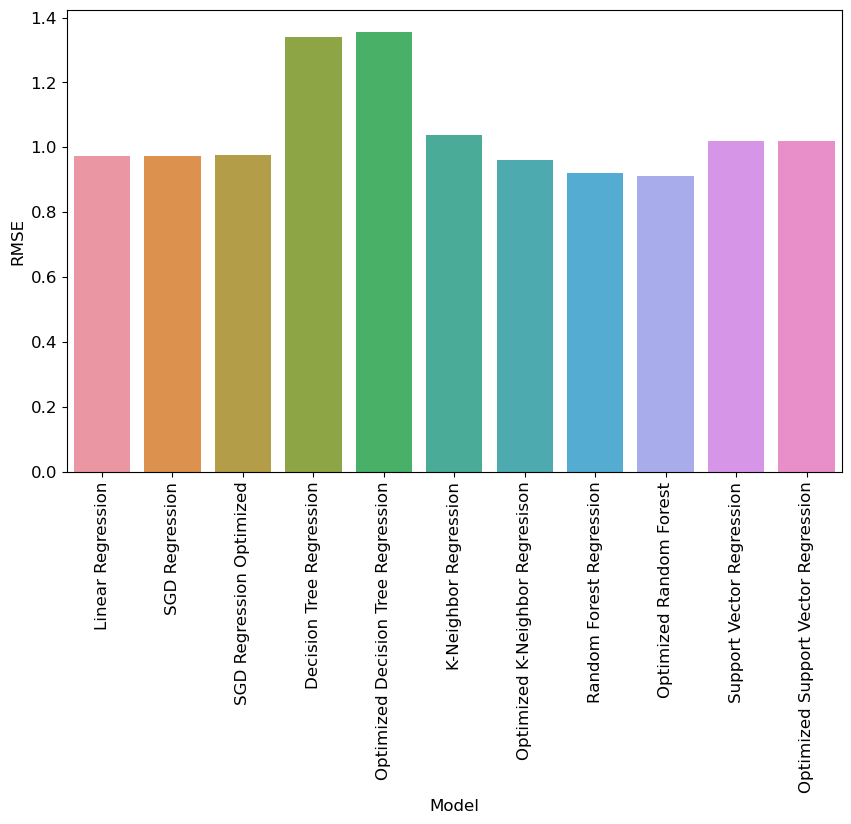

In [187]:
plt.figure(figsize=(10, 6))
sns.barplot(dfErrorsStream,x='Model',y='RMSE')
plt.set_xlabel='Model'
plt.set_ylabel='RMSE'
plt.xticks(rotation=90)
plt.show()

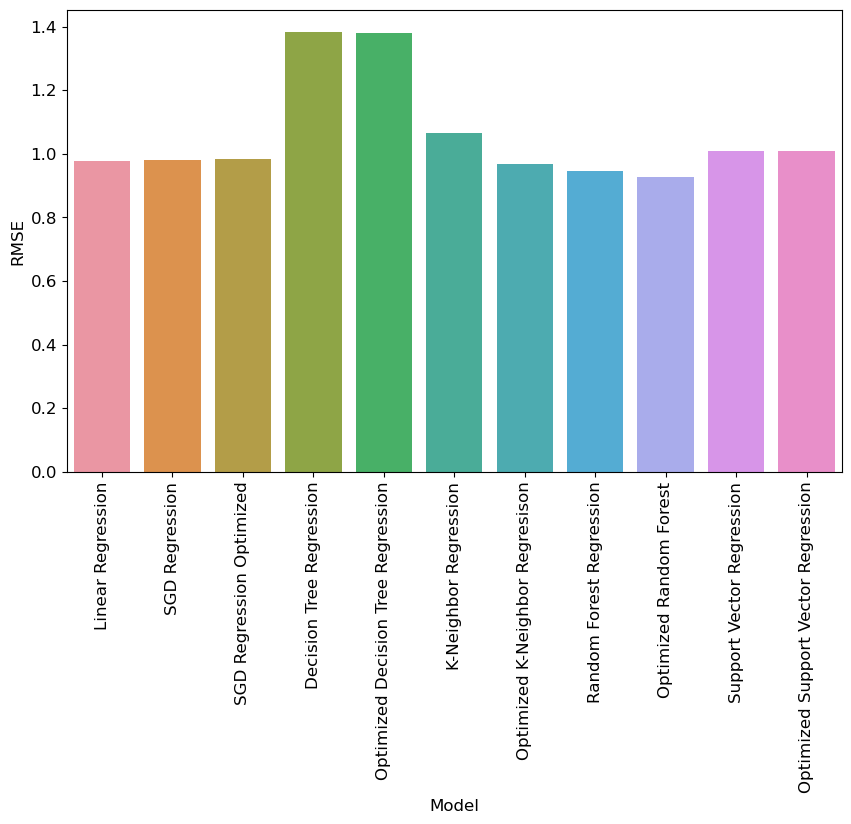

In [188]:
plt.figure(figsize=(10, 6))
sns.barplot(dfErrorsViews,x='Model',y='RMSE')
plt.set_xlabel='Model'
plt.set_ylabel='RMSE'
plt.xticks(rotation=90)
plt.show()

The plot has confirmed it: the best model for both our dependent variables is the Support Vector Regression. Plus, for some reason (maybe beacuse of the fold mechanism) applying grid search cv to support vector regression worsens their RMSE.
Now that we've established which model best behaves in terms of **approximation** let's look at its performance in **generalization**, meaning on the test set hoping that approximation error is similar to generalization error:

In [189]:
final_model_streams=best_svr_params_stream
final_model_views=best_svr_params_views

In [190]:
final_predictions_streams = final_model_streams.predict(X_test_stream)
final_predictions_views = final_model_views.predict(X_test_views)
final_mse_streams = mean_squared_error(y_test_stream, final_predictions_streams)
final_rmse_streams = np.sqrt(final_mse_streams)
final_mse_views = mean_squared_error(y_test_views, final_predictions_views)
final_rmse_views = np.sqrt(final_mse_views)

In [191]:
final_rmse_streams

1.0655662613934216

In [192]:
final_rmse_views

1.0199962173783548

We can see that the models behave basically in the same way they behaved in approximation: for streams the result basically matches what we have for the test set, while for the views feature, the model behaved even better, lowering the RMSE by .03.  
We can conclude our models seem to predict pretty well the values of our 2 dependent variables, and that the Random Forest is the best at handling the relation between our regressors and both dependent variables.